In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
sb.set()

In [142]:
DF = pd.read_csv('cleaned_dataset.csv')

## EDA on Flights

In [143]:
print("Number of different flights: {}".format(len(DF["Flight_Number"].unique())))

Number of different flights: 3716


In [11]:
print("Number of different planes: {}".format(len(DF["Tail_Number"].unique())))

Number of different planes: 3224


This shows us that different flights with different numbers are actually the same aircraft but flying with a different flight number. The tail number is the number that is unique to each aircraft

## EDA on Airports

In [12]:
print("Number of origin airports: {}".format(len(DF['Origin'].unique())))

Number of origin airports: 3


We have a relatively well balanced number of flights from each of the three origin airports

In [13]:
print("Number of destination airports: {}".format(len(DF['Destination'].unique())))

Number of destination airports: 104


One of the main reasons we chose to work only with departure delays is because there were too many destination airports for us to work with

## Checking if there is a relation between Departure Delay and Arrival Delay

Creating a Delays DataFrame to hold all the values of delays

In [14]:
Arr_Del = DF['Arrival_Delay']
Dep_Del = DF['Departure_Delay']
Delays = pd.concat([Arr_Del, Dep_Del], axis = 1).reindex(Arr_Del.index)

<AxesSubplot:xlabel='Arrival_Delay', ylabel='Departure_Delay'>

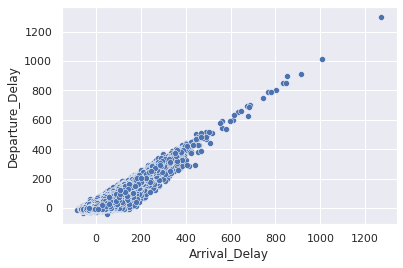

In [15]:
sb.scatterplot(data = Delays,x="Arrival_Delay", y="Departure_Delay")

In [16]:
Delays.corr()

Arrival_Delay  Departure_Delay
Arrival_Delay         1.000000         0.911186
Departure_Delay       0.911186         1.000000

We can see that there is a strong correlation between the Departure Delay and the Arrival Delay

## Checking whether Origin Airports Impact Departure Delays

<AxesSubplot:xlabel='count', ylabel='Origin'>

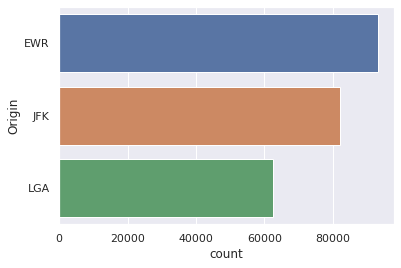

In [17]:
sb.countplot(y='Origin',data = DF)

<AxesSubplot:xlabel='Departure_Delay', ylabel='Origin'>

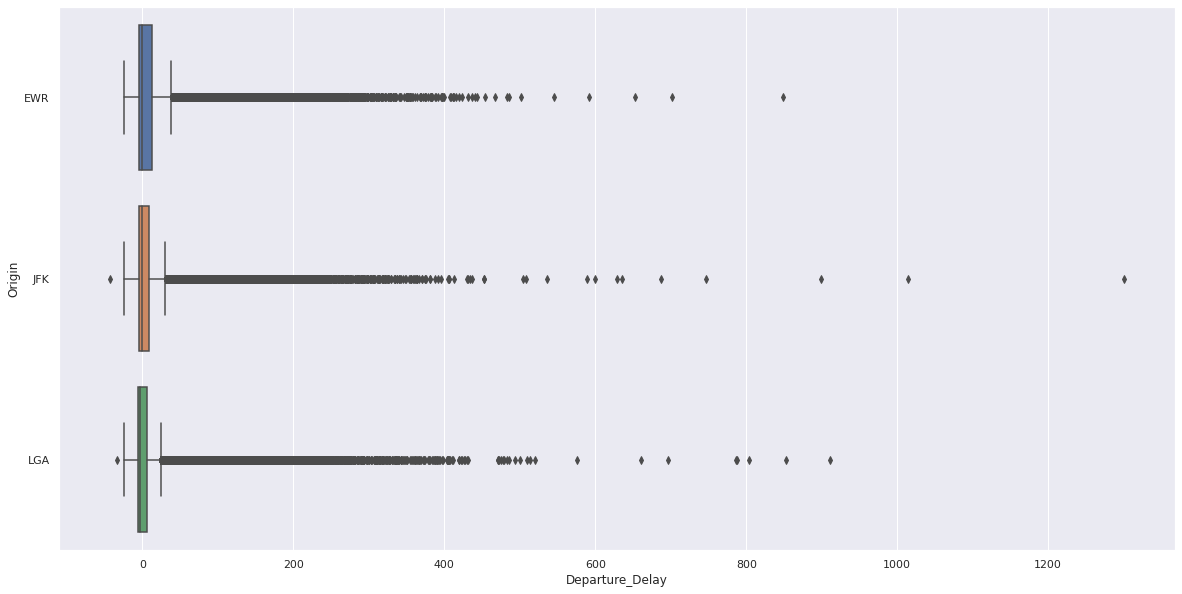

In [18]:
f = plt.figure(figsize=(20, 10))
sb.boxplot(y = 'Origin', x = 'Departure_Delay', data = DF)

<AxesSubplot:xlabel='Departure_Delay', ylabel='Origin'>

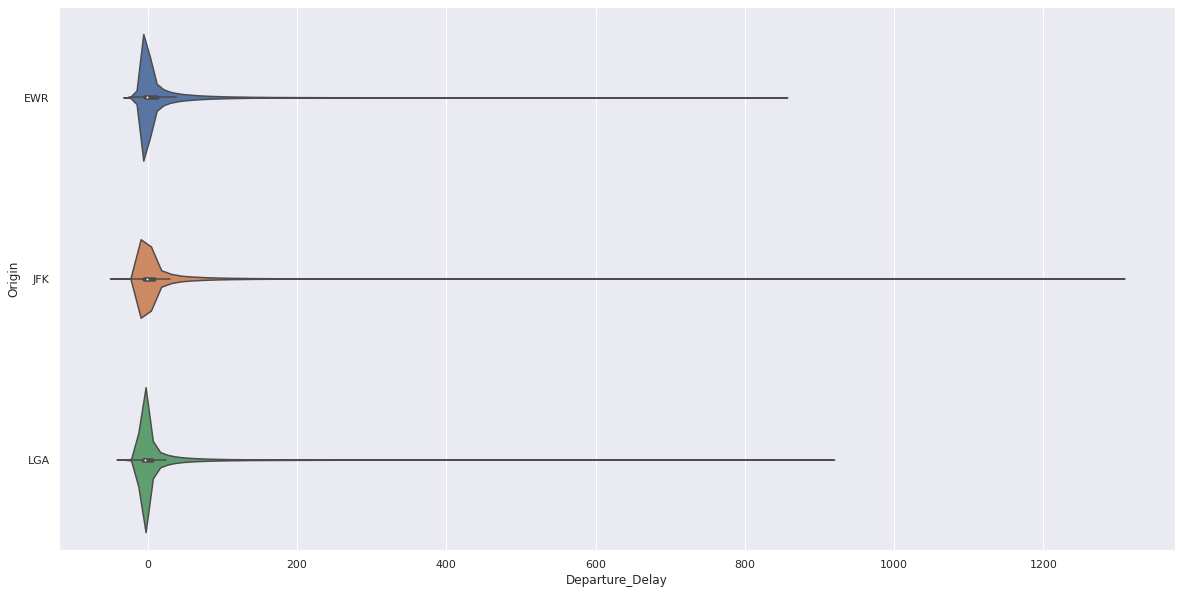

In [19]:
f = plt.figure(figsize=(20, 10))
sb.violinplot(y = 'Origin', x = 'Departure_Delay', data = DF)

In [20]:
def statistics(group):
    return {'min': group.min(),
            'max': group.max(),
            'count': group.count(),
            'mean': group.mean(),
            'median': group.median()}

In [21]:
airportdelaystats = DF["Departure_Delay"].groupby(DF['Origin']).apply(statistics).unstack()
airportdelaystats

min     max    count       mean  median
Origin                                          
EWR    -25.0   849.0  93258.0  13.647408    -1.0
JFK    -43.0  1301.0  82045.0  10.779231    -1.0
LGA    -33.0   911.0  62471.0   9.504106    -3.0

As we can see from the statistics there is a variation in the mean Departure Delays based on which Airport the flight is originating from

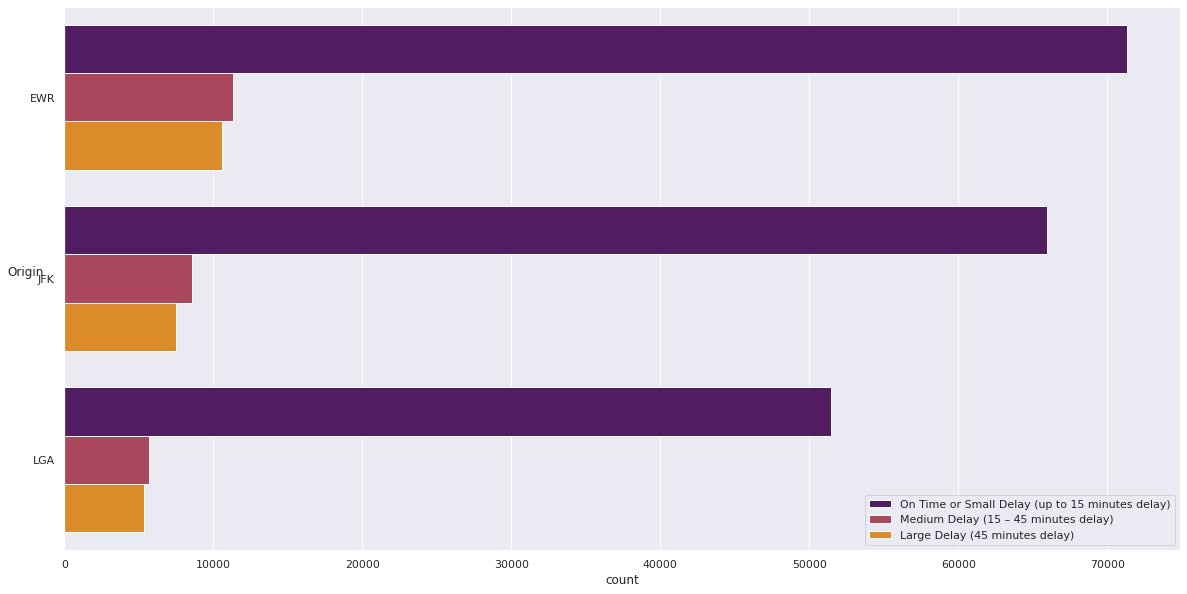

In [22]:
f = plt.figure(1, figsize=(20, 10))
sb.countplot(data = DF, y = "Origin", hue = "Delay_Level", palette = 'inferno')
f = plt.legend(loc = 'lower right')
plt.ylabel("Origin",rotation = 0)
f.get_texts()[0].set_text('On Time or Small Delay (up to 15 minutes delay)')
f.get_texts()[1].set_text('Medium Delay (15 – 45 minutes delay)')
f.get_texts()[2].set_text('Large Delay (45 minutes delay)')
plt.show()

This is data could could be better understood with the use of a stacked percentage barplot

In [23]:
Airportgraph = DF.copy()
Airportgraph = Airportgraph.groupby(by=['Origin','Delay_Level']).count().unstack()
Airportgraph.head()

Time_Hour_TS               Airline               Flight_Number  \
Delay_Level            0      1      2       0      1      2             0   
Origin                                                                       
EWR                71343  11320  10595   71343  11320  10595         71343   
JFK                65960   8568   7517   65960   8568   7517         65960   
LGA                51443   5711   5317   51443   5711   5317         51443   

                          Tail_Number  ...  Month    Day                 Hour  \
Delay_Level      1      2           0  ...      2      0      1      2      0   
Origin                                 ...                                      
EWR          11320  10595       71343  ...  10595  71343  11320  10595  71343   
JFK           8568   7517       65960  ...   7517  65960   8568   7517  65960   
LGA           5711   5317       51443  ...   5317  51443   5711   5317  51443   

                          Time_Series                
Delay_Level      1      2           0      1      2  
Origin                                               
EWR          11320  10595       71343  11320  10595  
JFK           8568   7517       65960   8568   7517  
LGA           5711   5317       51443   5711   5317  

[3 rows x 90 columns]

<Figure size 1440x720 with 0 Axes>

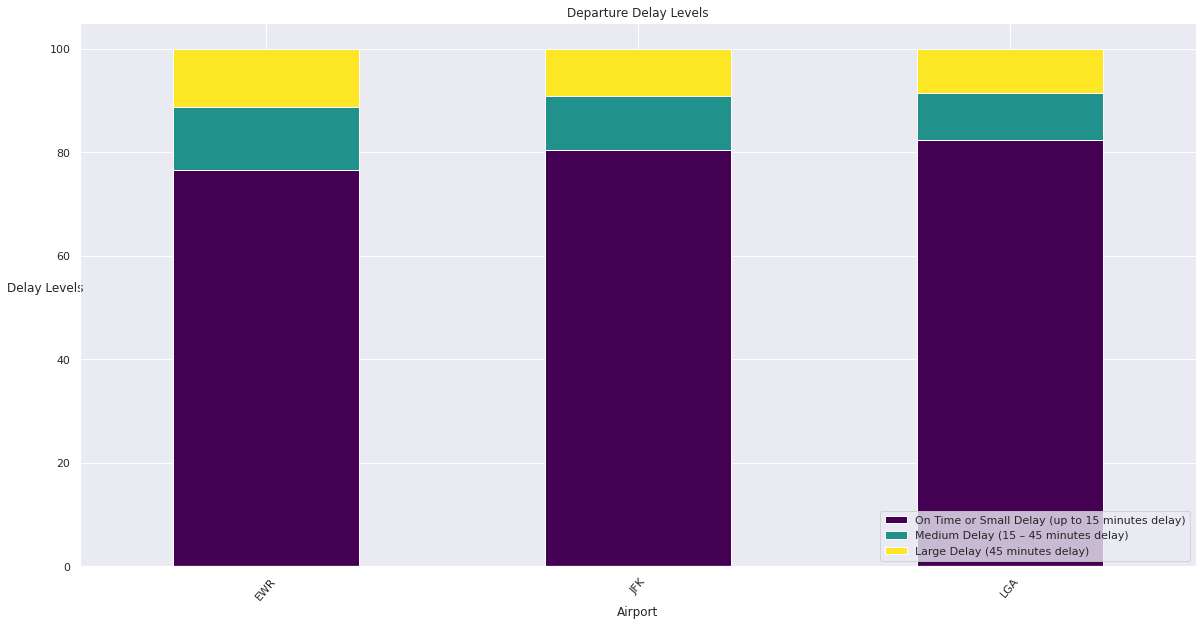

In [24]:
f = plt.figure(figsize=(20,10))
stacked_data = Airportgraph['Departure_Delay'].apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize = (20,10),colormap = "viridis")
f = plt.legend(loc = 'lower right')
plt.title("Departure Delay Levels")
plt.xticks(rotation = 50)
plt.xlabel("Airport")
plt.ylabel("Delay Levels", rotation = 0)
f.get_texts()[0].set_text('On Time or Small Delay (up to 15 minutes delay)')
f.get_texts()[1].set_text('Medium Delay (15 – 45 minutes delay)')
f.get_texts()[2].set_text('Large Delay (45 minutes delay)')
plt.show()

There is a slight difference in the Departure Delay Levels when they are sorted according to the origin airports

## Checking whether Airlines Impact Departure Delays

One of the main differences in delays can be the fact that different airlines have different on-time performance staistics

In [25]:
airlinesdata

NameError: name 'airlinesdata' is not defined

<AxesSubplot:xlabel='Departure_Delay', ylabel='Airline'>

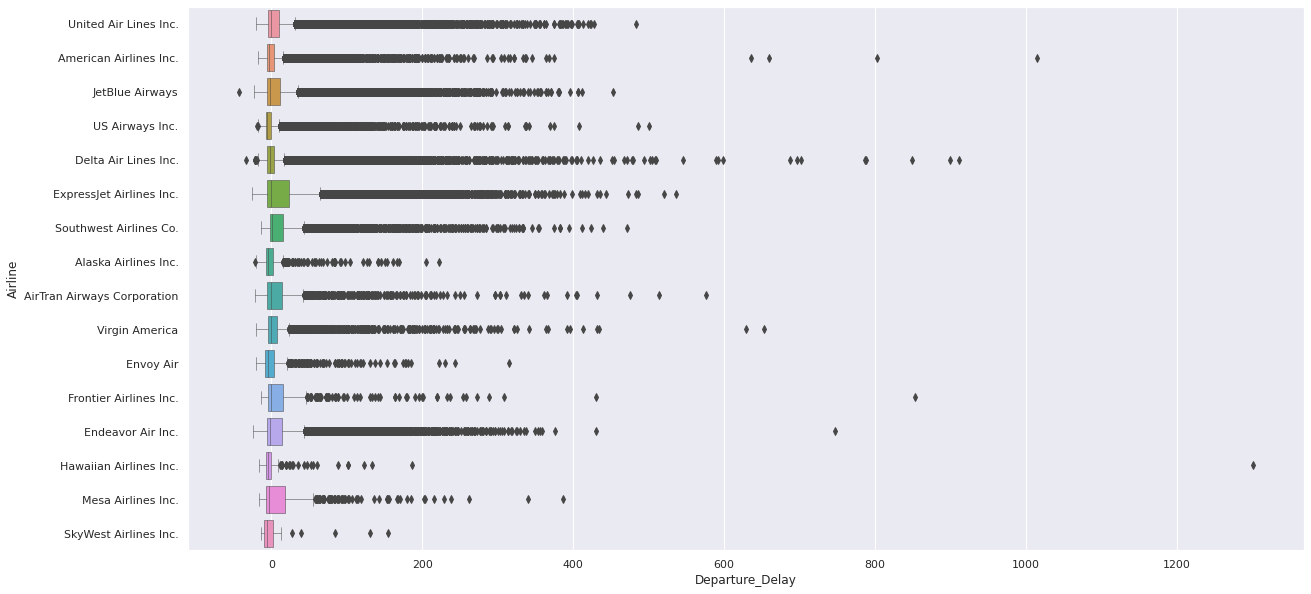

In [26]:
f = plt.figure(figsize=(20, 10))
sb.boxplot(y="Airline", x="Departure_Delay",data=DF, linewidth = 0.5)

It was not easy to visualise the Delay Statistics based on Airlines using a boxplot so we decided to use a stripplot instead

<AxesSubplot:xlabel='Departure_Delay', ylabel='Airline'>

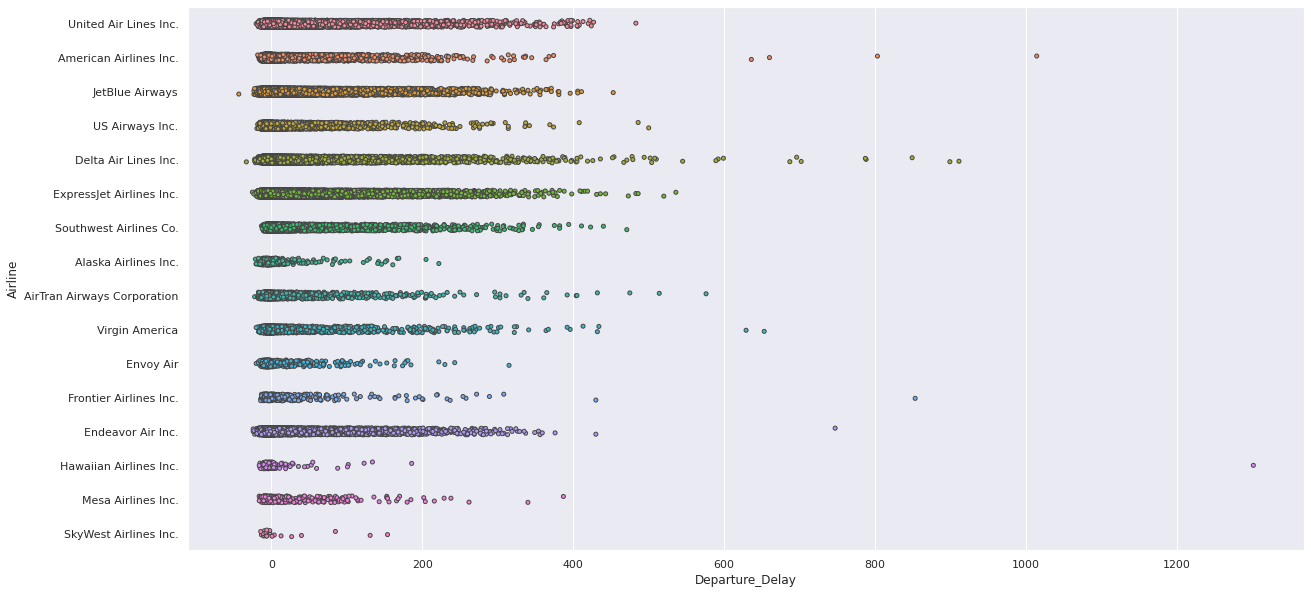

In [27]:
f = plt.figure(figsize=(20, 10))
sb.stripplot(y="Airline", x="Departure_Delay", size = 4,data=DF, linewidth = 1,  jitter=True)

<AxesSubplot:xlabel='count', ylabel='Airline'>

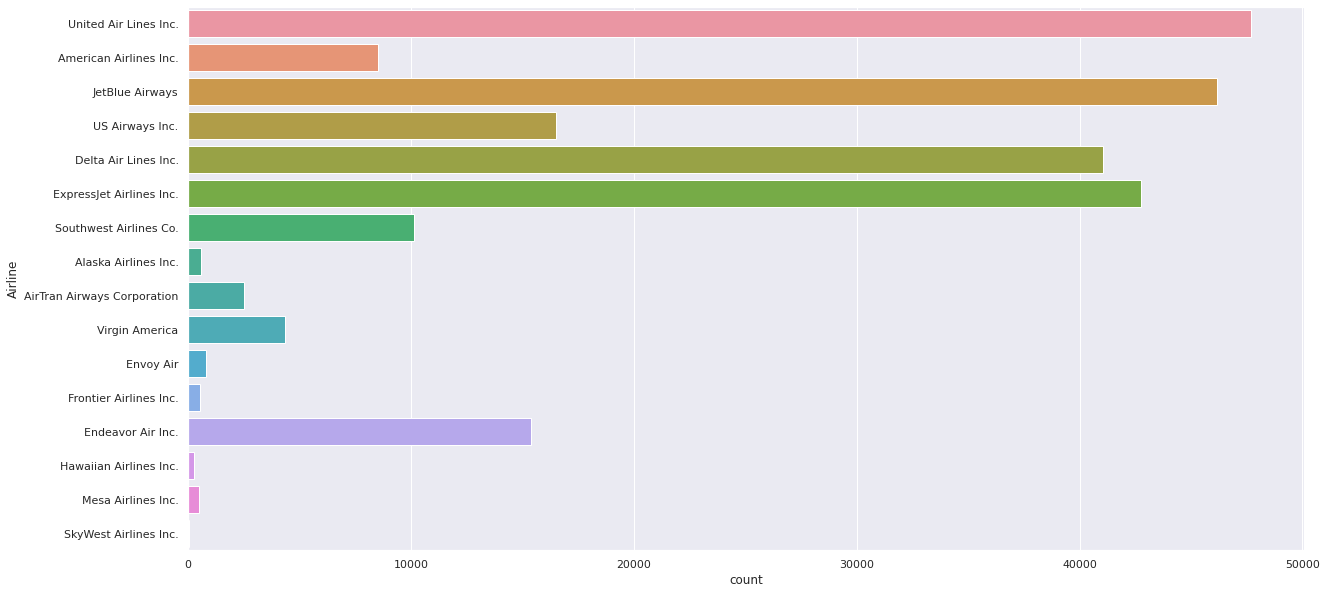

In [28]:
f = plt.figure(figsize=(20,10))
sb.countplot(data = DF, y = "Airline")

In [29]:
def individual_statistics(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean(), 'median': group.median()}

In [30]:
airline_stats = DF['Departure_Delay'].groupby(DF['Airline']).apply(individual_statistics).unstack()
airline_stats = airline_stats.sort_values('count')
airline_stats

min     max    count       mean  median
Airline                                                              
SkyWest Airlines Inc.       -14.0   154.0     27.0  11.333333    -6.0
Hawaiian Airlines Inc.      -16.0  1301.0    262.0   5.782443    -4.0
Mesa Airlines Inc.          -16.0   387.0    482.0  17.128631    -3.0
Frontier Airlines Inc.      -14.0   853.0    546.0  19.335165     0.0
Alaska Airlines Inc.        -21.0   222.0    602.0   4.127907    -4.0
Envoy Air                   -20.0   315.0    826.0   6.762712    -4.0
AirTran Airways Corporation -22.0   576.0   2527.0  14.626435     0.0
Virgin America              -20.0   653.0   4341.0  12.192813     0.0
American Airlines Inc.      -18.0  1014.0   8520.0   9.124765    -3.0
Southwest Airlines Co.      -13.0   471.0  10120.0  15.631818     1.0
Endeavor Air Inc.           -24.0   747.0  15386.0  14.215716    -2.0
US Airways Inc.             -19.0   500.0  16499.0   2.890963    -5.0
Delta Air Lines Inc.        -33.0   911.0  41044.0   7.649303    -2.0
ExpressJet Airlines Inc.    -25.0   536.0  42735.0  17.868773    -1.0
JetBlue Airways             -43.0   453.0  46169.0  11.366111    -2.0
United Air Lines Inc.       -20.0   483.0  47688.0  11.062490     0.0

As we can see from the individual Airline staitistics there is a clear difference in the mean Departure Delay between the different Airlines

We are also going to remove the Airlines that are underrepresented so that the fit for our regression models will be better later on

Dropped all the Airlines which had a count <1000

In [31]:
DF = DF[DF['Airline'] != 'SkyWest Airlines Inc.']
DF = DF[DF['Airline'] != 'Hawaiian Airlines Inc.']
DF = DF[DF['Airline'] != 'Mesa Airlines Inc.']
DF = DF[DF['Airline'] != 'Frontier Airlines Inc.']
DF = DF[DF['Airline'] != 'Alaska Airlines Inc.']
DF = DF[DF['Airline'] != 'Envoy Air']

In [32]:
airline_stats = DF['Departure_Delay'].groupby(DF['Airline']).apply(individual_statistics).unstack()
airline_stats = airline_stats.sort_values('count')
airline_stats

min     max    count       mean  median
Airline                                                              
AirTran Airways Corporation -22.0   576.0   2527.0  14.626435     0.0
Virgin America              -20.0   653.0   4341.0  12.192813     0.0
American Airlines Inc.      -18.0  1014.0   8520.0   9.124765    -3.0
Southwest Airlines Co.      -13.0   471.0  10120.0  15.631818     1.0
Endeavor Air Inc.           -24.0   747.0  15386.0  14.215716    -2.0
US Airways Inc.             -19.0   500.0  16499.0   2.890963    -5.0
Delta Air Lines Inc.        -33.0   911.0  41044.0   7.649303    -2.0
ExpressJet Airlines Inc.    -25.0   536.0  42735.0  17.868773    -1.0
JetBlue Airways             -43.0   453.0  46169.0  11.366111    -2.0
United Air Lines Inc.       -20.0   483.0  47688.0  11.062490     0.0

In [33]:
DF['Airline'].value_counts()

United Air Lines Inc.          47688
JetBlue Airways                46169
ExpressJet Airlines Inc.       42735
Delta Air Lines Inc.           41044
US Airways Inc.                16499
Endeavor Air Inc.              15386
Southwest Airlines Co.         10120
American Airlines Inc.          8520
Virgin America                  4341
AirTran Airways Corporation     2527
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='mean'>

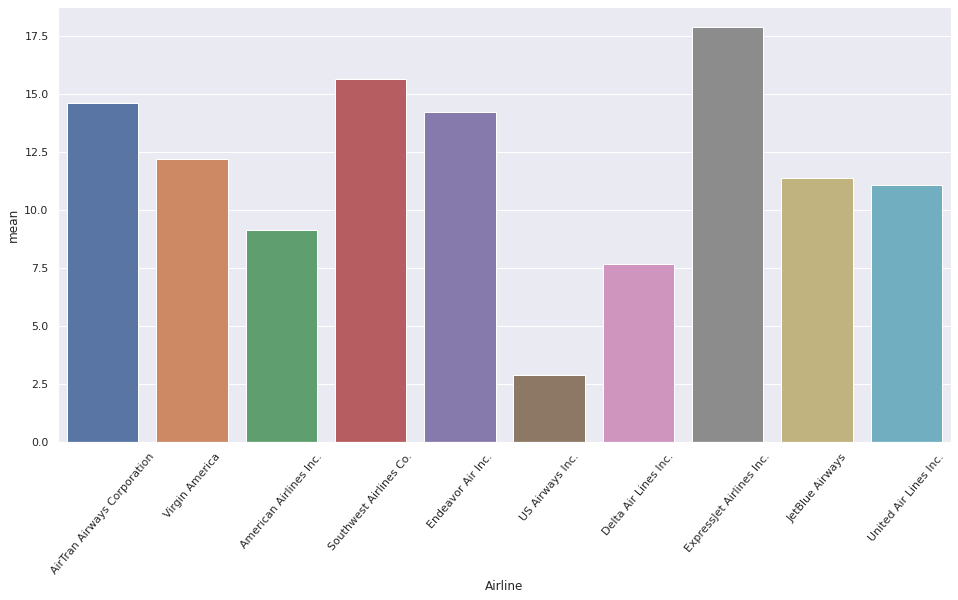

In [34]:
f = plt.figure(figsize = (16,8))

plt.xticks(rotation=50)
sb.barplot(data = airline_stats, y = "mean", x = airline_stats.index)

This bar plot helps us see that different Airlines indeed do have different mean Departure Delays and that Departure Delays do vary based on Airlines

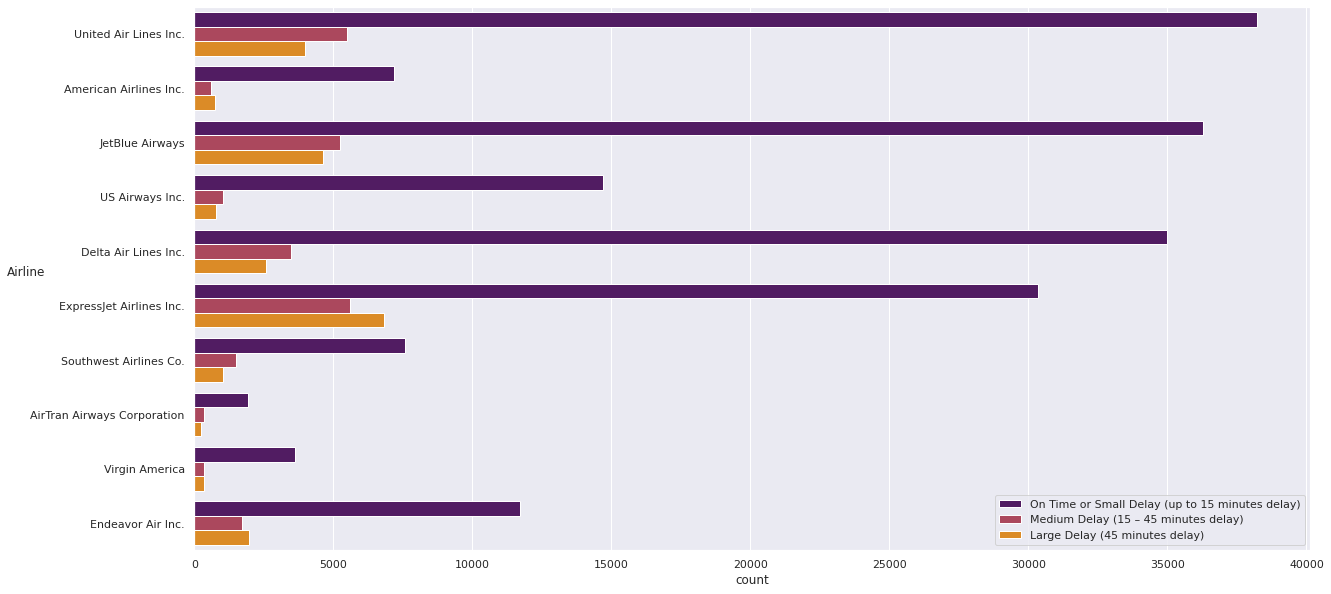

In [35]:
f = plt.figure(1, figsize=(20, 10))
sb.countplot(data = DF, y = "Airline", hue = "Delay_Level", palette = 'inferno')
f = plt.legend(loc = 'lower right')
plt.ylabel("Airline",rotation = 0)
f.get_texts()[0].set_text('On Time or Small Delay (up to 15 minutes delay)')
f.get_texts()[1].set_text('Medium Delay (15 – 45 minutes delay)')
f.get_texts()[2].set_text('Large Delay (45 minutes delay)')
plt.show()

This is data could could be better understood with the use of a stacked percentage barplot

In [36]:
Airlinegraph = DF.copy()
Airlinegraph = Airlinegraph.groupby(by=['Airline','Delay_Level']).count().unstack()
Airlinegraph.head()

Time_Hour_TS             Flight_Number        \
Delay_Level                            0     1     2             0     1   
Airline                                                                    
AirTran Airways Corporation         1931   339   257          1931   339   
American Airlines Inc.              7184   597   739          7184   597   
Delta Air Lines Inc.               34973  3488  2583         34973  3488   
Endeavor Air Inc.                  11705  1709  1972         11705  1709   
ExpressJet Airlines Inc.           30329  5589  6817         30329  5589   

                                  Tail_Number             Departure_Time  ...  \
Delay_Level                     2           0     1     2              0  ...   
Airline                                                                   ...   
AirTran Airways Corporation   257        1931   339   257           1931  ...   
American Airlines Inc.        739        7184   597   739           7184  ...   
Delta Air Lines Inc.         2583       34973  3488  2583          34973  ...   
Endeavor Air Inc.            1972       11705  1709  1972          11705  ...   
ExpressJet Airlines Inc.     6817       30329  5589  6817          30329  ...   

                            Month    Day               Hour              \
Delay_Level                     2      0     1     2      0     1     2   
Airline                                                                   
AirTran Airways Corporation   257   1931   339   257   1931   339   257   
American Airlines Inc.        739   7184   597   739   7184   597   739   
Delta Air Lines Inc.         2583  34973  3488  2583  34973  3488  2583   
Endeavor Air Inc.            1972  11705  1709  1972  11705  1709  1972   
ExpressJet Airlines Inc.     6817  30329  5589  6817  30329  5589  6817   

                            Time_Series              
Delay_Level                           0     1     2  
Airline                                              
AirTran Airways Corporation        1931   339   257  
American Airlines Inc.             7184   597   739  
Delta Air Lines Inc.              34973  3488  2583  
Endeavor Air Inc.                 11705  1709  1972  
ExpressJet Airlines Inc.          30329  5589  6817  

[5 rows x 90 columns]

<Figure size 1440x720 with 0 Axes>

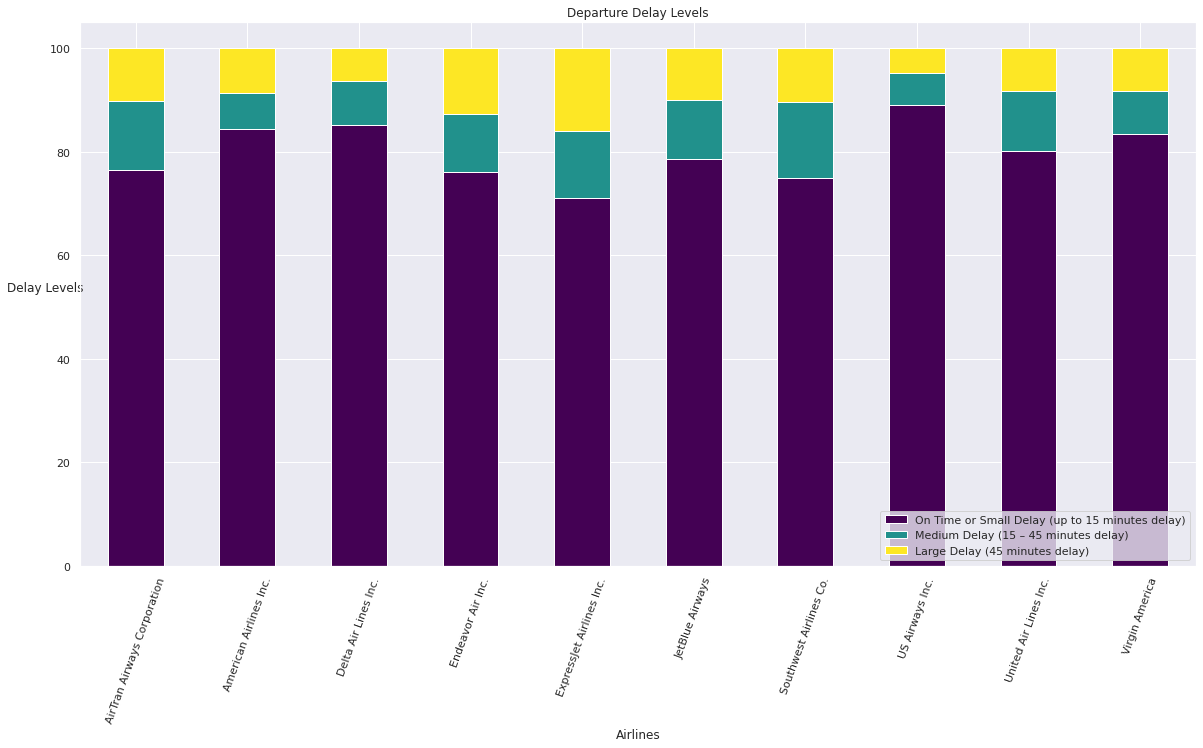

In [37]:
f = plt.figure(figsize=(20,10))
stacked_data = Airlinegraph['Departure_Delay'].apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize = (20,10),colormap = "viridis")
f = plt.legend(loc = 'lower right')
plt.title("Departure Delay Levels")
plt.xticks(rotation = 70)
plt.xlabel("Airlines")
plt.ylabel("Delay Levels", rotation = 0)
f.get_texts()[0].set_text('On Time or Small Delay (up to 15 minutes delay)')
f.get_texts()[1].set_text('Medium Delay (15 – 45 minutes delay)')
f.get_texts()[2].set_text('Large Delay (45 minutes delay)')
plt.show()

We can clearly see that there is a difference in the Delay Levels when they are sorted according to Airlines

## Checking whether Aircraft Type Impacts Departure Delays

In [38]:
print("Number of different aircraft types: {}".format(len(DF["Aircraft_Type"].unique())))

Number of different aircraft types: 3


Fixed wing multi engine     233975
Fixed wing single engine       709
Rotorcraft                     345
Name: Aircraft_Type, dtype: int64


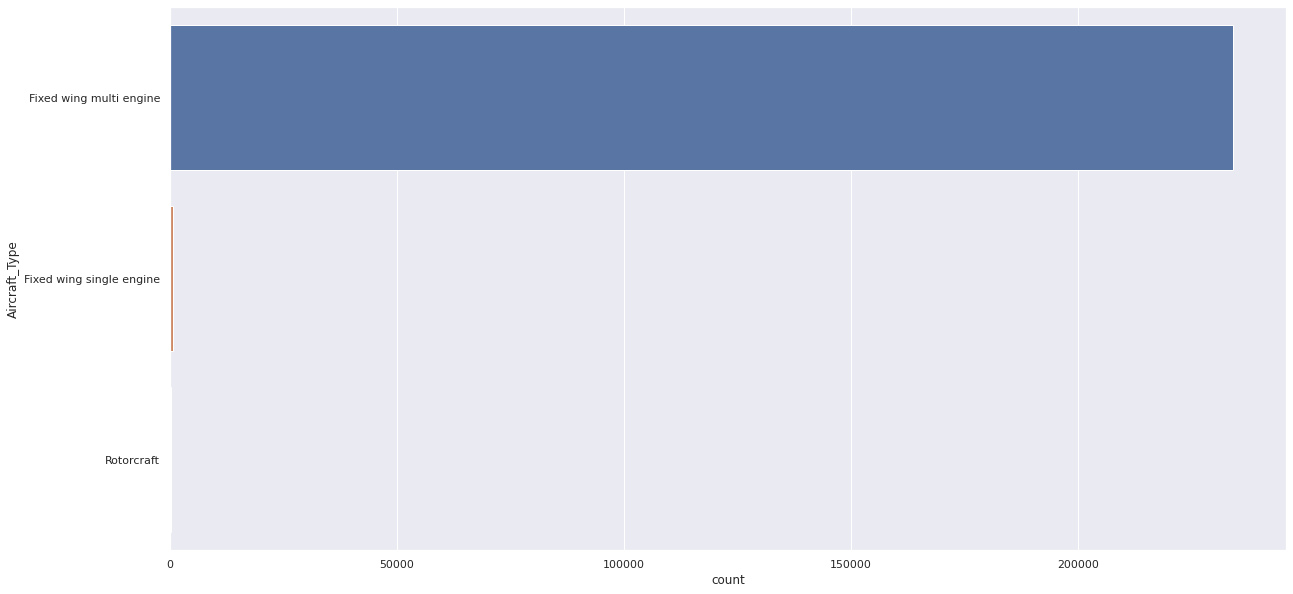

In [39]:
f = plt.figure(figsize=(20,10))
sb.countplot(y="Aircraft_Type", data = DF)
print(DF["Aircraft_Type"].value_counts())

As we can see this is highly imbalanced and there is only one dominant Aircraft Type therefore we can choose to ignore this Variable

## Checking whether Aircraft Model Impacts Departure Delays

In [40]:
print("Number of different aircraft models: {}".format(len(DF["Model"].unique())))
print("\n")
DF["Model"].value_counts()

Number of different aircraft models: 109




A320-232           39202
EMB-145LR          21977
ERJ 190-100 IGW    20184
EMB-145XR          11360
737-824            11240
                   ...  
757-2B7                2
737-3T5                1
A330-323               1
767-201                1
737-3A4                1
Name: Model, Length: 109, dtype: int64

There are too many different Aircraft Models to do individual statisctics on. And we also feel that the model of the airplane would be accounted for by the other variables of the aircraft itself so we decided to omit this variable.

## Checking whether Engine Type Impacts Departure Delays

In [41]:
print("Number of different engine types: {}".format(len(DF["Engine_Type"].unique())))

Number of different engine types: 6


<AxesSubplot:xlabel='Departure_Delay', ylabel='Engine_Type'>

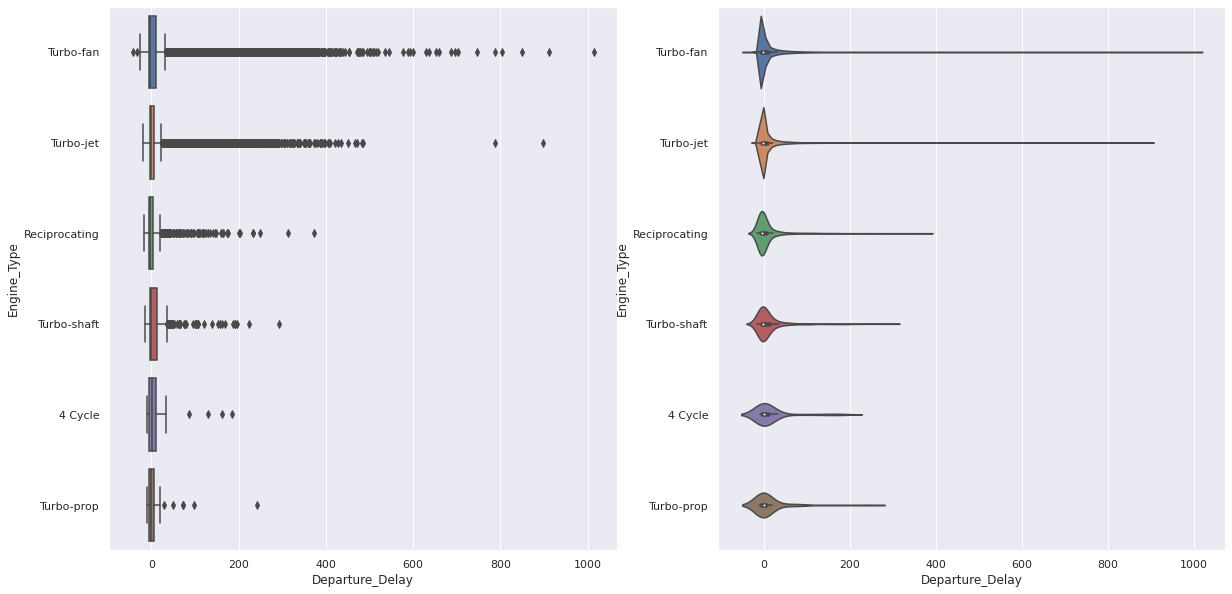

In [42]:
f,axes = plt.subplots(1,2,figsize=(20, 10))
sb.boxplot(y = 'Engine_Type', x = 'Departure_Delay', data = DF,ax=axes[0])
sb.violinplot(y = 'Engine_Type', x = 'Departure_Delay', data = DF, ax=axes[1])

Turbo-fan        199377
Turbo-jet         34436
Reciprocating       788
Turbo-shaft         345
Turbo-prop           43
4 Cycle              40
Name: Engine_Type, dtype: int64


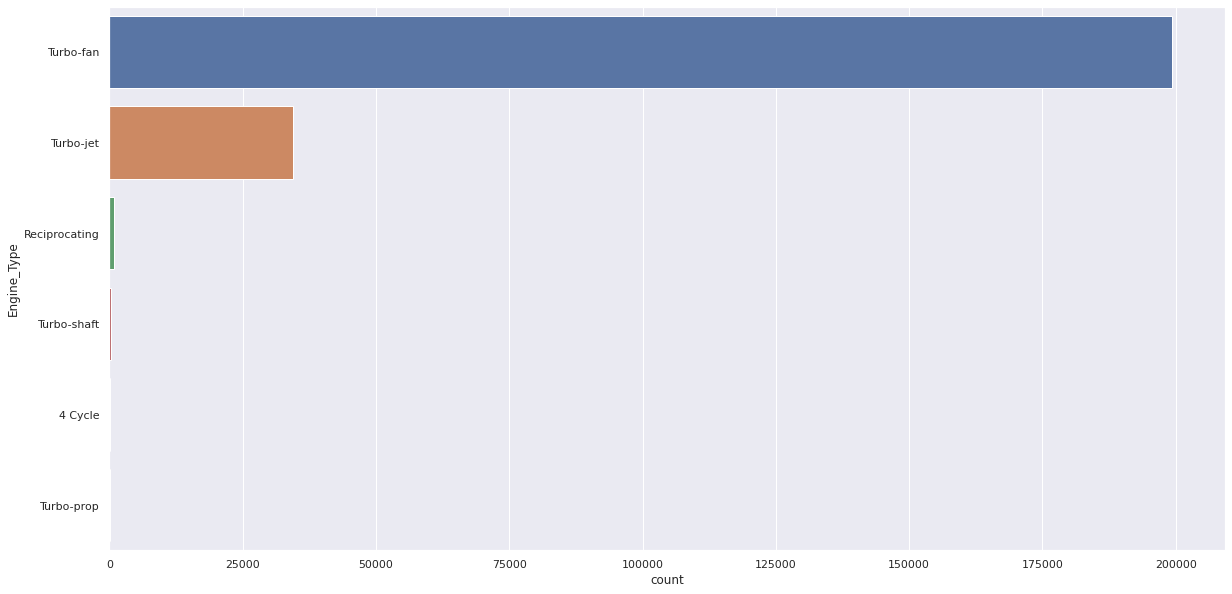

In [43]:
f = plt.figure(figsize=(20,10))
sb.countplot(y="Engine_Type", data = DF)
print(DF["Engine_Type"].value_counts()) 

In [44]:
enginedelaystats = DF["Departure_Delay"].groupby(DF['Engine_Type']).apply(statistics).unstack()
enginedelaystats

min     max     count       mean  median
Engine_Type                                             
4 Cycle        -9.0   186.0      40.0  17.200000     1.0
Reciprocating -16.0   374.0     788.0   8.614213    -3.0
Turbo-fan     -43.0  1014.0  199377.0  11.923146    -2.0
Turbo-jet     -20.0   899.0   34436.0   9.649959    -1.0
Turbo-prop     -9.0   242.0      43.0  12.674419     0.0
Turbo-shaft   -15.0   292.0     345.0  13.362319    -1.0

As we can see from the individual Engine Type statistics there is a clear difference in the mean Departure Delay between the different Engine Types

We are also going to remove the Engine Types that are underrepresented so that the fit for our regression models will be better later on

Dropped all the Engine Types which have a count <1000

In [45]:
DF = DF[DF['Engine_Type'] != '4 Cycle']
DF = DF[DF['Engine_Type'] != 'Reciprocating']
DF = DF[DF['Engine_Type'] != 'Turbo-prop']
DF = DF[DF['Engine_Type'] != 'Turbo-shaft']

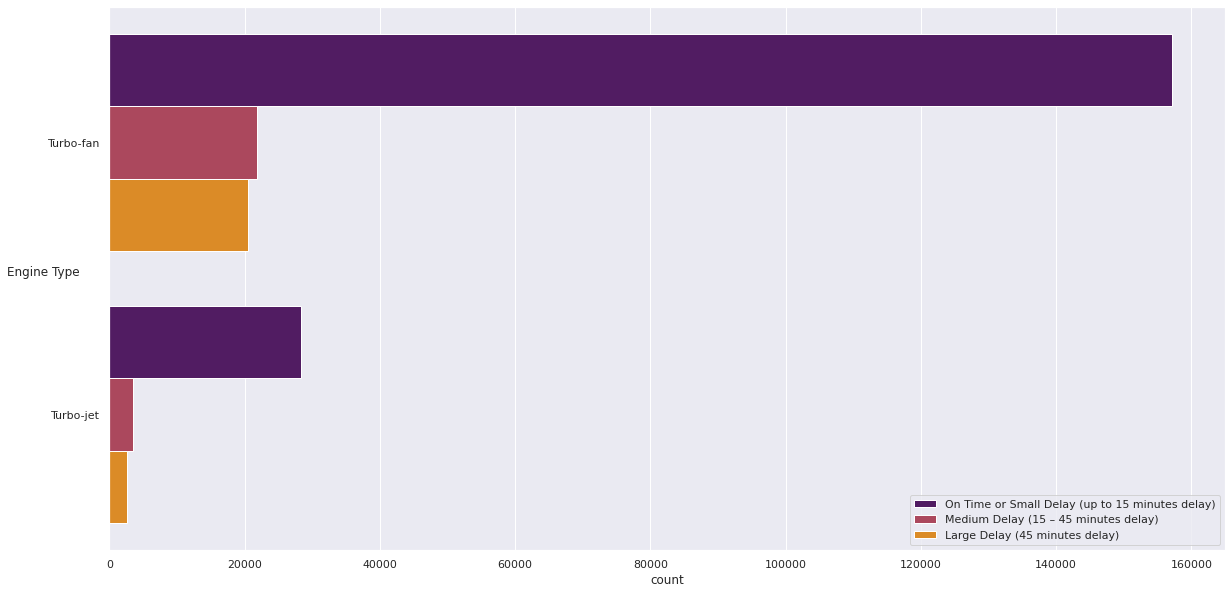

In [46]:
f = plt.figure(1, figsize=(20, 10))
sb.countplot(data = DF, y = "Engine_Type", hue = "Delay_Level", palette = 'inferno')
f = plt.legend(loc = 'lower right')
plt.ylabel("Engine Type",rotation = 0)
f.get_texts()[0].set_text('On Time or Small Delay (up to 15 minutes delay)')
f.get_texts()[1].set_text('Medium Delay (15 – 45 minutes delay)')
f.get_texts()[2].set_text('Large Delay (45 minutes delay)')
plt.show()

This is data could could be better understood with the use of a stacked percentage barplot

In [47]:
EngineTypegraph = DF.copy()
EngineTypegraph = EngineTypegraph.groupby(by=['Engine_Type','Delay_Level']).count().unstack()
EngineTypegraph.head()

Time_Hour_TS               Airline               Flight_Number  \
Delay_Level            0      1      2       0      1      2             0   
Engine_Type                                                                  
Turbo-fan         157175  21766  20436  157175  21766  20436        157175   
Turbo-jet          28347   3456   2633   28347   3456   2633         28347   

                          Tail_Number  ...  Month     Day                \
Delay_Level      1      2           0  ...      2       0      1      2   
Engine_Type                            ...                                
Turbo-fan    21766  20436      157175  ...  20436  157175  21766  20436   
Turbo-jet     3456   2633       28347  ...   2633   28347   3456   2633   

               Hour               Time_Series                
Delay_Level       0      1      2           0      1      2  
Engine_Type                                                  
Turbo-fan    157175  21766  20436      157175  21766  20436  
Turbo-jet     28347   3456   2633       28347   3456   2633  

[2 rows x 90 columns]

<Figure size 1440x720 with 0 Axes>

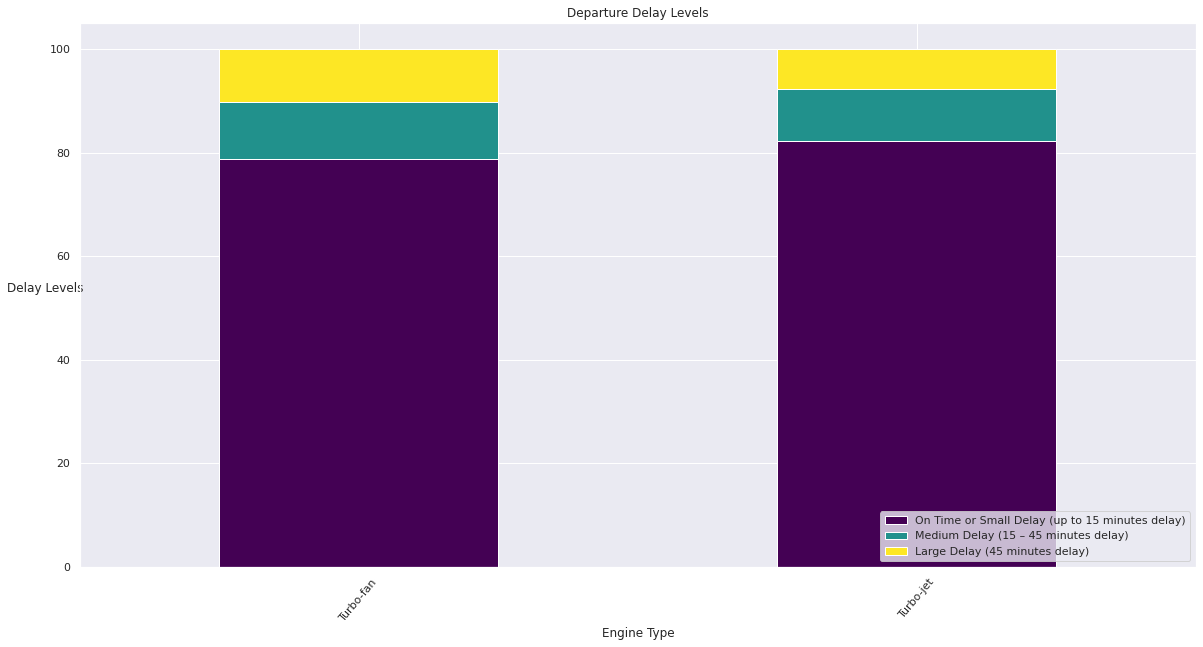

In [48]:
f = plt.figure(figsize=(20,10))
stacked_data = EngineTypegraph['Departure_Delay'].apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize = (20,10),colormap = "viridis")
f = plt.legend(loc = 'lower right')
plt.title("Departure Delay Levels")
plt.xticks(rotation = 50)
plt.xlabel("Engine Type")
plt.ylabel("Delay Levels", rotation = 0)
f.get_texts()[0].set_text('On Time or Small Delay (up to 15 minutes delay)')
f.get_texts()[1].set_text('Medium Delay (15 – 45 minutes delay)')
f.get_texts()[2].set_text('Large Delay (45 minutes delay)')
plt.show()

It seems that Turbo-fan enginese have slightly more delays.

## Checking whether the Aircraft Manufacturer Impacts Departure Delays

In [49]:
print("Number of unique manufacturers: {}".format(len(DF["Manufacturer"].unique())))

Number of unique manufacturers: 8


<AxesSubplot:xlabel='Departure_Delay', ylabel='Manufacturer'>

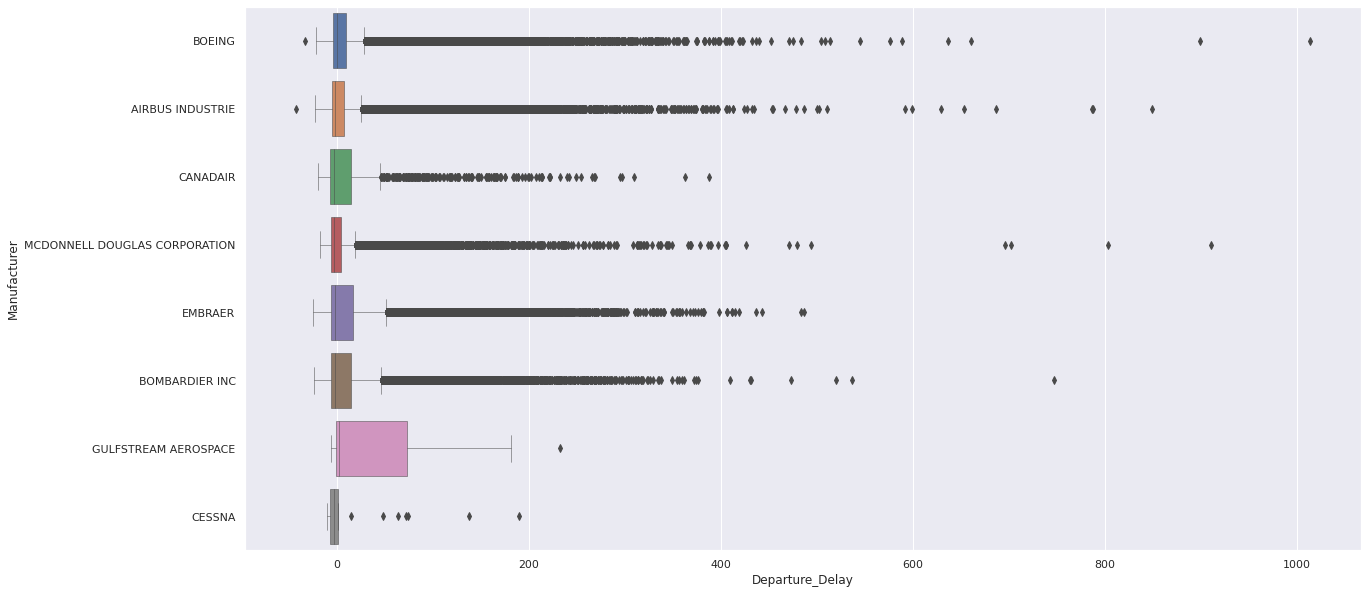

In [50]:
f = plt.figure(figsize=(20, 10))
sb.boxplot(y="Manufacturer", x="Departure_Delay",data=DF, linewidth = 0.5)

It was not easy to visualise the Delay Statistics based on Manufacturer using a boxplot so we decided to use a stripplot instead

<AxesSubplot:xlabel='Departure_Delay', ylabel='Manufacturer'>

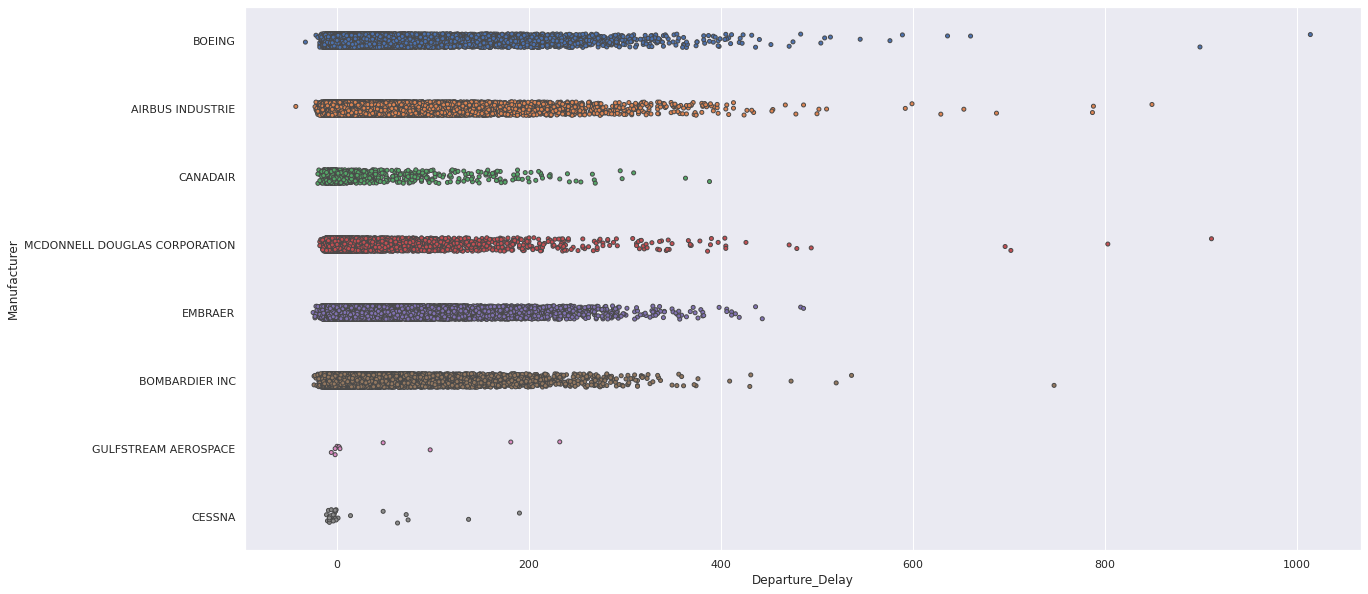

In [51]:
f = plt.figure(figsize=(20, 10))
sb.stripplot(y="Manufacturer", x="Departure_Delay", size = 4,data=DF, linewidth = 1,  jitter=True)

AIRBUS INDUSTRIE                 74108
BOEING                           69284
EMBRAER                          53743
BOMBARDIER INC                   23234
MCDONNELL DOUGLAS CORPORATION    12075
CANADAIR                          1328
CESSNA                              30
GULFSTREAM AEROSPACE                11
Name: Manufacturer, dtype: int64


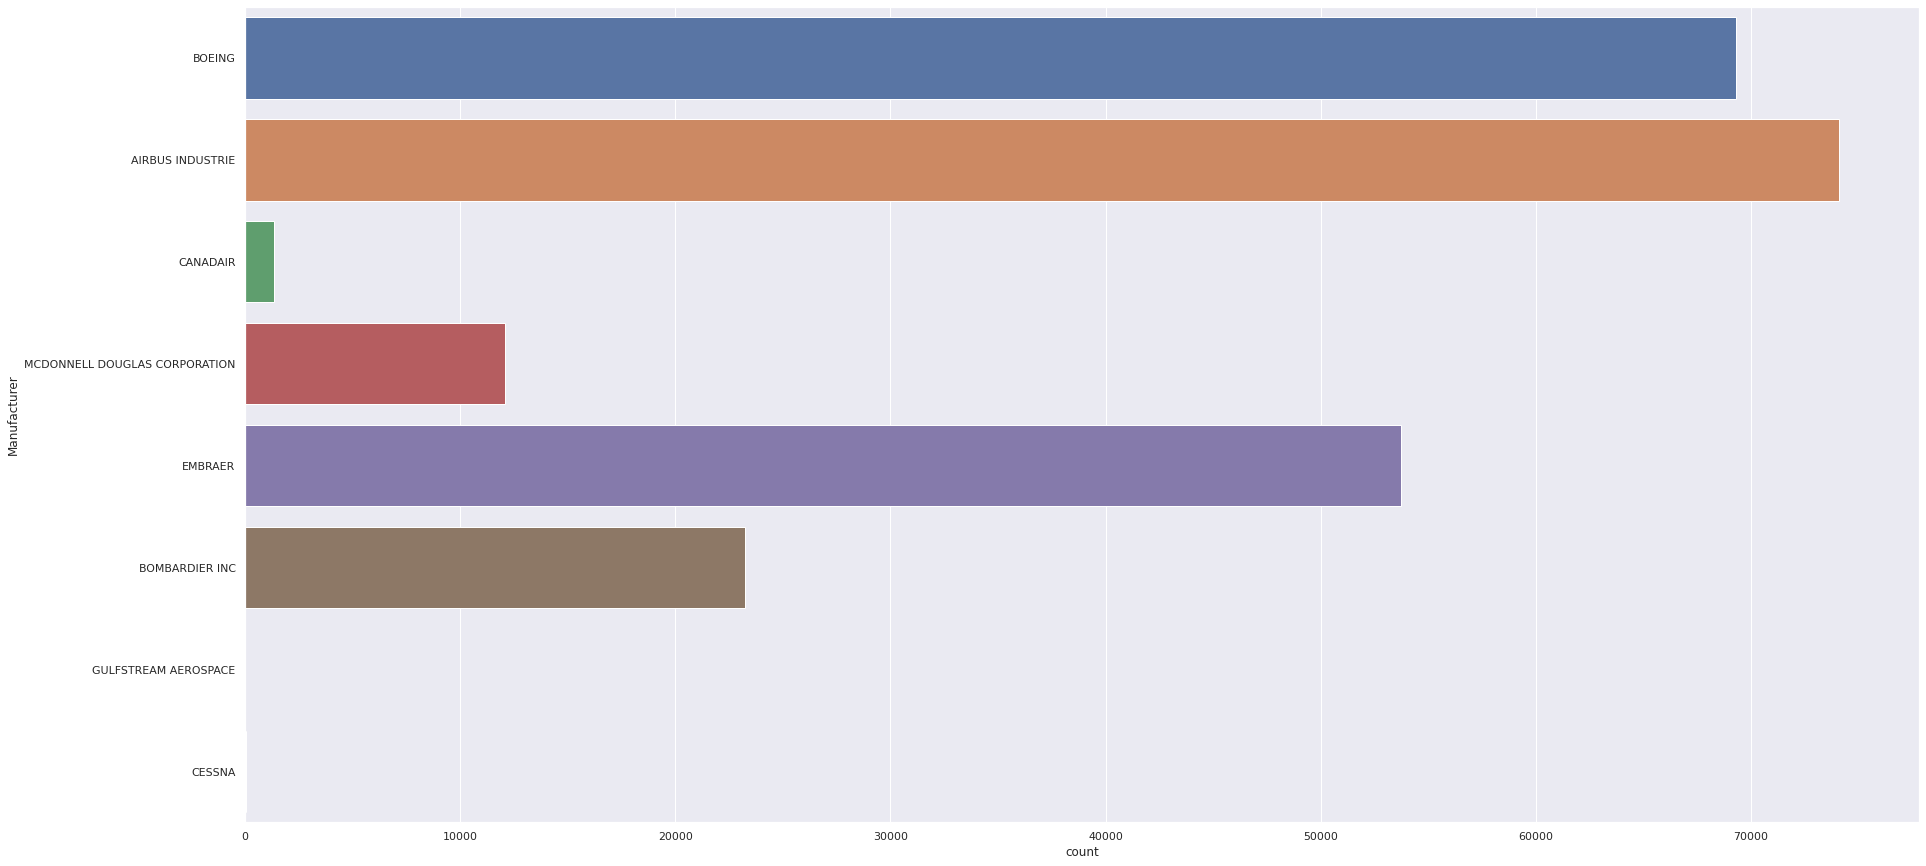

In [52]:
f = plt.figure(figsize=(30,15))
sb.countplot(y="Manufacturer", data = DF)

print(DF["Manufacturer"].value_counts())

In [53]:
manudelaystats = DF["Departure_Delay"].groupby(DF['Manufacturer']).apply(statistics).unstack()
manudelaystats

min     max    count       mean  median
Manufacturer                                                           
AIRBUS INDUSTRIE              -43.0   849.0  74108.0   9.594011    -2.0
BOEING                        -33.0  1014.0  69284.0  10.416965     0.0
BOMBARDIER INC                -24.0   747.0  23234.0  15.059955    -2.0
CANADAIR                      -20.0   388.0   1328.0  16.408886    -3.0
CESSNA                        -11.0   190.0     30.0  15.966667    -3.5
EMBRAER                       -25.0   486.0  53743.0  14.757010    -2.0
GULFSTREAM AEROSPACE           -6.0   232.0     11.0  50.454545     2.0
MCDONNELL DOUGLAS CORPORATION -18.0   911.0  12075.0   9.190145    -3.0

As we can see from the individual Aircraft Manufacturer statistics there is a clear difference in the mean Departure Delay between the different Engine Types

We are also going to remove the Aircraft Manufacturers that are underrepresented so that the fit for our regression models will be better later on

Dropped all the Aircraft Manufacturers which have a count <100

In [54]:
DF = DF[DF['Manufacturer'] != 'GULFSTREAM AEROSPACE']
DF = DF[DF['Manufacturer'] != 'CESSNA']
DF['Manufacturer'].value_counts()

AIRBUS INDUSTRIE                 74108
BOEING                           69284
EMBRAER                          53743
BOMBARDIER INC                   23234
MCDONNELL DOUGLAS CORPORATION    12075
CANADAIR                          1328
Name: Manufacturer, dtype: int64

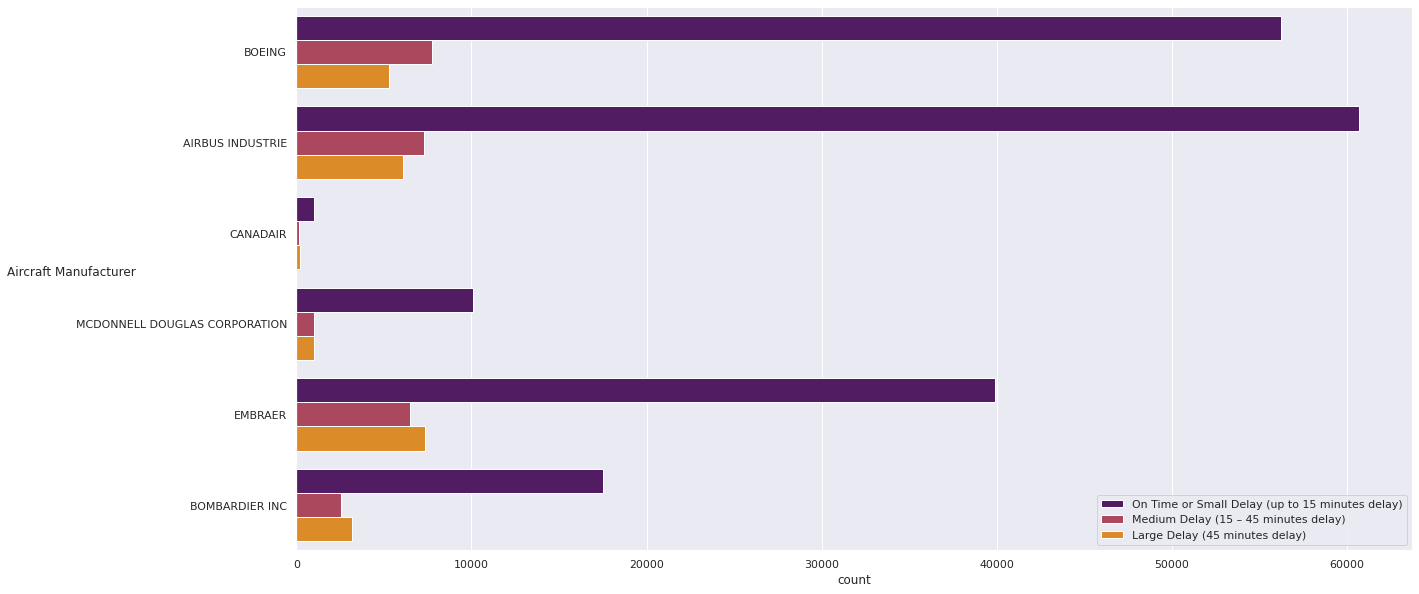

In [55]:
f = plt.figure(1, figsize=(20, 10))
sb.countplot(data = DF, y = "Manufacturer", hue = "Delay_Level", palette = 'inferno')
f = plt.legend(loc = 'lower right')
plt.ylabel("Aircraft Manufacturer",rotation = 0)
f.get_texts()[0].set_text('On Time or Small Delay (up to 15 minutes delay)')
f.get_texts()[1].set_text('Medium Delay (15 – 45 minutes delay)')
f.get_texts()[2].set_text('Large Delay (45 minutes delay)')
plt.show()

This is data could could be better understood with the use of a stacked percentage barplot

In [56]:
Manufacturergraph = DF.copy()
Manufacturergraph = Manufacturergraph.groupby(by=['Manufacturer','Delay_Level']).count().unstack()
Manufacturergraph.dropna(inplace=True)
Manufacturergraph.head()

Time_Hour_TS             Airline             Flight_Number  \
Delay_Level                 0     1     2       0     1     2             0   
Manufacturer                                                                  
AIRBUS INDUSTRIE        60719  7293  6096   60719  7293  6096         60719   
BOEING                  56272  7733  5279   56272  7733  5279         56272   
BOMBARDIER INC          17511  2566  3157   17511  2566  3157         17511   
CANADAIR                 1014   136   178    1014   136   178          1014   
EMBRAER                 39896  6482  7365   39896  6482  7365         39896   

                             Tail_Number  ... Month    Day               Hour  \
Delay_Level          1     2           0  ...     2      0     1     2      0   
Manufacturer                              ...                                   
AIRBUS INDUSTRIE  7293  6096       60719  ...  6096  60719  7293  6096  60719   
BOEING            7733  5279       56272  ...  5279  56272  7733  5279  56272   
BOMBARDIER INC    2566  3157       17511  ...  3157  17511  2566  3157  17511   
CANADAIR           136   178        1014  ...   178   1014   136   178   1014   
EMBRAER           6482  7365       39896  ...  7365  39896  6482  7365  39896   

                             Time_Series              
Delay_Level          1     2           0     1     2  
Manufacturer                                          
AIRBUS INDUSTRIE  7293  6096       60719  7293  6096  
BOEING            7733  5279       56272  7733  5279  
BOMBARDIER INC    2566  3157       17511  2566  3157  
CANADAIR           136   178        1014   136   178  
EMBRAER           6482  7365       39896  6482  7365  

[5 rows x 90 columns]

<Figure size 1440x720 with 0 Axes>

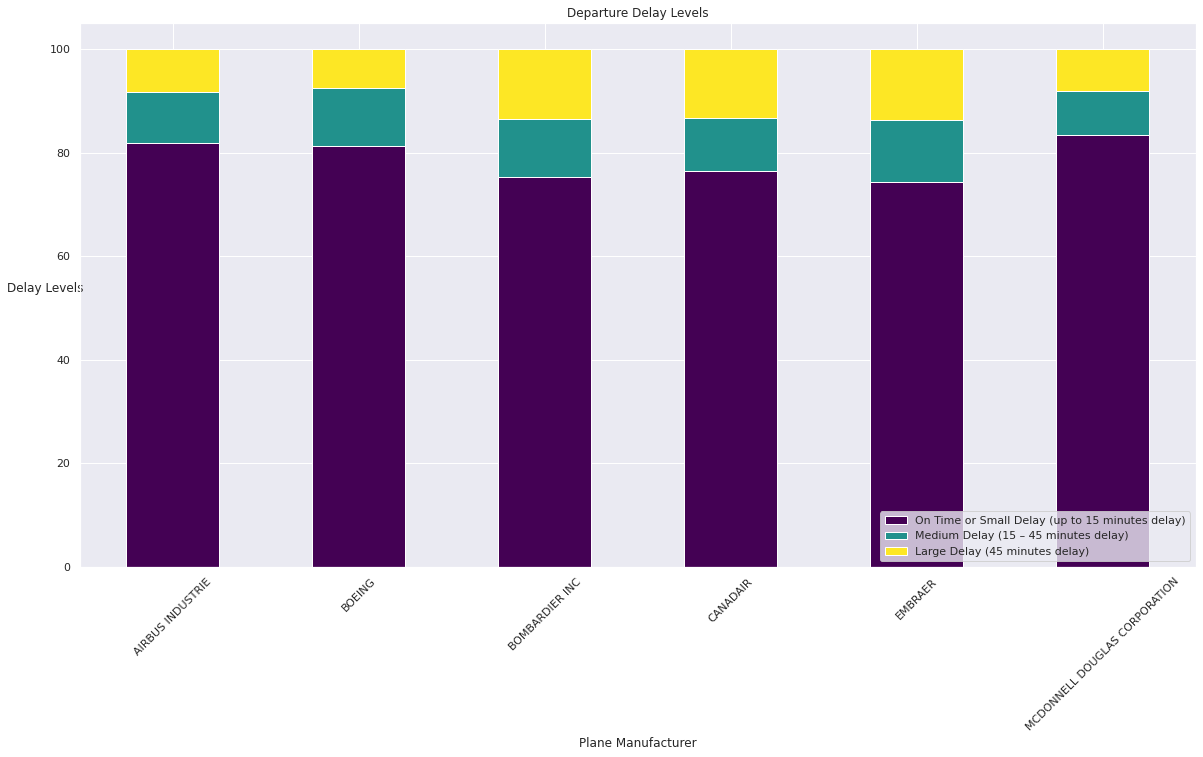

In [57]:
f = plt.figure(figsize=(20,10))
stacked_data = Manufacturergraph['Departure_Delay'].apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True,figsize = (20,10),colormap = "viridis")
f = plt.legend(loc = 'lower right')
plt.title("Departure Delay Levels")
plt.xticks(rotation = 45)
plt.xlabel("Plane Manufacturer")
plt.ylabel("Delay Levels", rotation = 0)
f.get_texts()[0].set_text('On Time or Small Delay (up to 15 minutes delay)')
f.get_texts()[1].set_text('Medium Delay (15 – 45 minutes delay)')
f.get_texts()[2].set_text('Large Delay (45 minutes delay)')
plt.show()

Some manufacturers actually build planes with more delays! This seems interesting.

## Checking whether Number of Seats Impacts Departure Delays

In [58]:
Seat_Numbers = lambda x:((0,1)[x > 100],2)[x > 200]
Number_of_Seats = DF.copy()
Number_of_Seats['Seat_number'] = DF['Seats'].apply(Seat_Numbers)

Text(0, 0.5, 'Seat Number Levels')

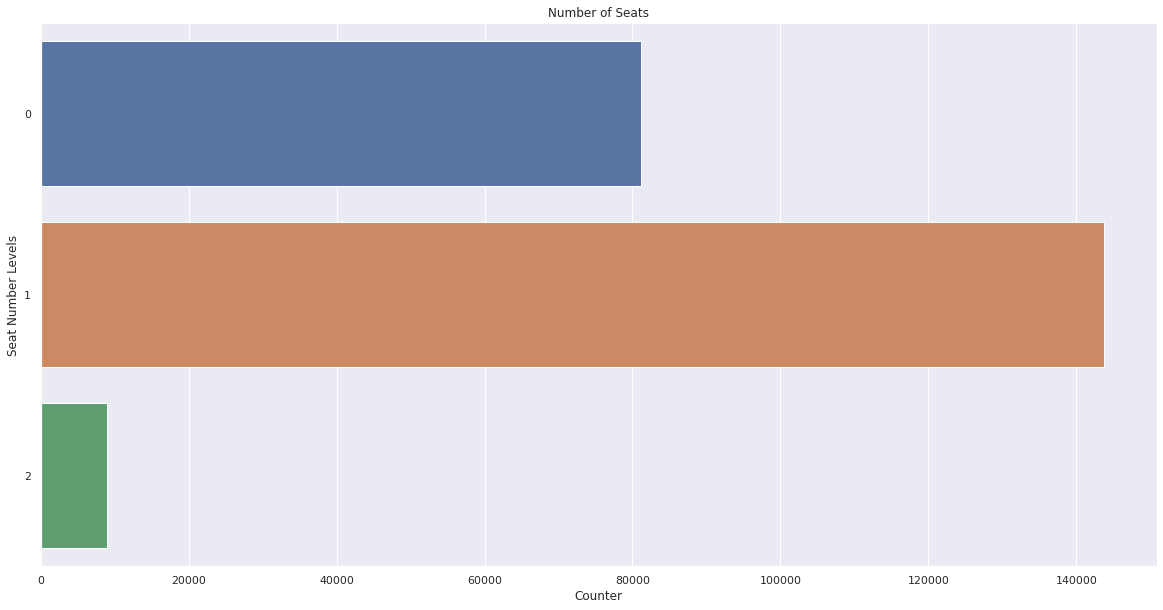

In [59]:
f = plt.figure(figsize=(20,10))
sb.countplot(y="Seat_number", data = Number_of_Seats)
plt.title("Number of Seats")
plt.xlabel("Counter")
plt.ylabel("Seat Number Levels")

* 0 : 0 - 100 seats
* 1 : 100 - 250 seats
* 2 : 250+ seats

As we can see there are many more flights in the 100 - 250 seats range

/apps/python/v3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

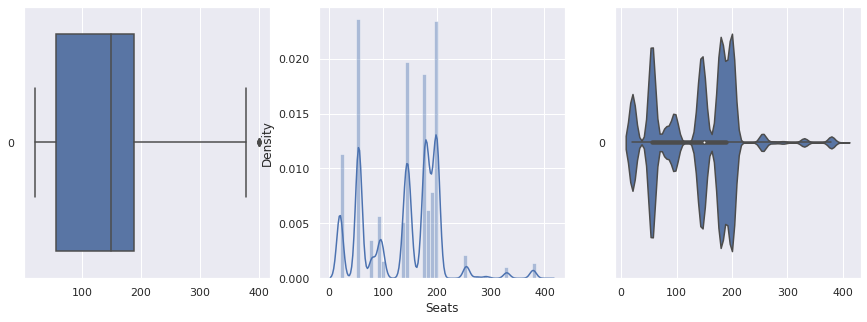

In [60]:
f,axes = plt.subplots(1,3,figsize=(15,5))

sb.boxplot(data = DF["Seats"], orient = "h", ax = axes[0])
sb.distplot(DF["Seats"], ax = axes[1])
sb.violinplot(data = DF["Seats"], orient = "h", ax = axes[2])

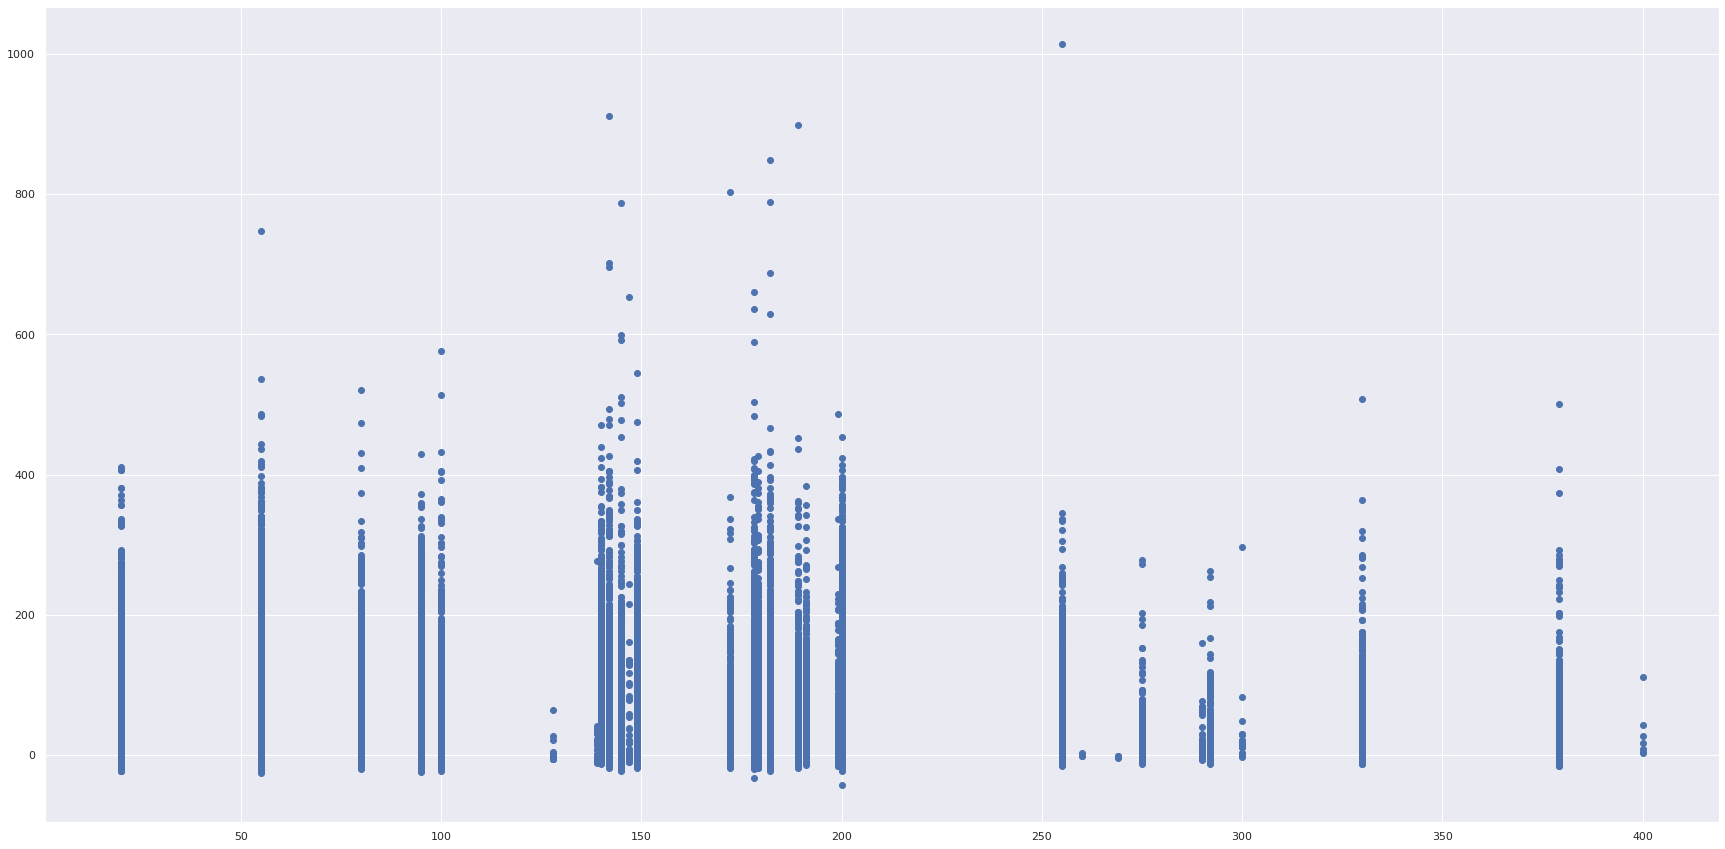

In [61]:
f = plt.figure(figsize=(30,15))

plt.scatter(DF["Seats"],DF["Departure_Delay"])

We thought that more Seats would lead to a greater Departure Delay but that is not the case after we take a look at the scatterplot. The Delays are equally spread out with different Numbers of Seats. We can see a cluster of seats in the 100-200 range and this is probably because our data set consists of a majority of aircraft that has around 100-200 seats.

## Checking whether the Departure Delays change with respect to the Months

In [62]:
Monthly_Delay = DF.copy()
Monthly_Delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233772 entries, 0 to 237773
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Time_Hour_TS       233772 non-null  object 
 1   Airline            233772 non-null  object 
 2   Flight_Number      233772 non-null  int64  
 3   Tail_Number        233772 non-null  object 
 4   Departure_Time     233772 non-null  object 
 5   Departure_Delay    233772 non-null  float64
 6   Arrival_Time       233772 non-null  object 
 7   Arrival_Delay      233772 non-null  float64
 8   Origin             233772 non-null  object 
 9   Destination        233772 non-null  object 
 10  Flight_Distance    233772 non-null  int64  
 11  Flight_Duration    233772 non-null  float64
 12  Aircraft_Type      233772 non-null  object 
 13  Model              233772 non-null  object 
 14  Year_Manufactured  233772 non-null  float64
 15  Manufacturer       233772 non-null  object 
 16  Nu

In [63]:
Monthly_Delay = Monthly_Delay[['Month','Origin','Departure_Delay']]

In [64]:
Monthly_Delay = Monthly_Delay.groupby(by=['Month','Origin']).mean().unstack()
Monthly_Delay

Departure_Delay                      
Origin             EWR        JFK        LGA
Month                                       
1            13.747878   7.738005   5.080045
2            12.328721   9.435509   5.953337
3            16.368871   8.735006   9.056774
4            16.218854  10.962754   9.439104
5            13.549822  10.934059   9.345776
6            21.225234  18.833877  17.743442
7            20.734104  23.194981  17.660024
8            11.528871  12.493567  11.117658
9             5.879492   5.832855   6.662941
10            7.972079   3.862205   5.580759
11            6.363256   4.079542   4.429216
12           19.382316  12.474139  12.040834

<AxesSubplot:xlabel='Month'>

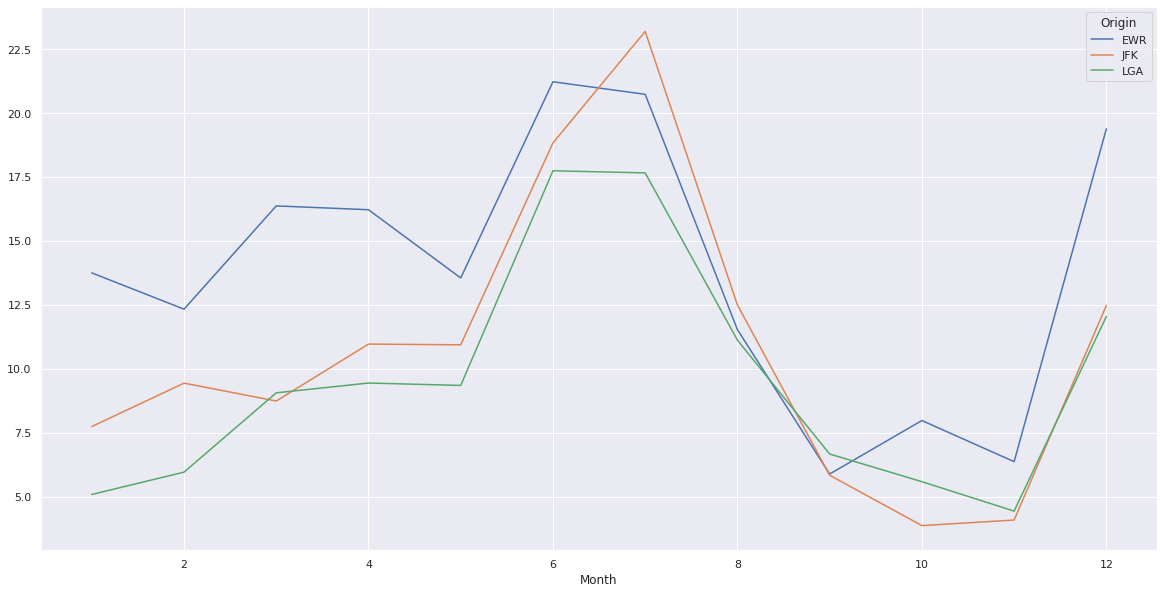

In [65]:
Monthly_Delay['Departure_Delay'].plot(figsize=(20, 10))

As we can see there is a spike in the mean monthly Departure Delays in the months of June and July along with December. Decmber can be because of the increase in crowd due to the increase in number of flights. We can check if this is actually the reason w=by seeing the Spread of Flights in a Year based on Months.

### Seeing the Spread of Flights in a Year based on Months

In [66]:
Flights = DF.copy()
Flights = Flights[["Flight_Number","Month","Origin"]]

In [67]:
Flights = Flights.groupby(by=['Month','Origin']).count().unstack()
Flights

Flight_Number            
Origin           EWR   JFK   LGA
Month                           
1               7540  6607  4460
2               6793  5807  3986
3               7954  7053  5108
4               8412  6927  5181
5               7577  6794  4688
6               7490  6748  4689
7               7785  7093  4968
8               7828  7539  5346
9               7792  6970  5637
10              8166  7083  5956
11              7887  6462  5538
12              7193  6013  4702

<AxesSubplot:xlabel='Month'>

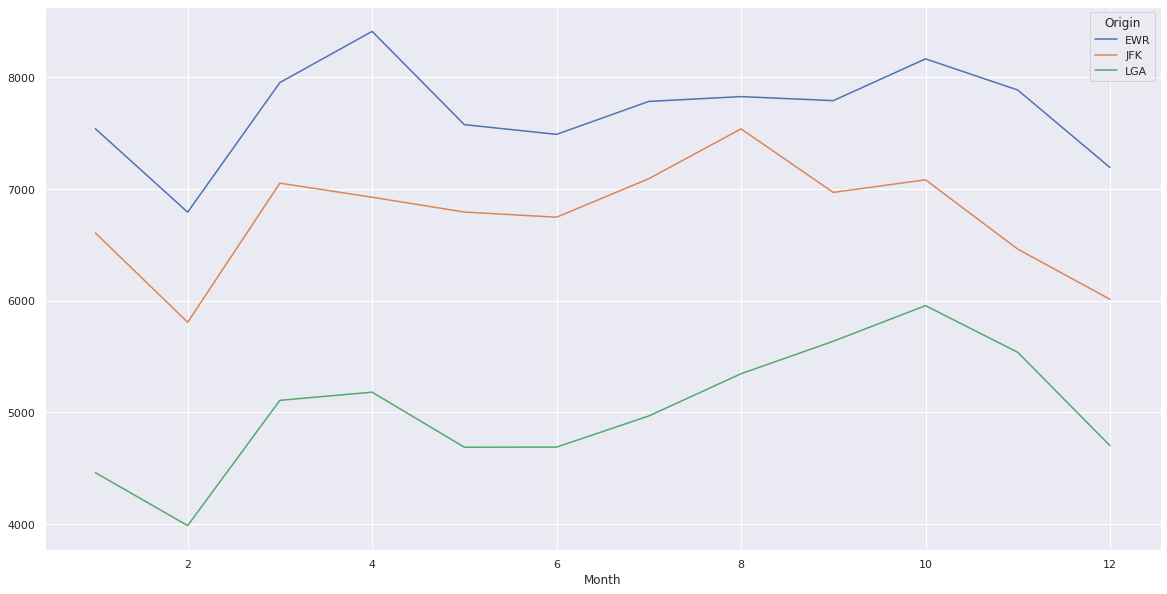

In [68]:
Flights['Flight_Number'].plot(figsize=(20, 10))

This is another counter intuitive result since the number of flights actually reduces during December and it disproves our idea that Departure Delays increase in December due to the holiday season

In [69]:
JointDF = pd.concat([Flights,Monthly_Delay],axis = 1)
JointDF

Flight_Number             Departure_Delay                      
Origin           EWR   JFK   LGA             EWR        JFK        LGA
Month                                                                 
1               7540  6607  4460       13.747878   7.738005   5.080045
2               6793  5807  3986       12.328721   9.435509   5.953337
3               7954  7053  5108       16.368871   8.735006   9.056774
4               8412  6927  5181       16.218854  10.962754   9.439104
5               7577  6794  4688       13.549822  10.934059   9.345776
6               7490  6748  4689       21.225234  18.833877  17.743442
7               7785  7093  4968       20.734104  23.194981  17.660024
8               7828  7539  5346       11.528871  12.493567  11.117658
9               7792  6970  5637        5.879492   5.832855   6.662941
10              8166  7083  5956        7.972079   3.862205   5.580759
11              7887  6462  5538        6.363256   4.079542   4.429216
12              7193  6013  4702       19.382316  12.474139  12.040834

In [70]:
JointDF.corr()

Flight_Number                     Departure_Delay  \
Origin                           EWR       JFK       LGA             EWR   
                Origin                                                     
Flight_Number   EWR         1.000000  0.748223  0.790531       -0.208161   
                JFK         0.748223  1.000000  0.635965       -0.088984   
                LGA         0.790531  0.635965  1.000000       -0.537761   
Departure_Delay EWR        -0.208161 -0.088984 -0.537761        1.000000   
                JFK        -0.182703  0.132670 -0.385997        0.840639   
                LGA        -0.064126  0.230860 -0.193652        0.820975   

                                            
Origin                       JFK       LGA  
                Origin                      
Flight_Number   EWR    -0.182703 -0.064126  
                JFK     0.132670  0.230860  
                LGA    -0.385997 -0.193652  
Departure_Delay EWR     0.840639  0.820975  
                JFK     1.000000  0.948579  
                LGA     0.948579  1.000000

As we can see from this table The correlation values for the number of flights per month and the mean monthly departure delays at each of our three origin airports are quite bad (0.13, 0.40, -0.05)

From this we can safely say that the increase in departure delays during the holidays is not related to the holiday season demand since there is not strong correlation

## Checking whether Departure Delays change based on Days

In [71]:
Daily_Delay = DF.copy()
Daily_Delay = Daily_Delay[['Month','Day','Origin','Departure_Delay']]

In [72]:
Daily_Delay = Daily_Delay.groupby(by=['Month','Day','Origin']).mean().unstack()
Daily_Delay

Departure_Delay                      
Origin                EWR        JFK        LGA
Month Day                                      
1     1         16.686099   8.578704   0.978102
      2         25.285714   7.463602   4.154696
      3          8.945205  14.583333  10.071895
      4         13.169935  11.318182   2.403614
      5          4.392523   7.991837   4.601626
...                   ...        ...        ...
12    26        22.368201  12.253012  11.352273
      27        16.742236  10.030075   8.974874
      28         9.231343  11.197628   2.635802
      29        22.814607  14.457831   3.878261
      30        16.562500   8.341709   3.568493

[364 rows x 3 columns]

<AxesSubplot:xlabel='Month,Day'>

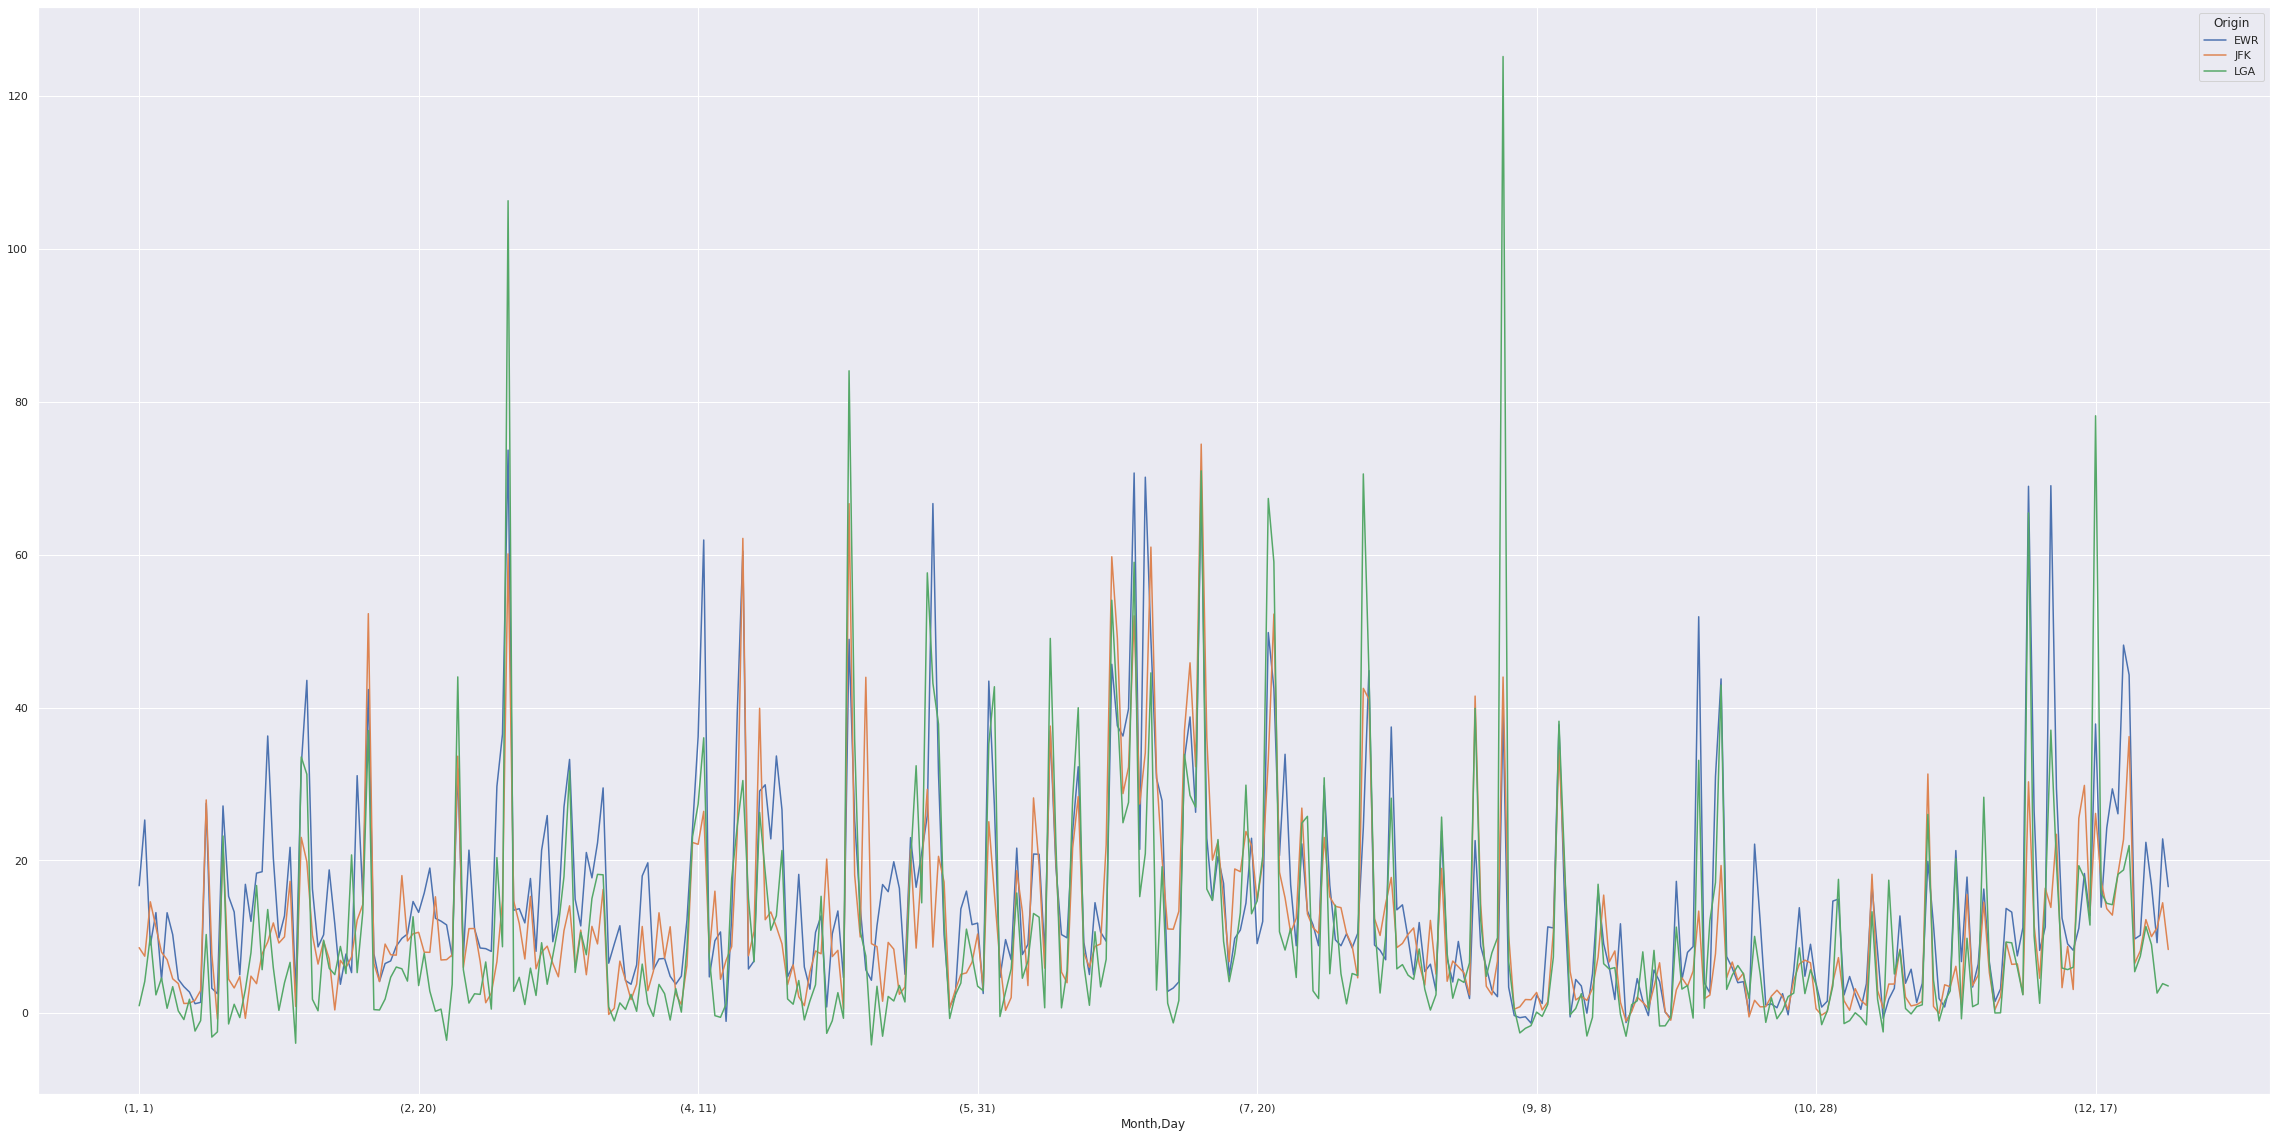

In [73]:
Daily_Delay['Departure_Delay'].plot(figsize=(40, 20))

In [74]:
Daily_Flights = DF.copy()
Daily_Flights = Daily_Flights[['Month','Day','Origin','Flight_Number']]

In [75]:
Daily_Flights = Daily_Flights.groupby(by=['Month','Day','Origin']).count().unstack()
Daily_Flights

Flight_Number          
Origin              EWR  JFK  LGA
Month Day                        
1     1             223  216  137
      2             308  261  181
      3             292  264  153
      4             306  264  166
      5             214  245  123
...                 ...  ...  ...
12    26            239  249  176
      27            322  266  199
      28            268  253  162
      29            178  166  115
      30            272  199  146

[364 rows x 3 columns]

<AxesSubplot:xlabel='Month,Day'>

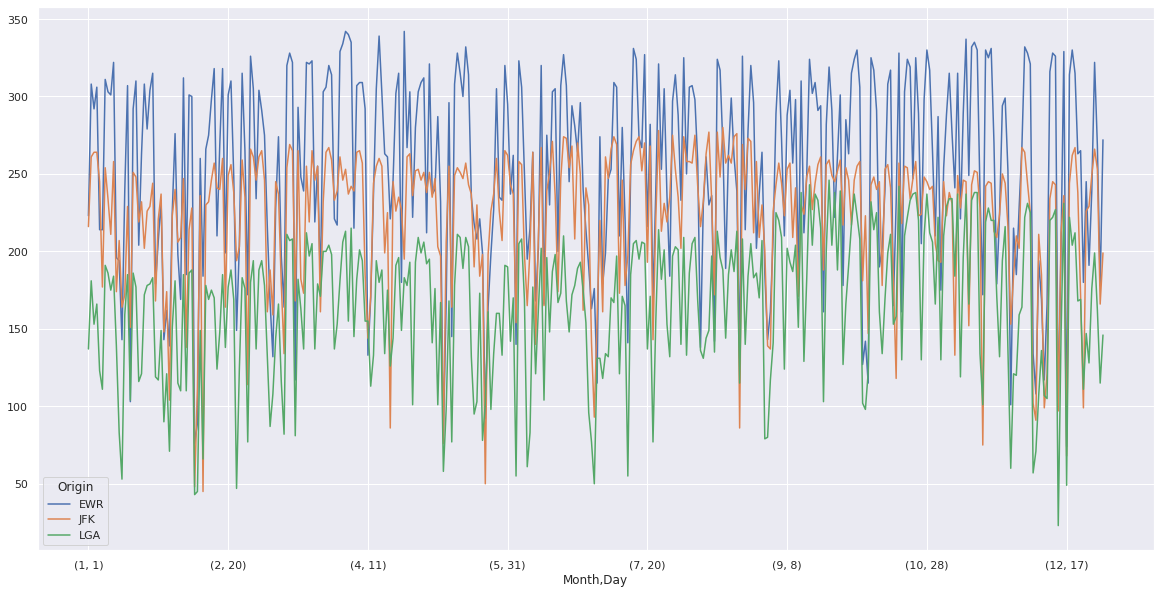

In [76]:
Daily_Flights['Flight_Number'].plot(figsize=(20, 10))

In [77]:
JointDF = pd.concat([Daily_Flights,Daily_Delay],axis = 1)
JointDF

Flight_Number           Departure_Delay                      
Origin              EWR  JFK  LGA             EWR        JFK        LGA
Month Day                                                              
1     1             223  216  137       16.686099   8.578704   0.978102
      2             308  261  181       25.285714   7.463602   4.154696
      3             292  264  153        8.945205  14.583333  10.071895
      4             306  264  166       13.169935  11.318182   2.403614
      5             214  245  123        4.392523   7.991837   4.601626
...                 ...  ...  ...             ...        ...        ...
12    26            239  249  176       22.368201  12.253012  11.352273
      27            322  266  199       16.742236  10.030075   8.974874
      28            268  253  162        9.231343  11.197628   2.635802
      29            178  166  115       22.814607  14.457831   3.878261
      30            272  199  146       16.562500   8.341709   3.568493

[364 rows x 6 columns]

In [78]:
JointDF.corr()

Flight_Number                     Departure_Delay  \
Origin                           EWR       JFK       LGA             EWR   
                Origin                                                     
Flight_Number   EWR         1.000000  0.758917  0.853518       -0.381723   
                JFK         0.758917  1.000000  0.700294       -0.479514   
                LGA         0.853518  0.700294  1.000000       -0.356967   
Departure_Delay EWR        -0.381723 -0.479514 -0.356967        1.000000   
                JFK        -0.375387 -0.408089 -0.393351        0.747980   
                LGA        -0.425903 -0.456117 -0.371423        0.770415   

                                            
Origin                       JFK       LGA  
                Origin                      
Flight_Number   EWR    -0.375387 -0.425903  
                JFK    -0.408089 -0.456117  
                LGA    -0.393351 -0.371423  
Departure_Delay EWR     0.747980  0.770415  
                JFK     1.000000  0.783773  
                LGA     0.783773  1.000000

As we can see from this table The correlation values for the number of flights per day and the mean daily departure delays turned out to be negative. This certainly does not mean that when there is more planes there will be more delays. We will have to figure out a better way to check this relationship.

## Checking whether Weather Patterns Affect Departure Delays

In [79]:
Weather = DF.copy()
Weather.head()

Time_Hour_TS                 Airline  Flight_Number Tail_Number  \
0  2013-01-01 05:00:00   United Air Lines Inc.           1545      N14228   
1  2013-01-01 05:00:00  American Airlines Inc.           1141      N619AA   
2  2013-01-01 05:00:00         JetBlue Airways            725      N804JB   
3  2013-01-01 05:00:00         JetBlue Airways           1806      N708JB   
4  2013-01-01 05:00:00   United Air Lines Inc.           1714      N24211   

  Departure_Time  Departure_Delay Arrival_Time  Arrival_Delay Origin  \
0       05:17:00              2.0     08:30:00           11.0    EWR   
1       05:42:00              2.0     09:23:00           33.0    JFK   
2       05:44:00             -1.0     10:04:00          -18.0    JFK   
3       05:59:00              0.0     07:02:00           -4.0    JFK   
4       05:33:00              4.0     08:50:00           20.0    LGA   

  Destination  ...  Wind_Speed  Precipitation Pressure Visibility  Year Month  \
0         IAH  ...    12.65858            0.0   1011.9       10.0  2013     1   
1         MIA  ...    14.96014            0.0   1012.1       10.0  2013     1   
2         BQN  ...    14.96014            0.0   1012.1       10.0  2013     1   
3         BOS  ...    14.96014            0.0   1012.1       10.0  2013     1   
4         IAH  ...    14.96014            0.0   1011.4       10.0  2013     1   

   Day Hour          Time_Series  Delay_Level  
0    1    5  2013-01-01 05:00:00            0  
1    1    5  2013-01-01 05:00:00            0  
2    1    5  2013-01-01 05:00:00            0  
3    1    5  2013-01-01 05:00:00            0  
4    1    5  2013-01-01 05:00:00            0  

[5 rows x 32 columns]

### Temperature

In [80]:
Temperature = Weather[['Origin','Temperature','Month','Day']]

We take Origin, Month and Day along with Temperature for grouping purposes and we will do this for all the weather data

In [81]:
Monthly_Temperature = Temperature.groupby(by=['Month','Origin']).mean().unstack()
Monthly_Temperature

Temperature                              Day                      
Origin         EWR        JFK        LGA        EWR        JFK        LGA
Month                                                                    
1        36.085069  35.802422  35.949789  15.202785  15.321326  15.450897
2        35.673956  34.784932  35.205183  14.910054  14.969520  14.738083
3        41.565052  40.932420  40.892944  16.292934  16.192968  16.519773
4        54.768117  51.614673  53.532113  15.191750  15.430201  15.375989
5        65.612131  61.047136  64.927022  15.862611  15.992493  15.723763
6        75.778307  71.891233  75.539693  15.579039  15.619146  15.714438
7        83.161757  80.675979  82.729565  16.733590  16.549556  17.105878
8        76.328150  75.277358  76.182391  15.766096  15.768935  16.031238
9        68.886902  68.240198  68.814231  15.860113  16.035725  16.080717
10       61.053380  60.674740  61.289711  16.277247  16.147960  16.365682
11       45.521567  45.337075  46.278407  14.933562  15.378366  14.472734
12       39.095423  38.927411  39.463990  15.658835  15.816398  15.456614

<AxesSubplot:xlabel='Month'>

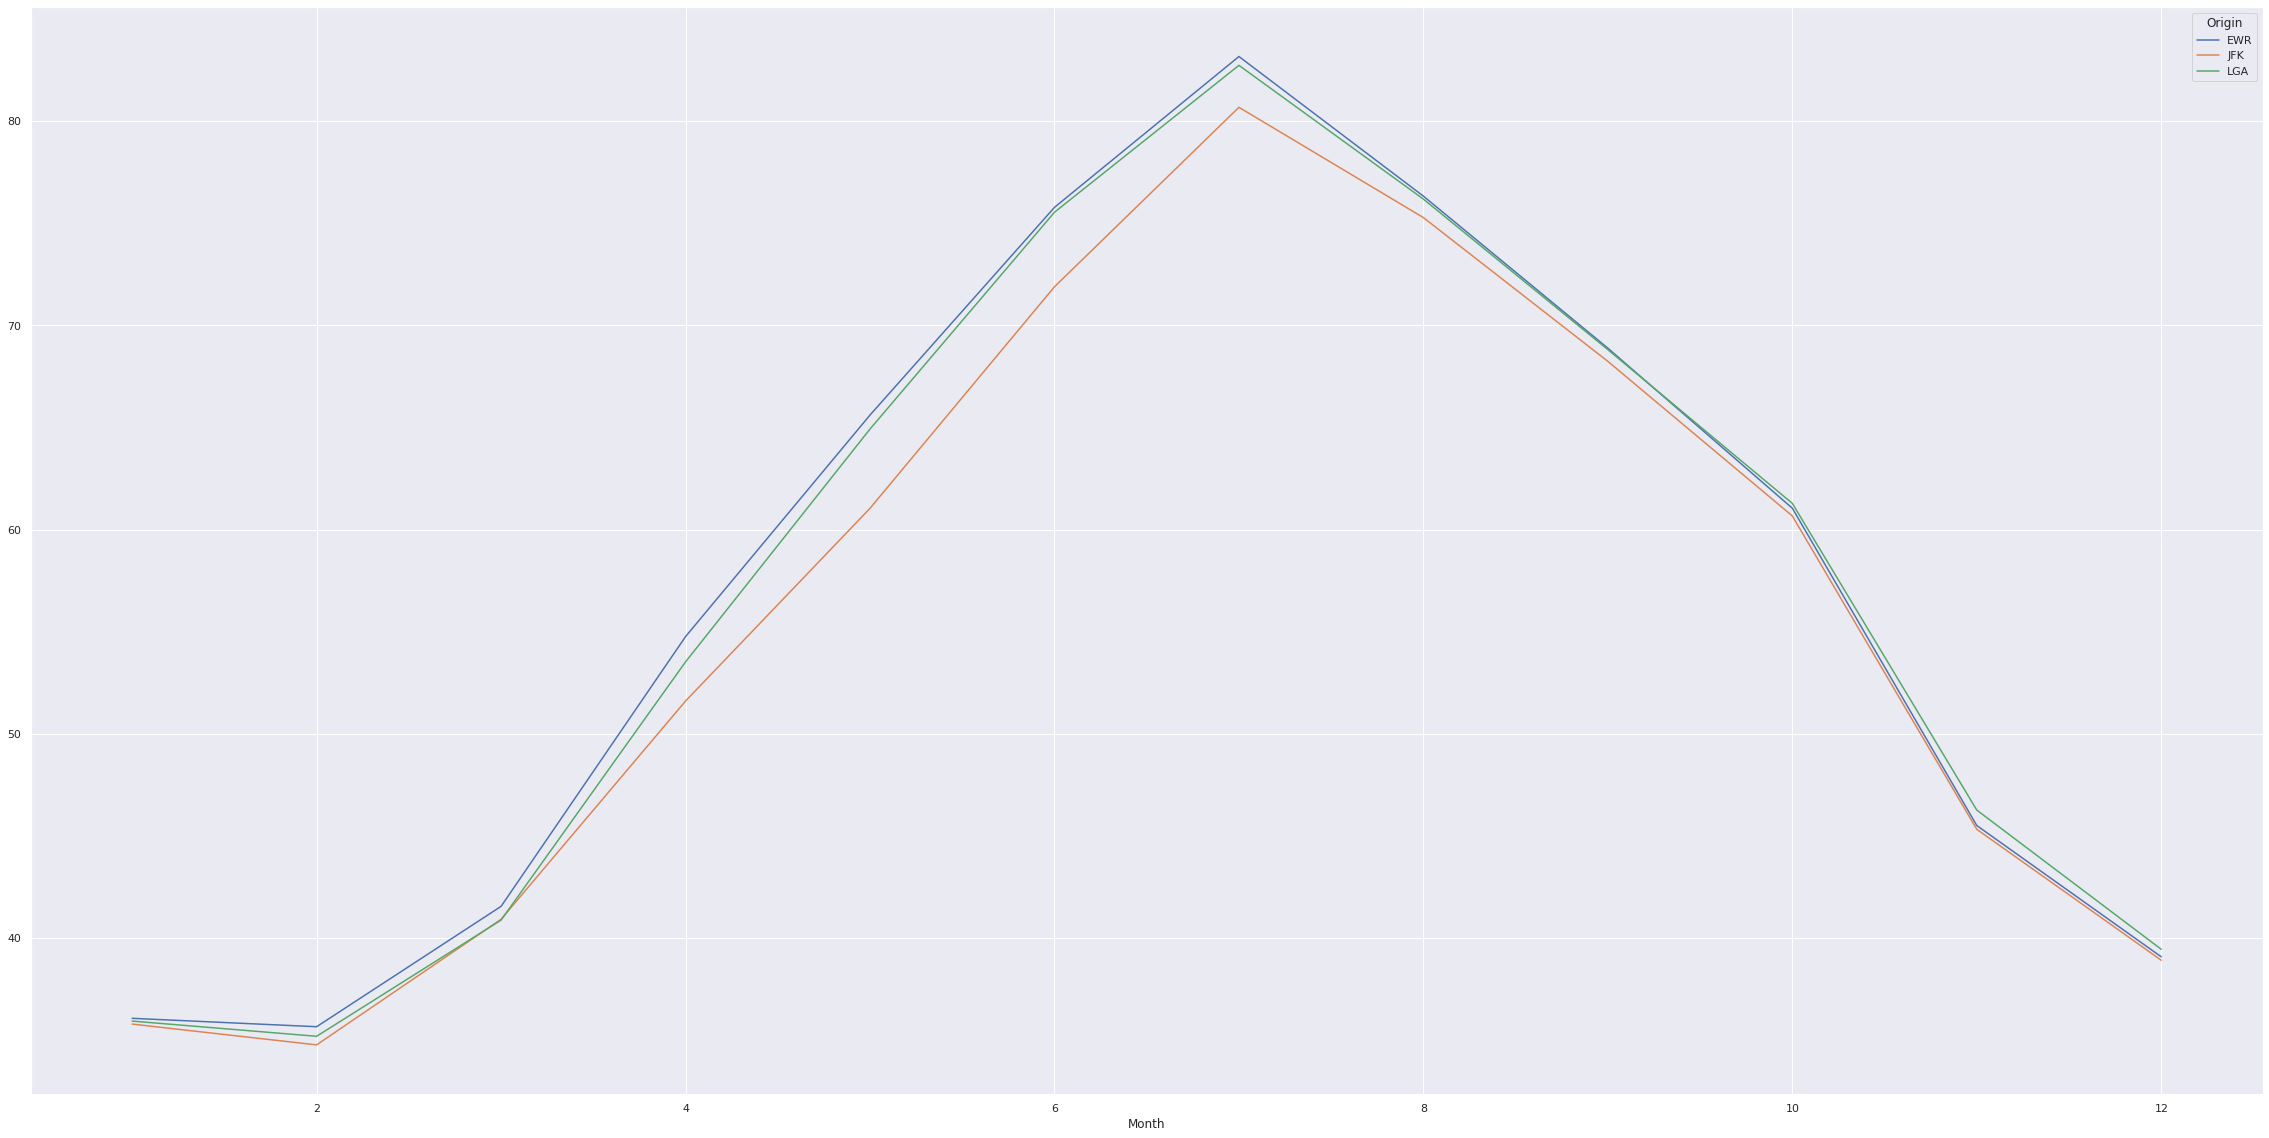

In [82]:
Monthly_Temperature['Temperature'].plot(figsize=(40, 20))

Seeing the mean monthly Temperature there might be a correlation with the mean Departure Delays and we could use this in our model. It has a similar peak in June-July like the mean montly Departure Delay 

In [83]:
Daily_Temperature = Temperature.groupby(by=['Month','Day','Origin']).mean().unstack()
Daily_Temperature

Temperature                      
Origin            EWR        JFK        LGA
Month Day                                  
1     1     37.046457  36.715000  38.211971
      2     29.669351  29.684828  29.453149
      3     30.365205  30.470682  29.671765
      4     36.065294  35.769773  36.373133
      5     38.589346  37.636571  39.308293
...               ...        ...        ...
12    26    33.578577  34.926988  34.507727
      27    36.307702  37.705188  37.258894
      28    44.718881  45.322134  46.948889
      29    43.255056  44.416747  43.750087
      30    37.882426  38.809246  38.050959

[364 rows x 3 columns]

<AxesSubplot:xlabel='Month,Day'>

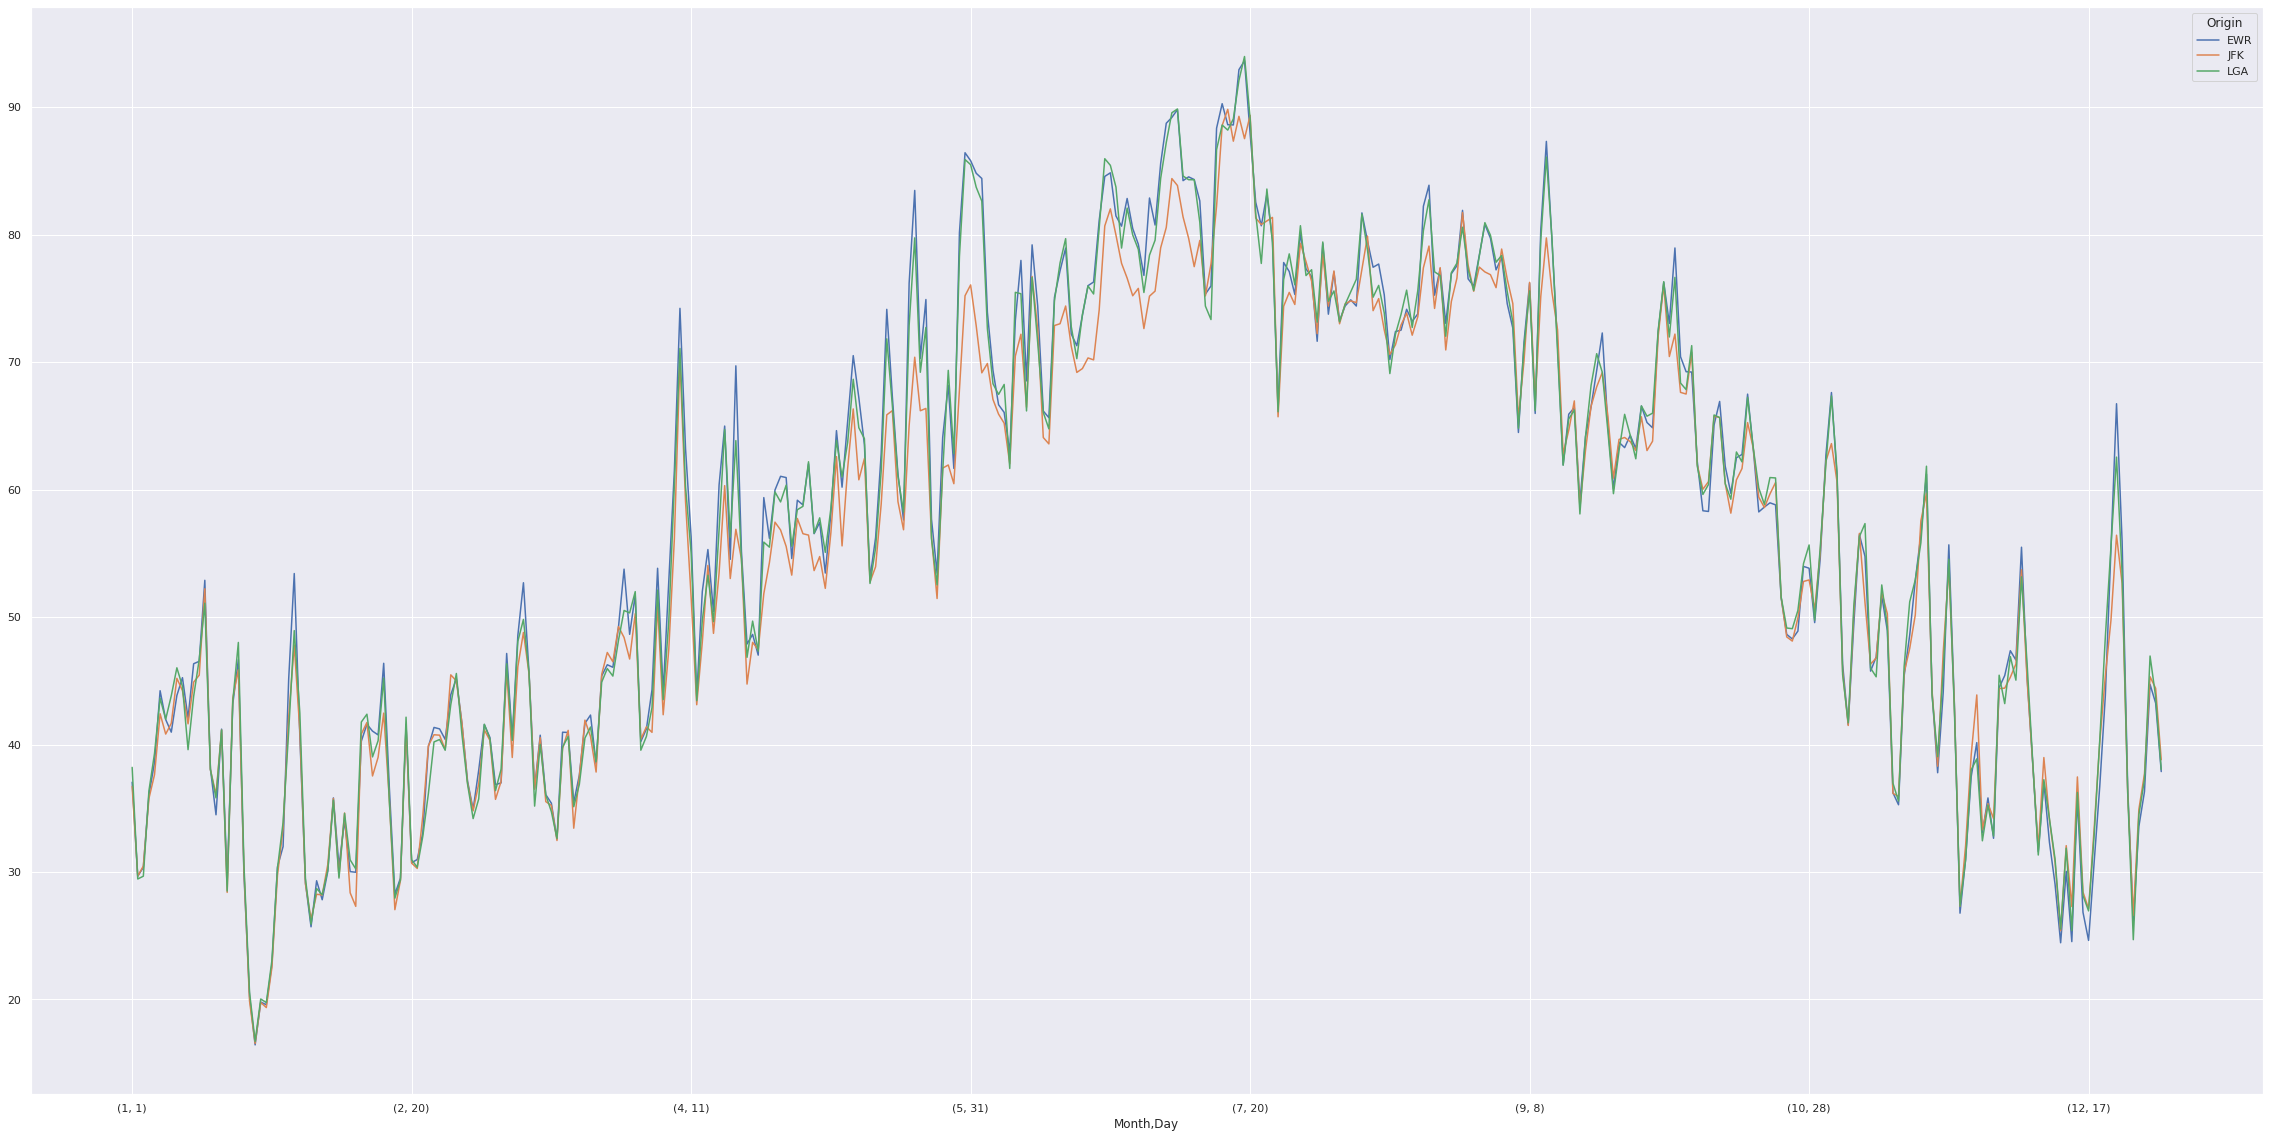

In [84]:
Daily_Temperature['Temperature'].plot(figsize=(40, 20))

It was hard to interpret this graph so we went ahead and used boxplots to see the distribution more clearly and we will do this for the rest of the time-series visualised data too

<AxesSubplot:xlabel='Month', ylabel='Temperature'>

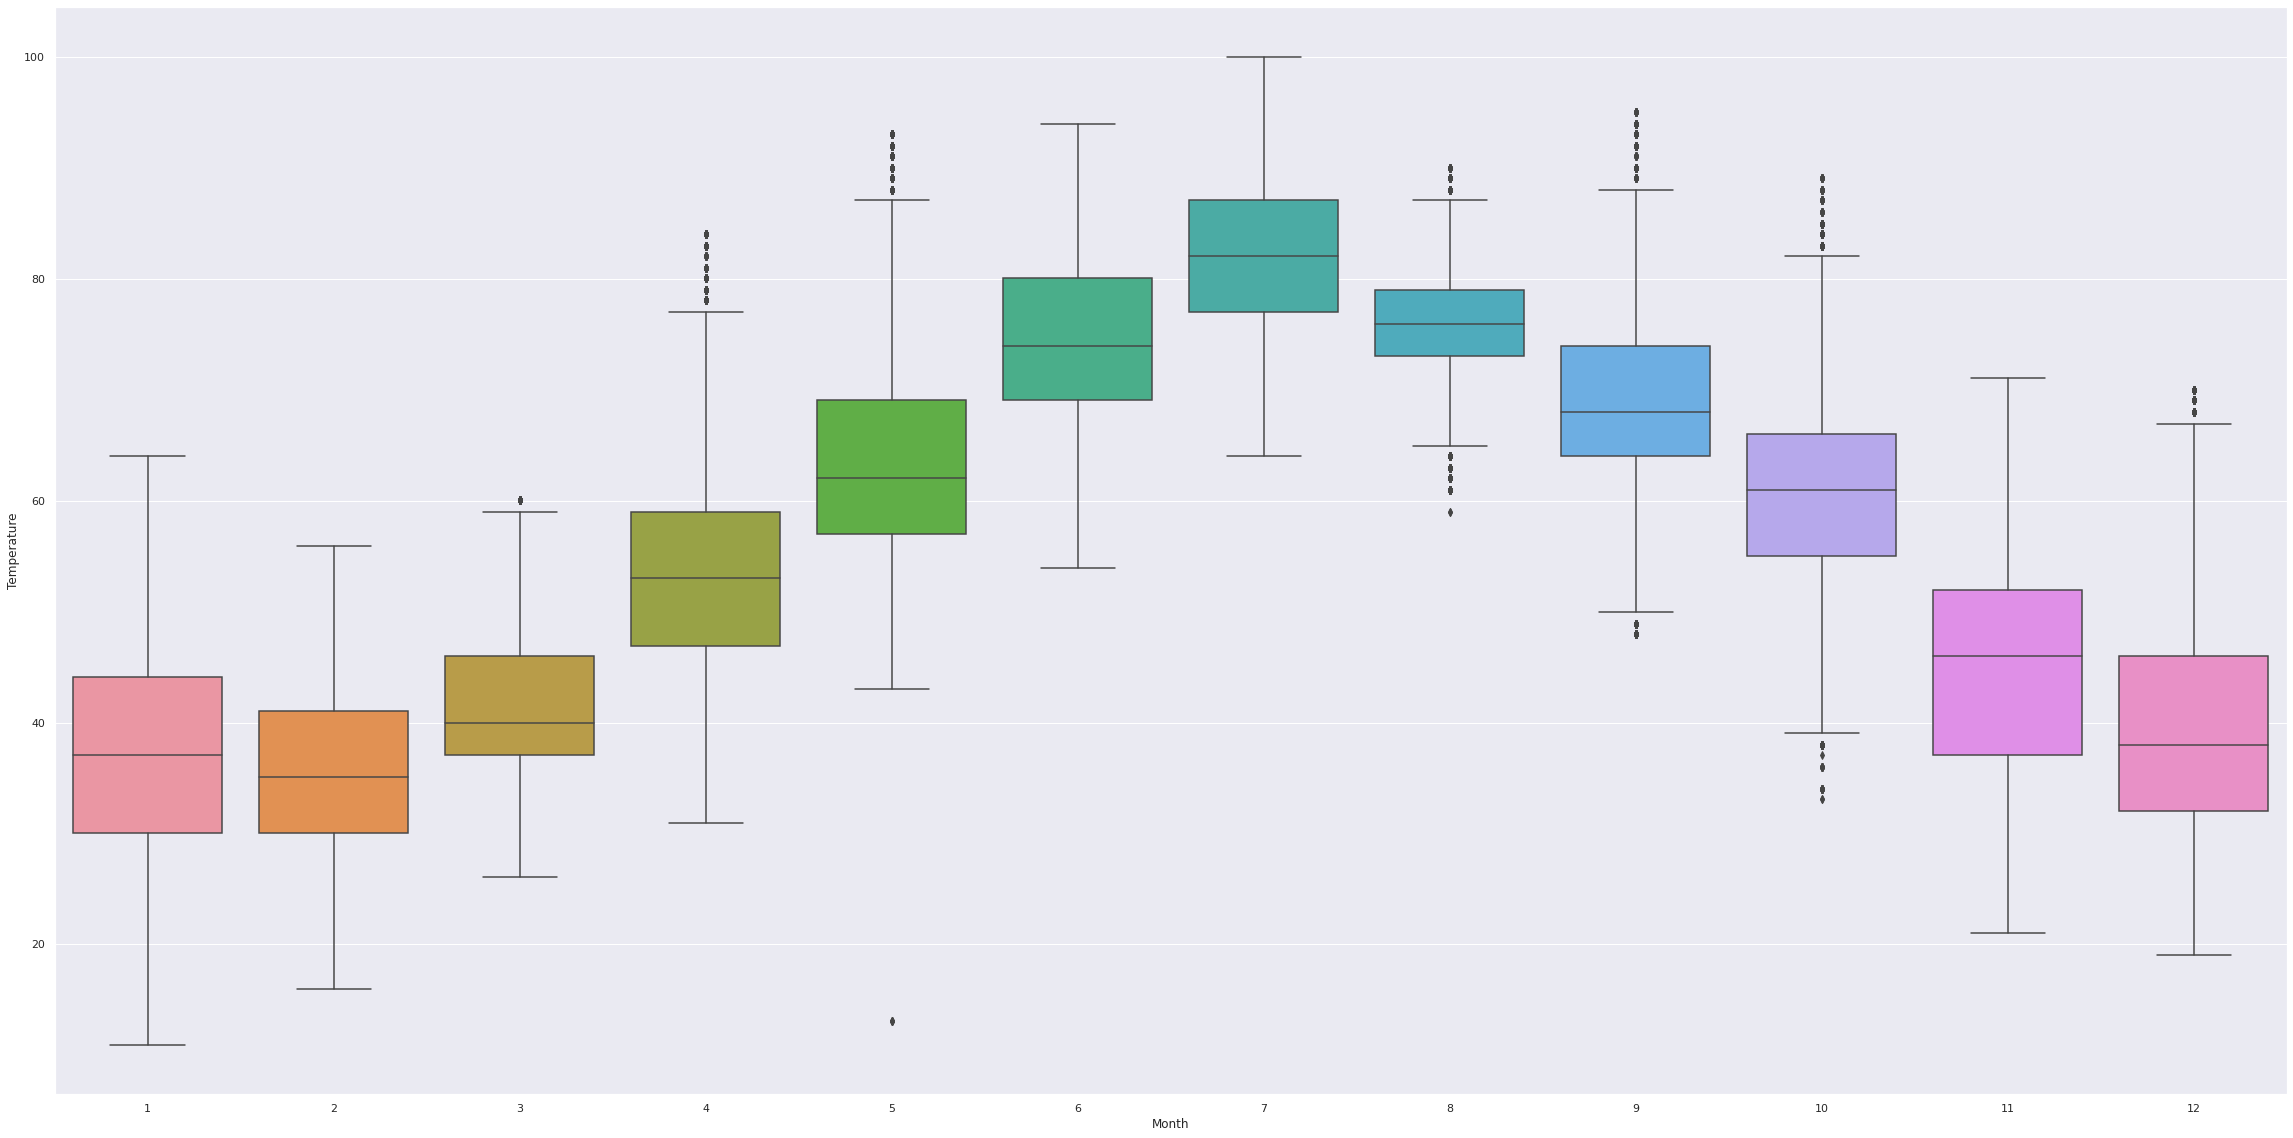

In [85]:
Temperature = Weather[['Origin','Temperature','Month','Day']]
f = plt.figure(figsize = (40,20))
sb.boxplot(data = Temperature, x = 'Month', y = 'Temperature')

### Humidity

In [86]:
Humidity = Weather[['Origin','Humidity','Month','Day']]

In [87]:
Monthly_Humidity = Humidity.groupby(by=['Month','Origin']).mean().unstack()
Monthly_Humidity

Humidity                              Day                      
Origin        EWR        JFK        LGA        EWR        JFK        LGA
Month                                                                   
1       53.899422  55.585503  53.478587  15.202785  15.321326  15.450897
2       56.139115  55.954576  53.912301  14.910054  14.969520  14.738083
3       51.510404  52.055931  50.663892  16.292934  16.192968  16.519773
4       47.749576  53.847413  47.846833  15.191750  15.430201  15.375989
5       55.435197  64.808758  53.040798  15.862611  15.992493  15.723763
6       59.053302  68.030400  54.274137  15.579039  15.619146  15.714438
7       59.024627  66.570000  55.428770  16.733590  16.549556  17.105878
8       58.745737  62.532714  55.443883  15.766096  15.768935  16.031238
9       57.938180  59.754475  54.191249  15.860113  16.035725  16.080717
10      58.414557  61.010054  55.460987  16.277247  16.147960  16.365682
11      50.205263  52.254839  48.622445  14.933562  15.378366  14.472734
12      63.239196  63.060138  57.727873  15.658835  15.816398  15.456614

<AxesSubplot:xlabel='Month'>

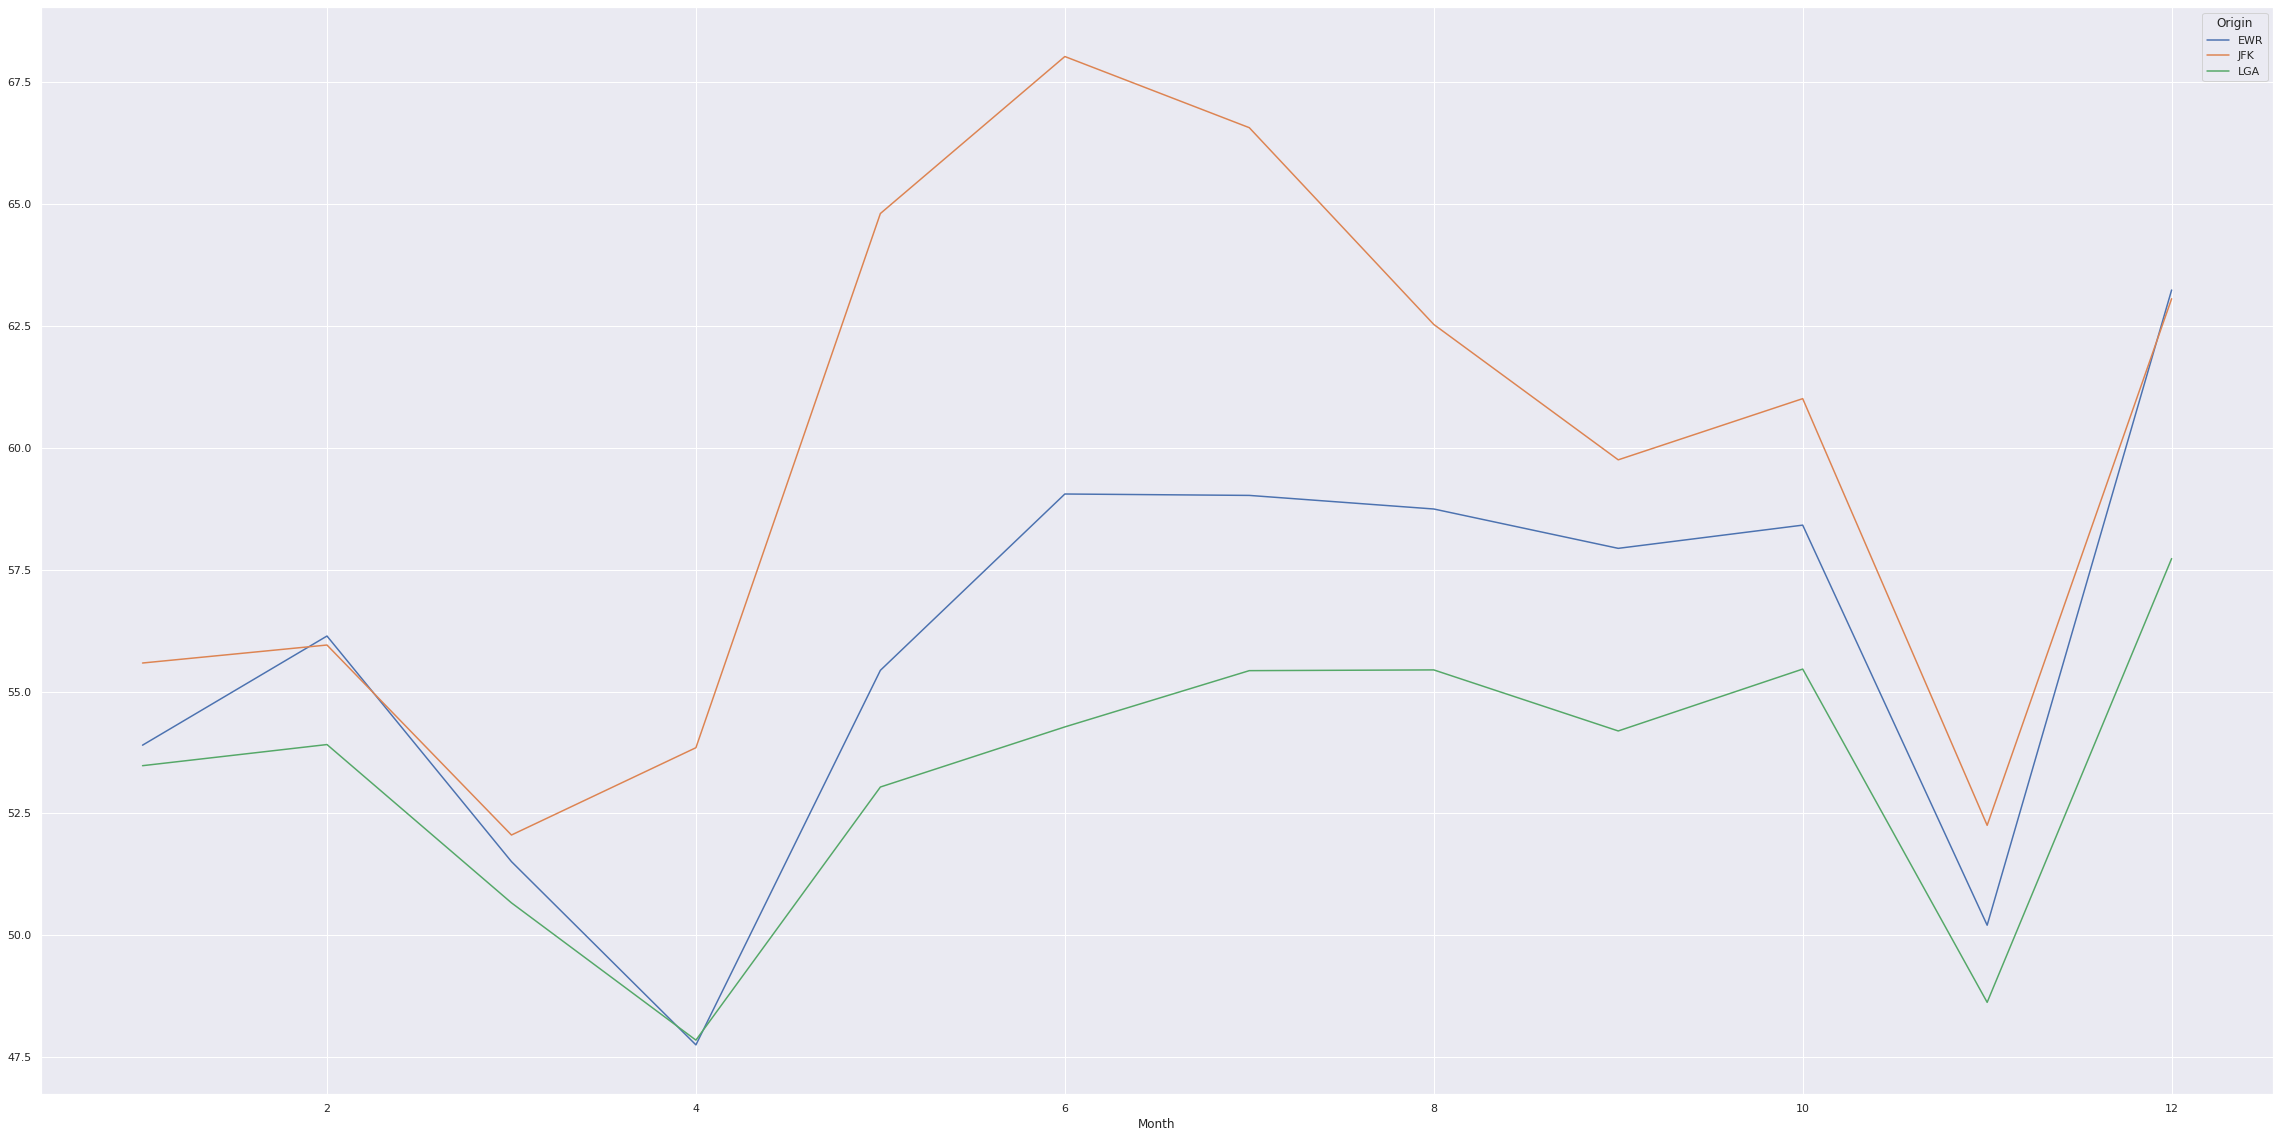

In [88]:
Monthly_Humidity['Humidity'].plot(figsize=(40, 20))

Seeing the mean monthly Humidity there might be a correlation with the mean Departure Delays and we could use this in our model. It has a similar peak in June-July as well as in December like the mean montly Departure Delay along with the dip in the months of February - April too.

In [89]:
Daily_Humidity = Humidity.groupby(by=['Month','Day','Origin']).mean().unstack()
Daily_Humidity

Humidity                      
Origin           EWR        JFK        LGA
Month Day                                 
1     1    54.961839  51.580278  53.399781
      2    46.938734  44.725517  48.468177
      3    52.946644  50.994432  52.508824
      4    52.996144  53.406023  49.536627
      5    47.790981  51.572082  45.503984
...              ...        ...        ...
12    26   64.004770  61.567751  57.464886
      27   49.798230  46.622707  43.915276
      28   48.589701  53.572213  38.875062
      29   74.192360  77.036566  68.043130
      30   64.747757  60.823015  57.756507

[364 rows x 3 columns]

<AxesSubplot:xlabel='Month,Day'>

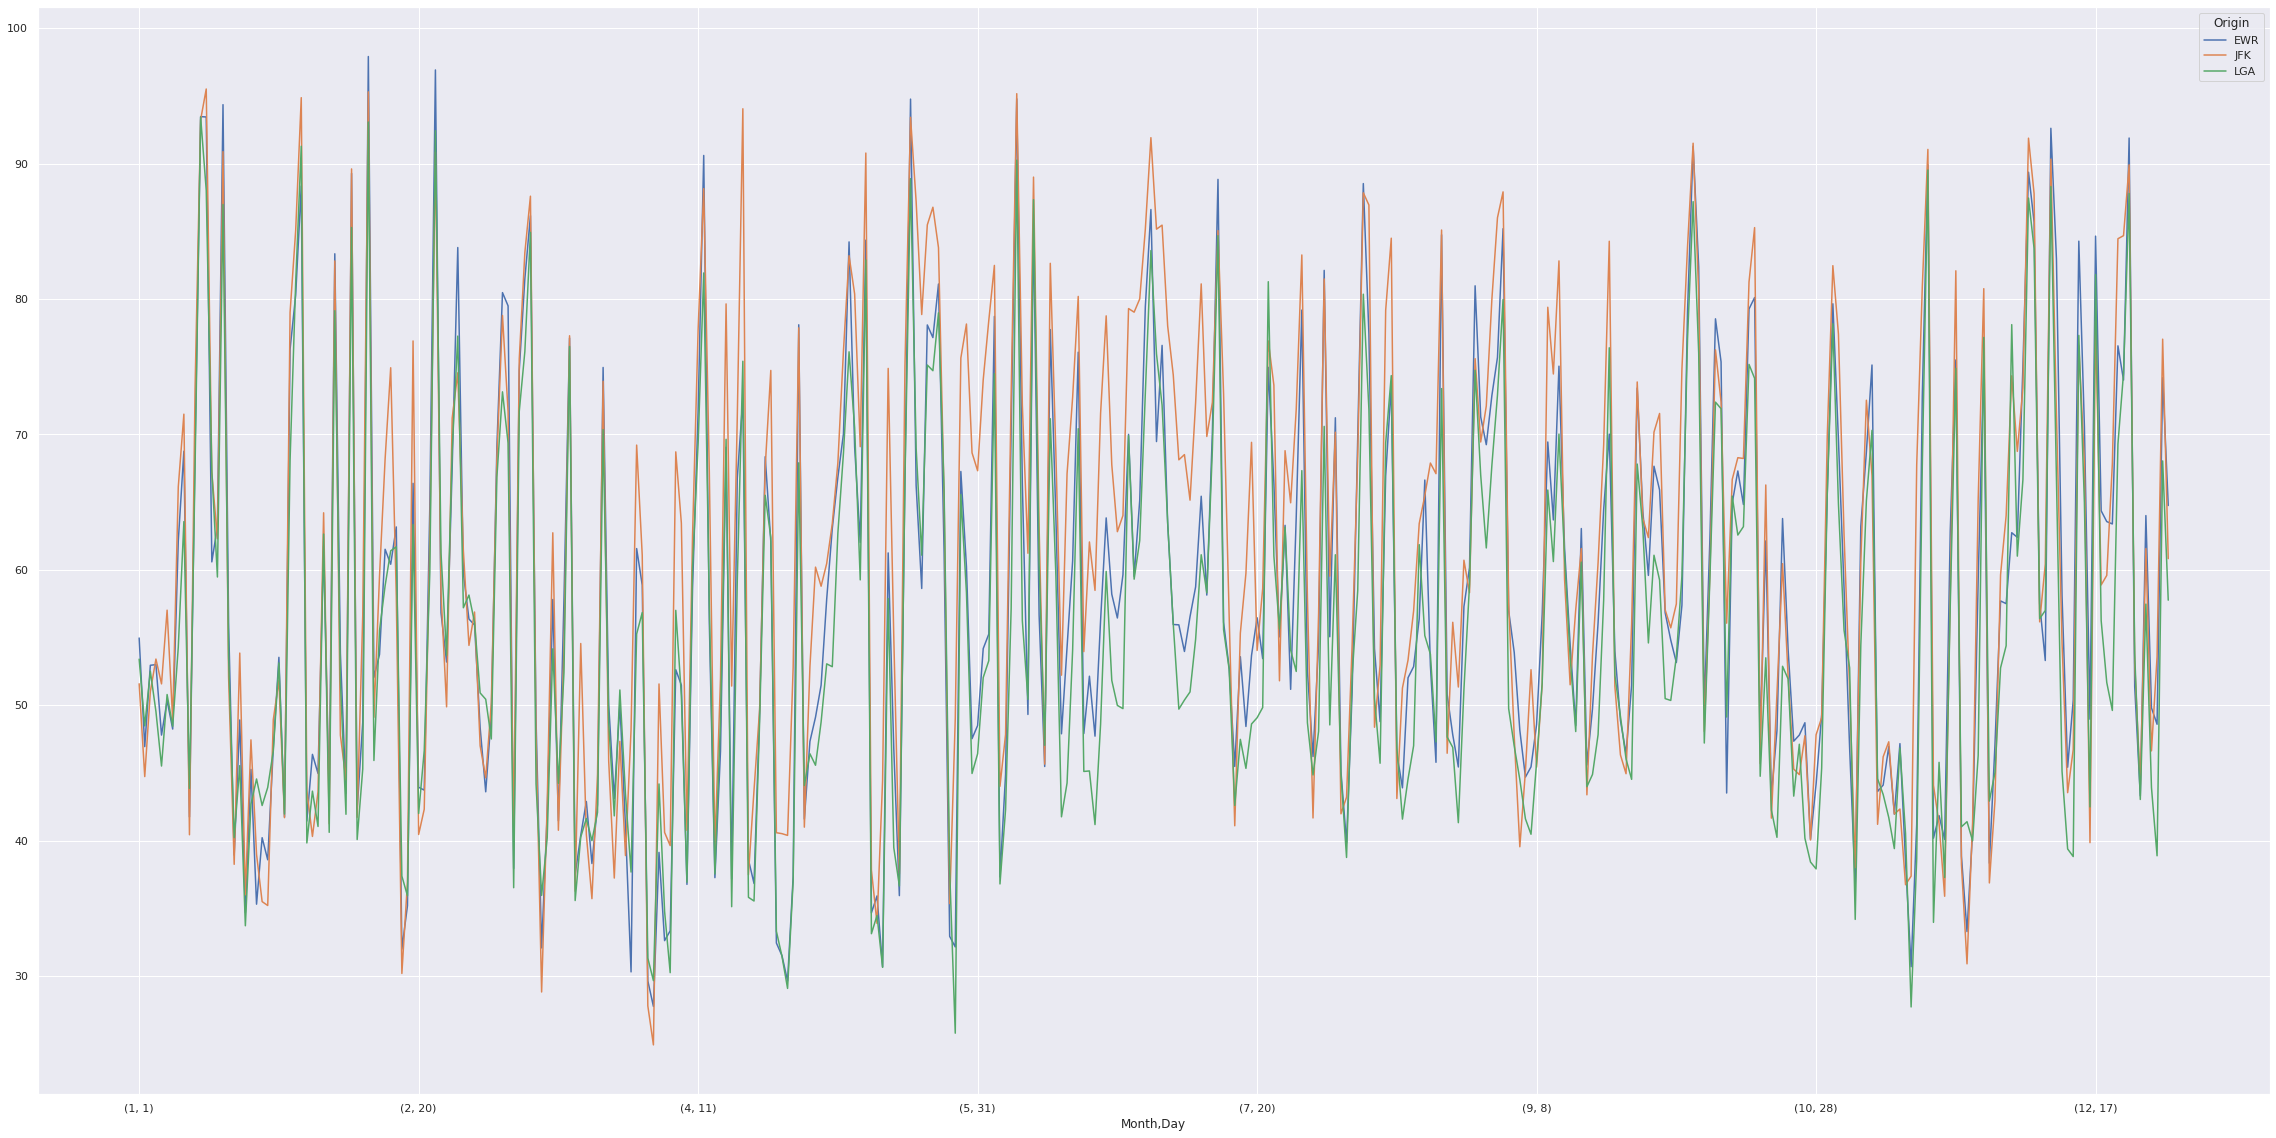

In [90]:
Daily_Humidity['Humidity'].plot(figsize=(40, 20))

<AxesSubplot:xlabel='Month', ylabel='Humidity'>

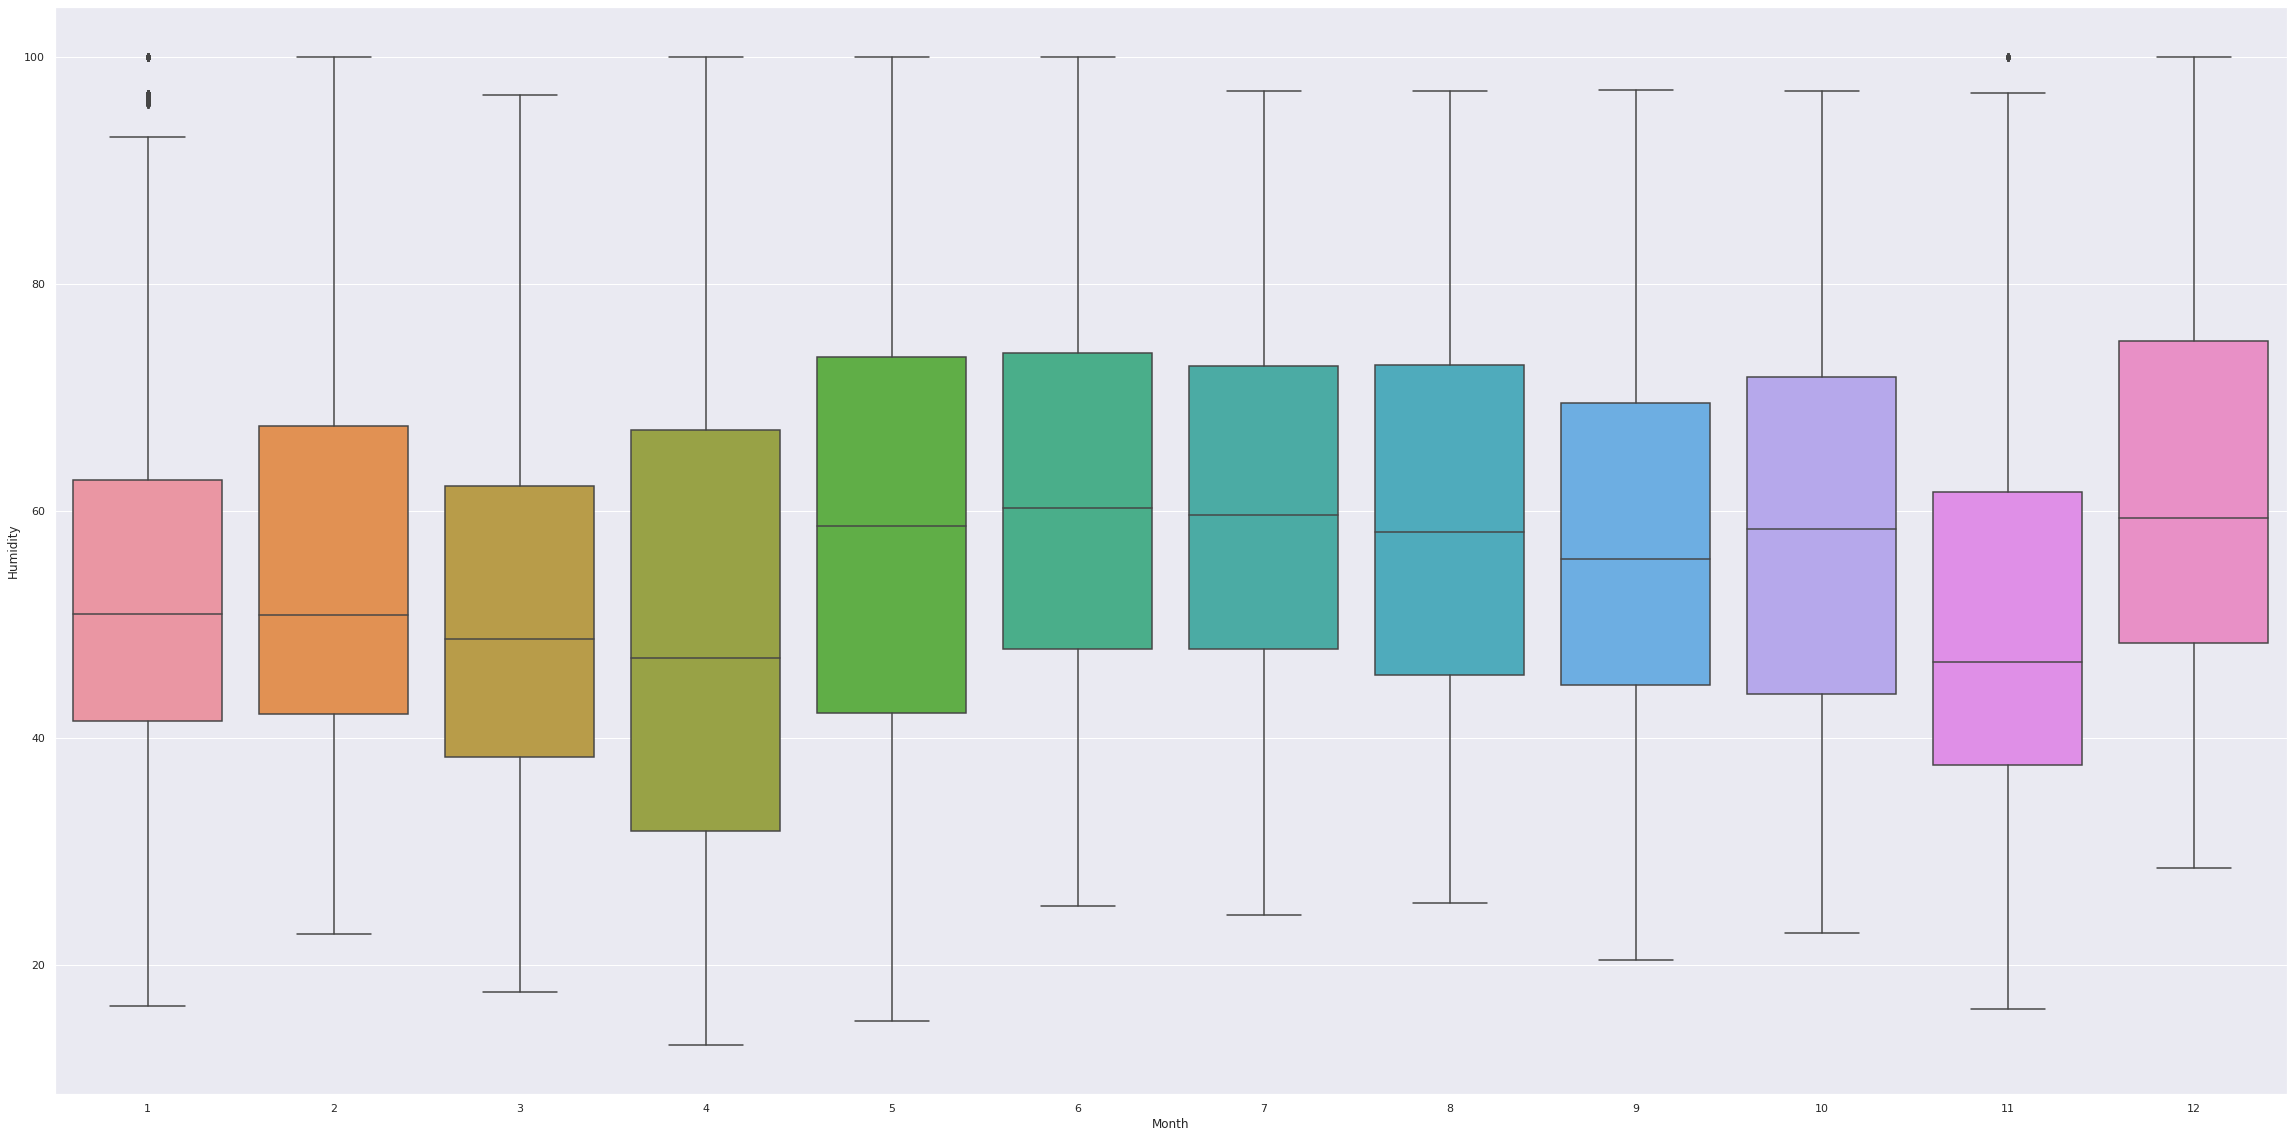

In [91]:
Humidity = Weather[['Origin','Humidity','Month','Day']]
f = plt.figure(figsize = (40,20))
sb.boxplot(data = Humidity, x = 'Month', y = 'Humidity')

### Pressure

In [92]:
Pressure = Weather[['Origin','Pressure','Month','Day']]

In [93]:
Monthly_Pressure = Pressure.groupby(by=['Month','Origin']).median().unstack()
Monthly_Pressure

Pressure                 Day        
Origin      EWR     JFK     LGA EWR JFK LGA
Month                                      
1        1021.1  1021.2  1021.4  15  15  16
2        1014.6  1015.1  1014.7  15  16  15
3        1012.0  1012.2  1011.6  17  16  17
4        1021.6  1022.1  1021.3  15  15  15
5        1018.1  1018.6  1017.7  16  16  15
6        1013.1  1013.5  1013.1  16  16  16
7        1016.8  1017.2  1016.8  17  17  17
8        1016.3  1017.0  1016.3  16  16  16
9        1017.0  1017.3  1016.7  16  16  16
10       1017.7  1018.3  1017.8  17  16  17
11       1023.0  1023.3  1022.7  15  15  14
12       1018.9  1019.9  1018.9  16  16  16

<AxesSubplot:xlabel='Month'>

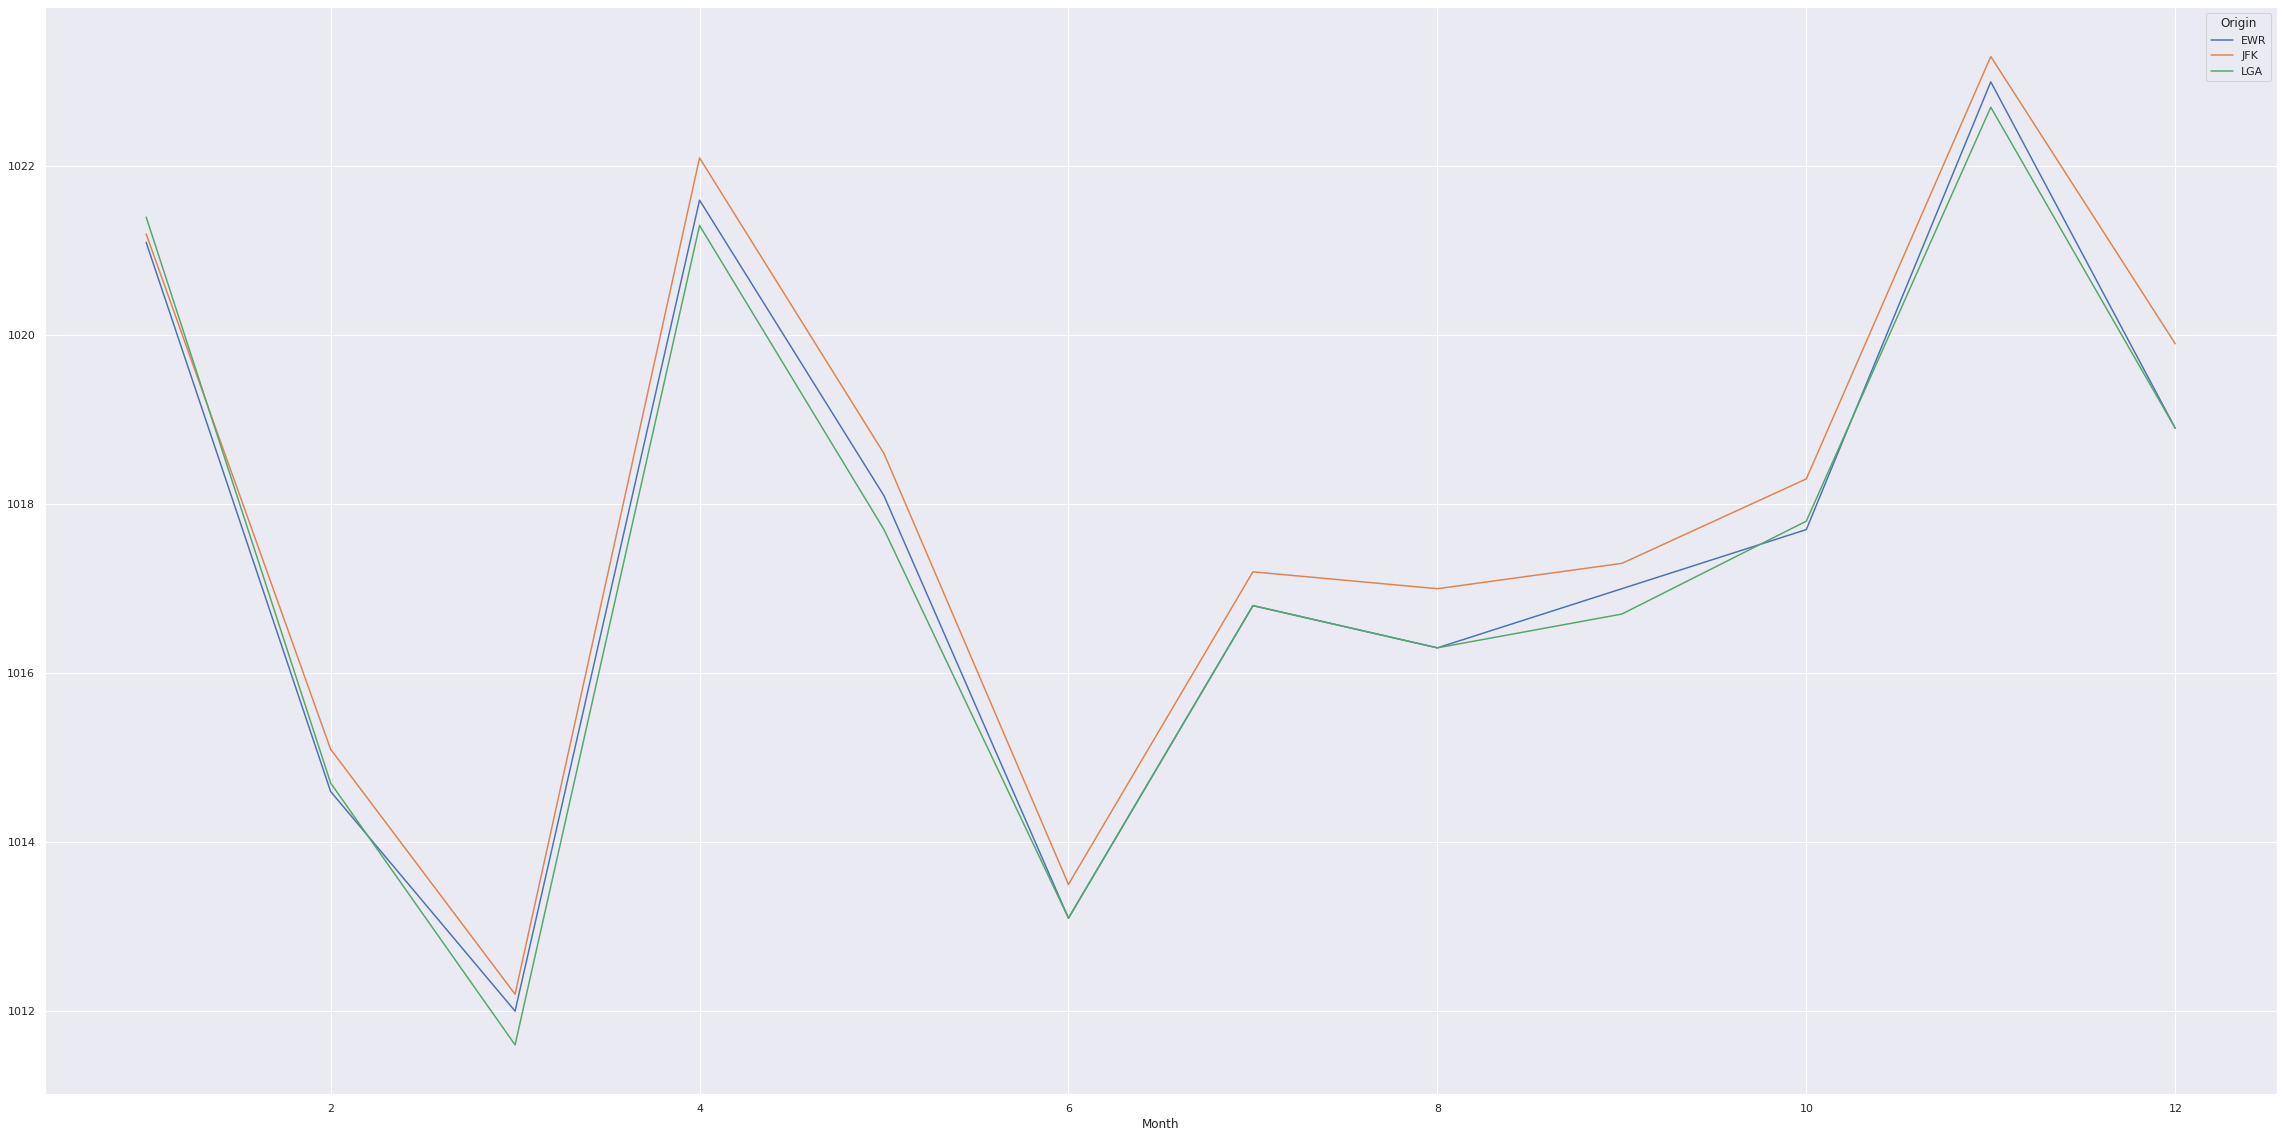

In [94]:
Monthly_Pressure['Pressure'].plot(figsize=(40, 20))

In [95]:
Daily_Pressure = Pressure.groupby(by=['Month','Day','Origin']).median().unstack()
Daily_Pressure

Pressure                
Origin         EWR     JFK     LGA
Month Day                         
1     1     1012.4  1012.8  1011.8
      2     1018.5  1018.8  1017.9
      3     1019.6  1019.9  1019.6
      4     1015.5  1015.7  1015.3
      5     1024.1  1024.4  1023.9
...            ...     ...     ...
12    26    1024.7  1025.3  1023.6
      27    1026.9  1027.2  1026.4
      28    1019.9  1020.5  1020.2
      29    1013.4  1014.0  1012.1
      30    1015.9  1015.5  1016.5

[364 rows x 3 columns]

<AxesSubplot:xlabel='Month,Day'>

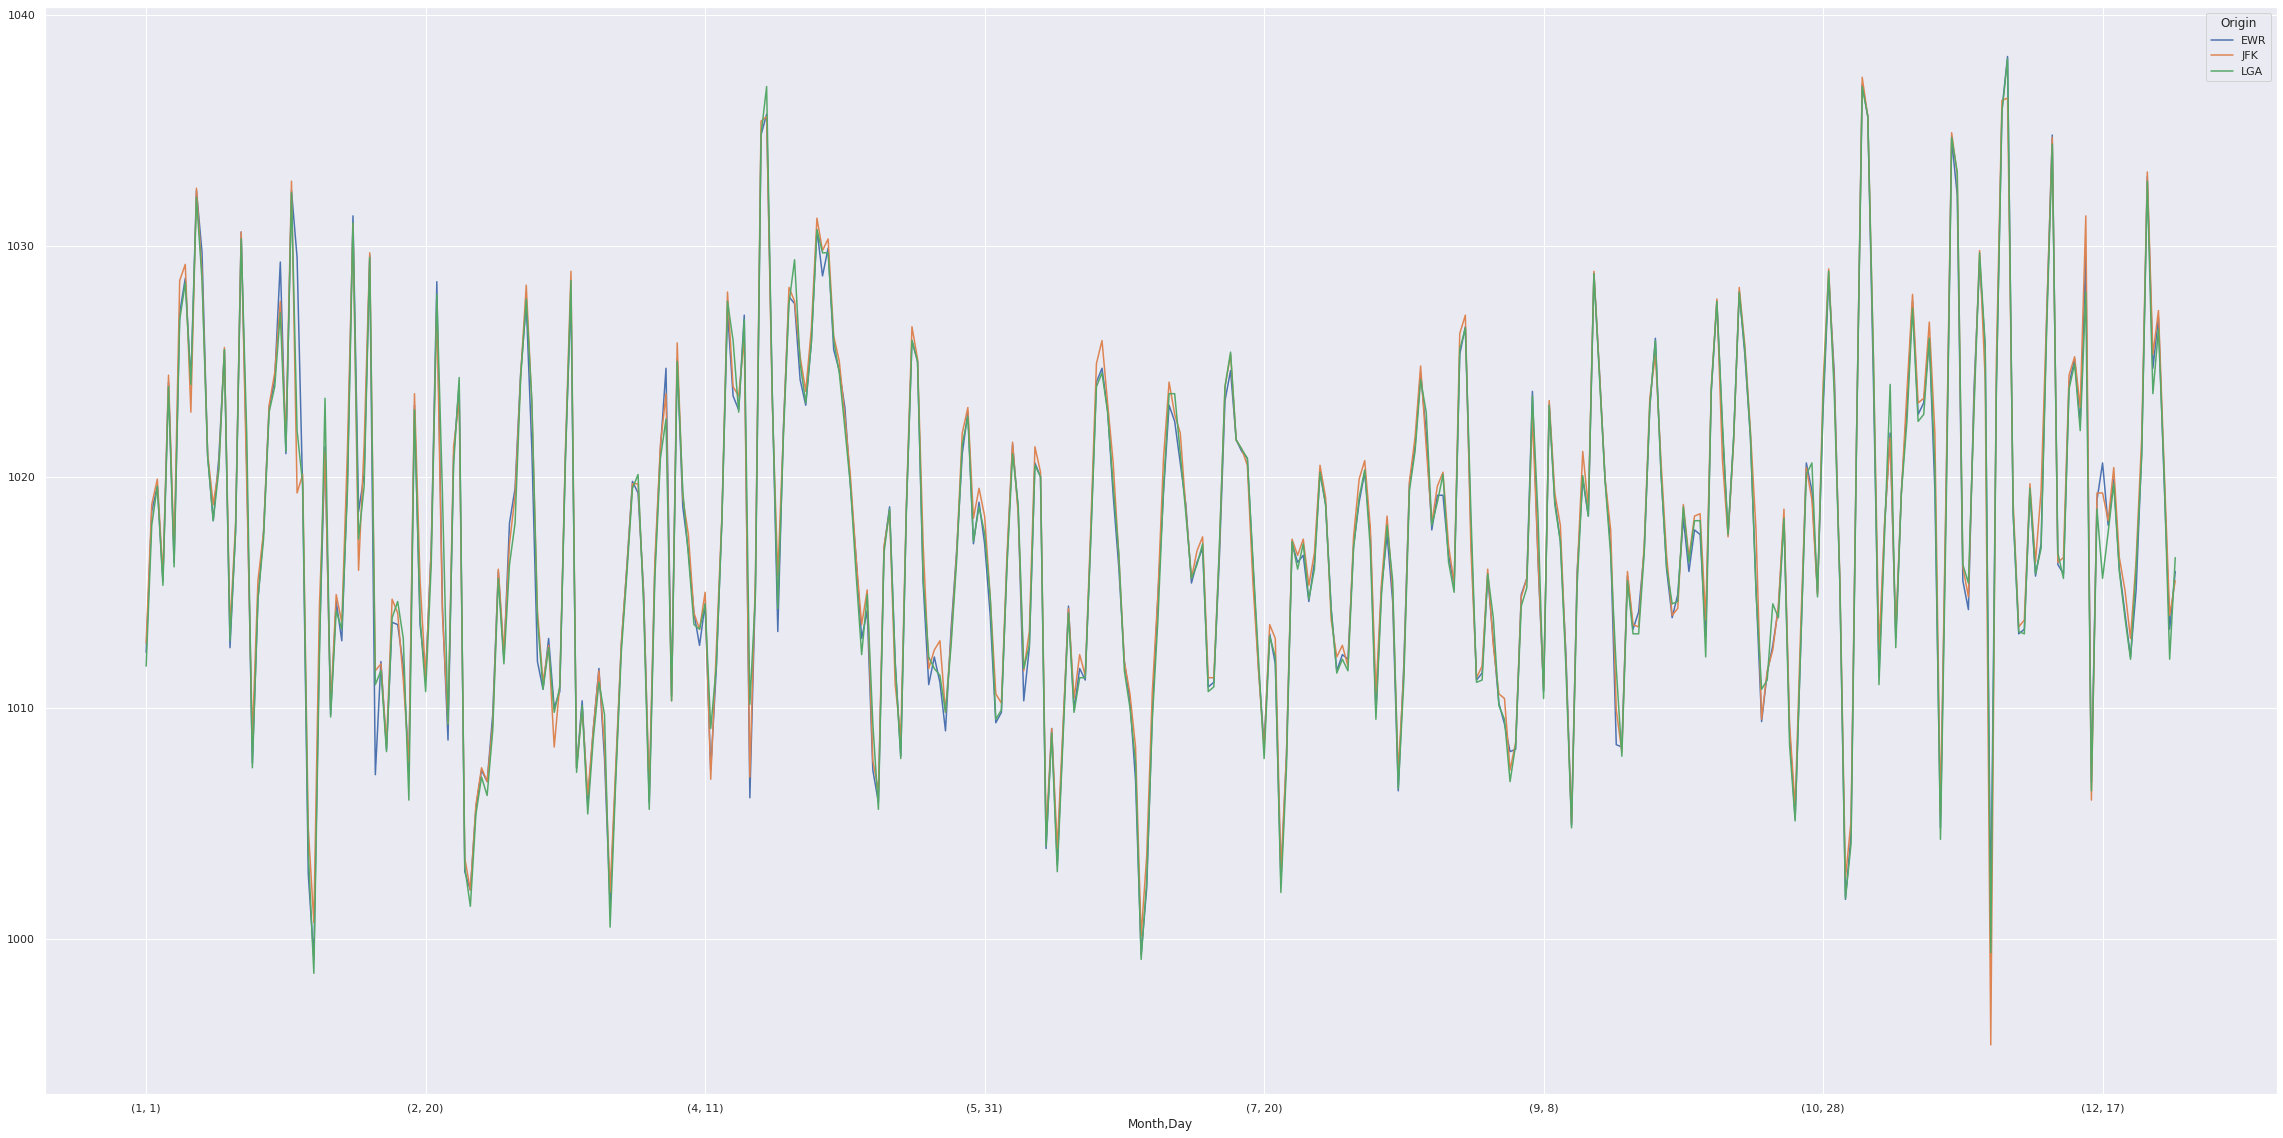

In [96]:
Daily_Pressure['Pressure'].plot(figsize=(40, 20))

<AxesSubplot:xlabel='Month', ylabel='Pressure'>

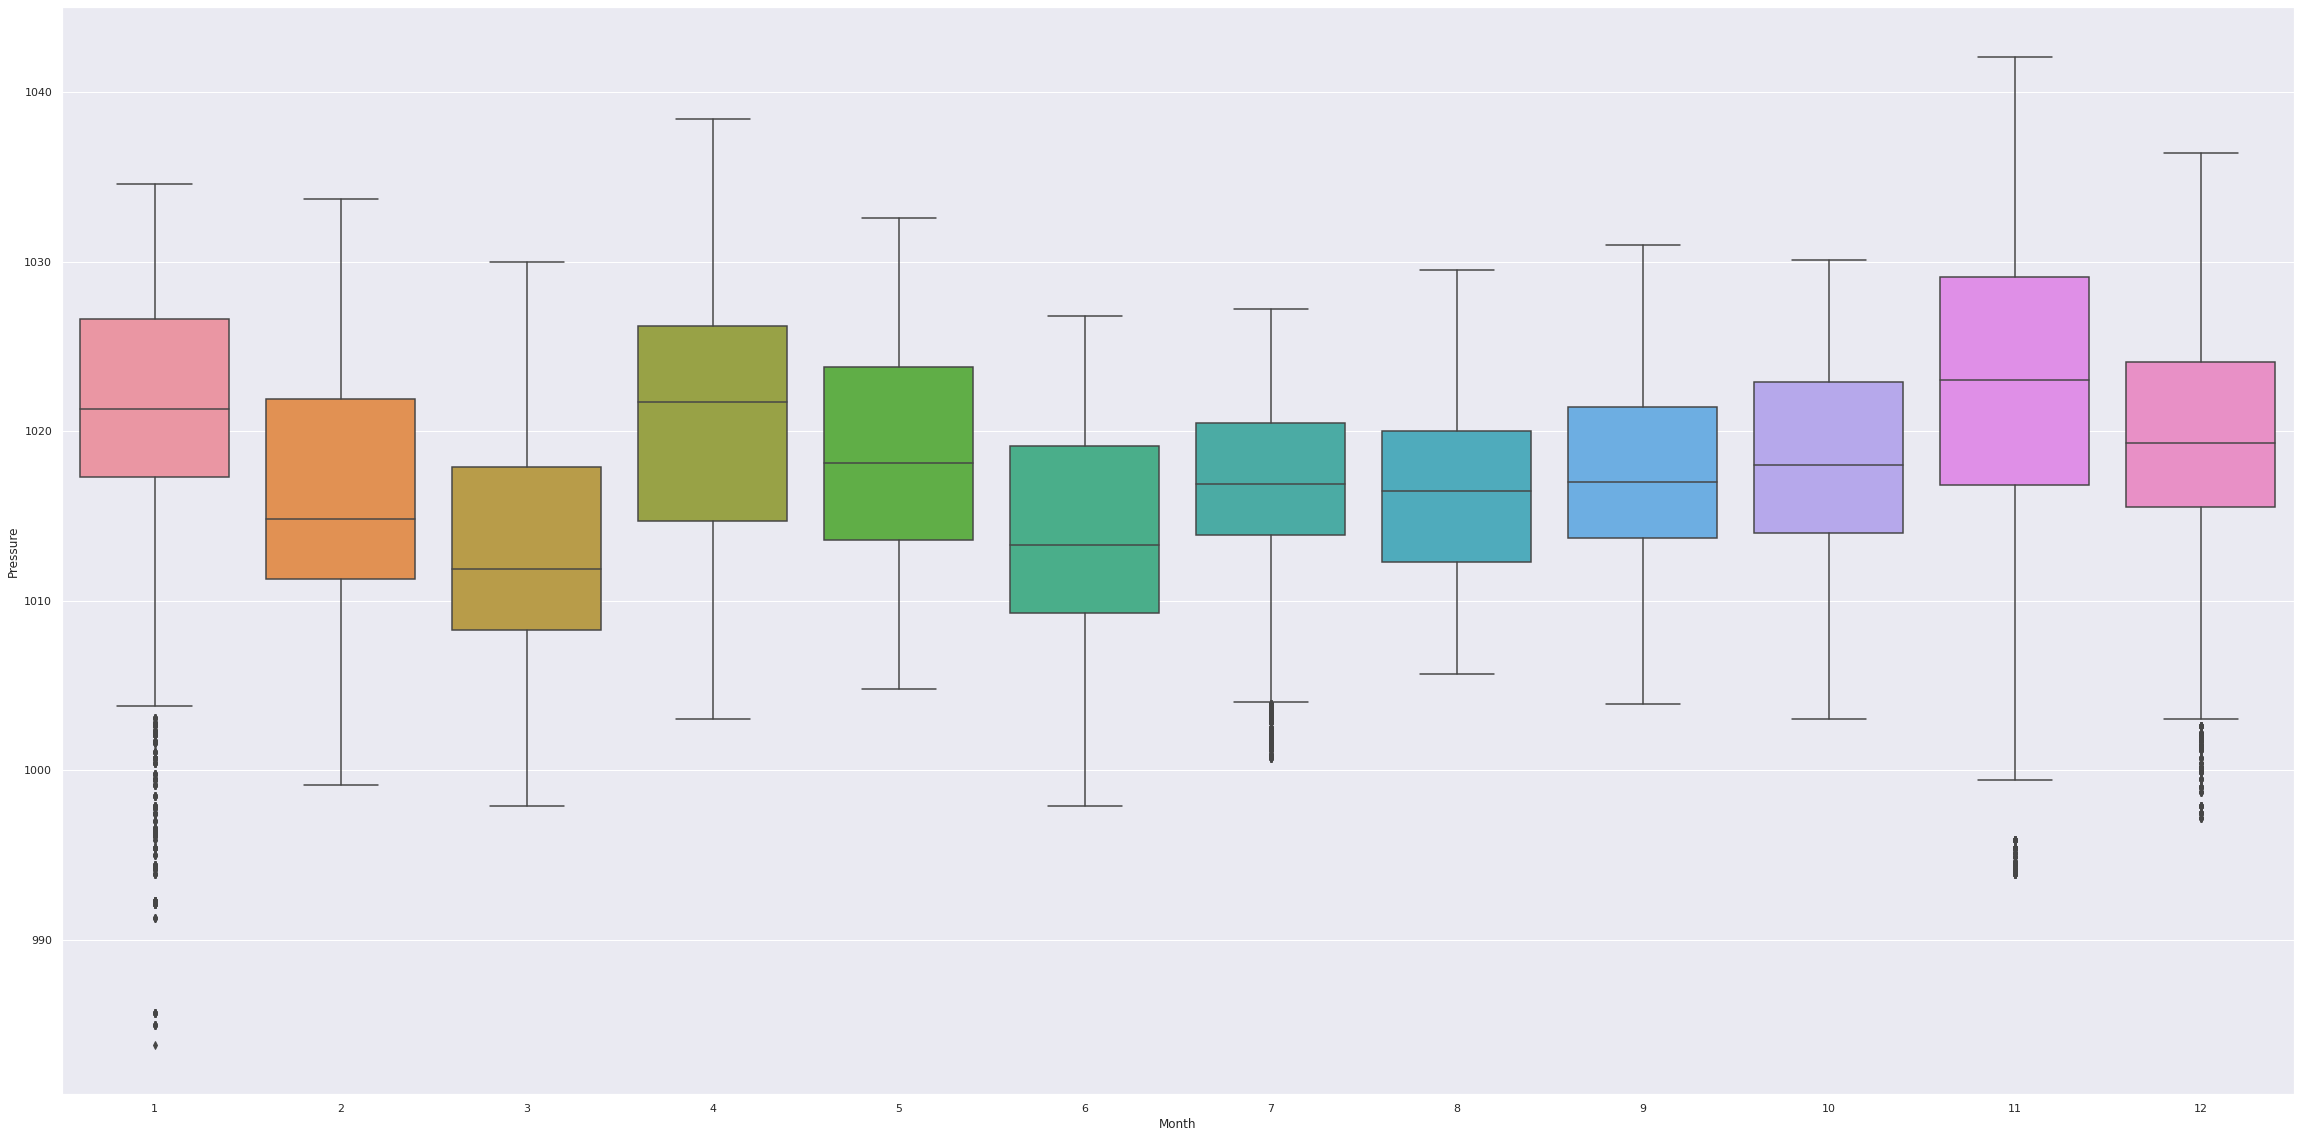

In [97]:
Pressure = Weather[['Origin','Pressure','Month','Day']]
f = plt.figure(figsize = (40,20))
sb.boxplot(data = Pressure, x = 'Month', y = 'Pressure')

### Precipitation

In [98]:
Precipitation = Weather[['Origin','Precipitation','Month','Day']]

In [99]:
Monthly_Precipitation = Precipitation.groupby(by=['Month','Origin']).sum().unstack()
Monthly_Precipitation

Precipitation                   Day               
Origin           EWR    JFK    LGA     EWR     JFK    LGA
Month                                                    
1               7.13   7.76   1.65  114629  101228  68911
2              15.28   8.61   7.18  101284   86928  58746
3              14.10   9.23   7.67  129594  114209  84383
4               6.50   2.79   2.31  127793  106885  79663
5              14.20  10.13   6.03  120191  108653  73713
6              33.66  36.76  14.76  116687  105398  73685
7               0.99   4.33   1.21  130271  117386  84982
8               8.71  12.77   6.92  123417  118882  85703
9               1.03   1.68   1.02  123582  111769  90647
10              0.85   0.12   0.76  132920  114376  97474
11              4.63   8.47   3.70  117781   99375  80150
12             25.60  20.79  16.60  112634   95104  72677

<AxesSubplot:xlabel='Month'>

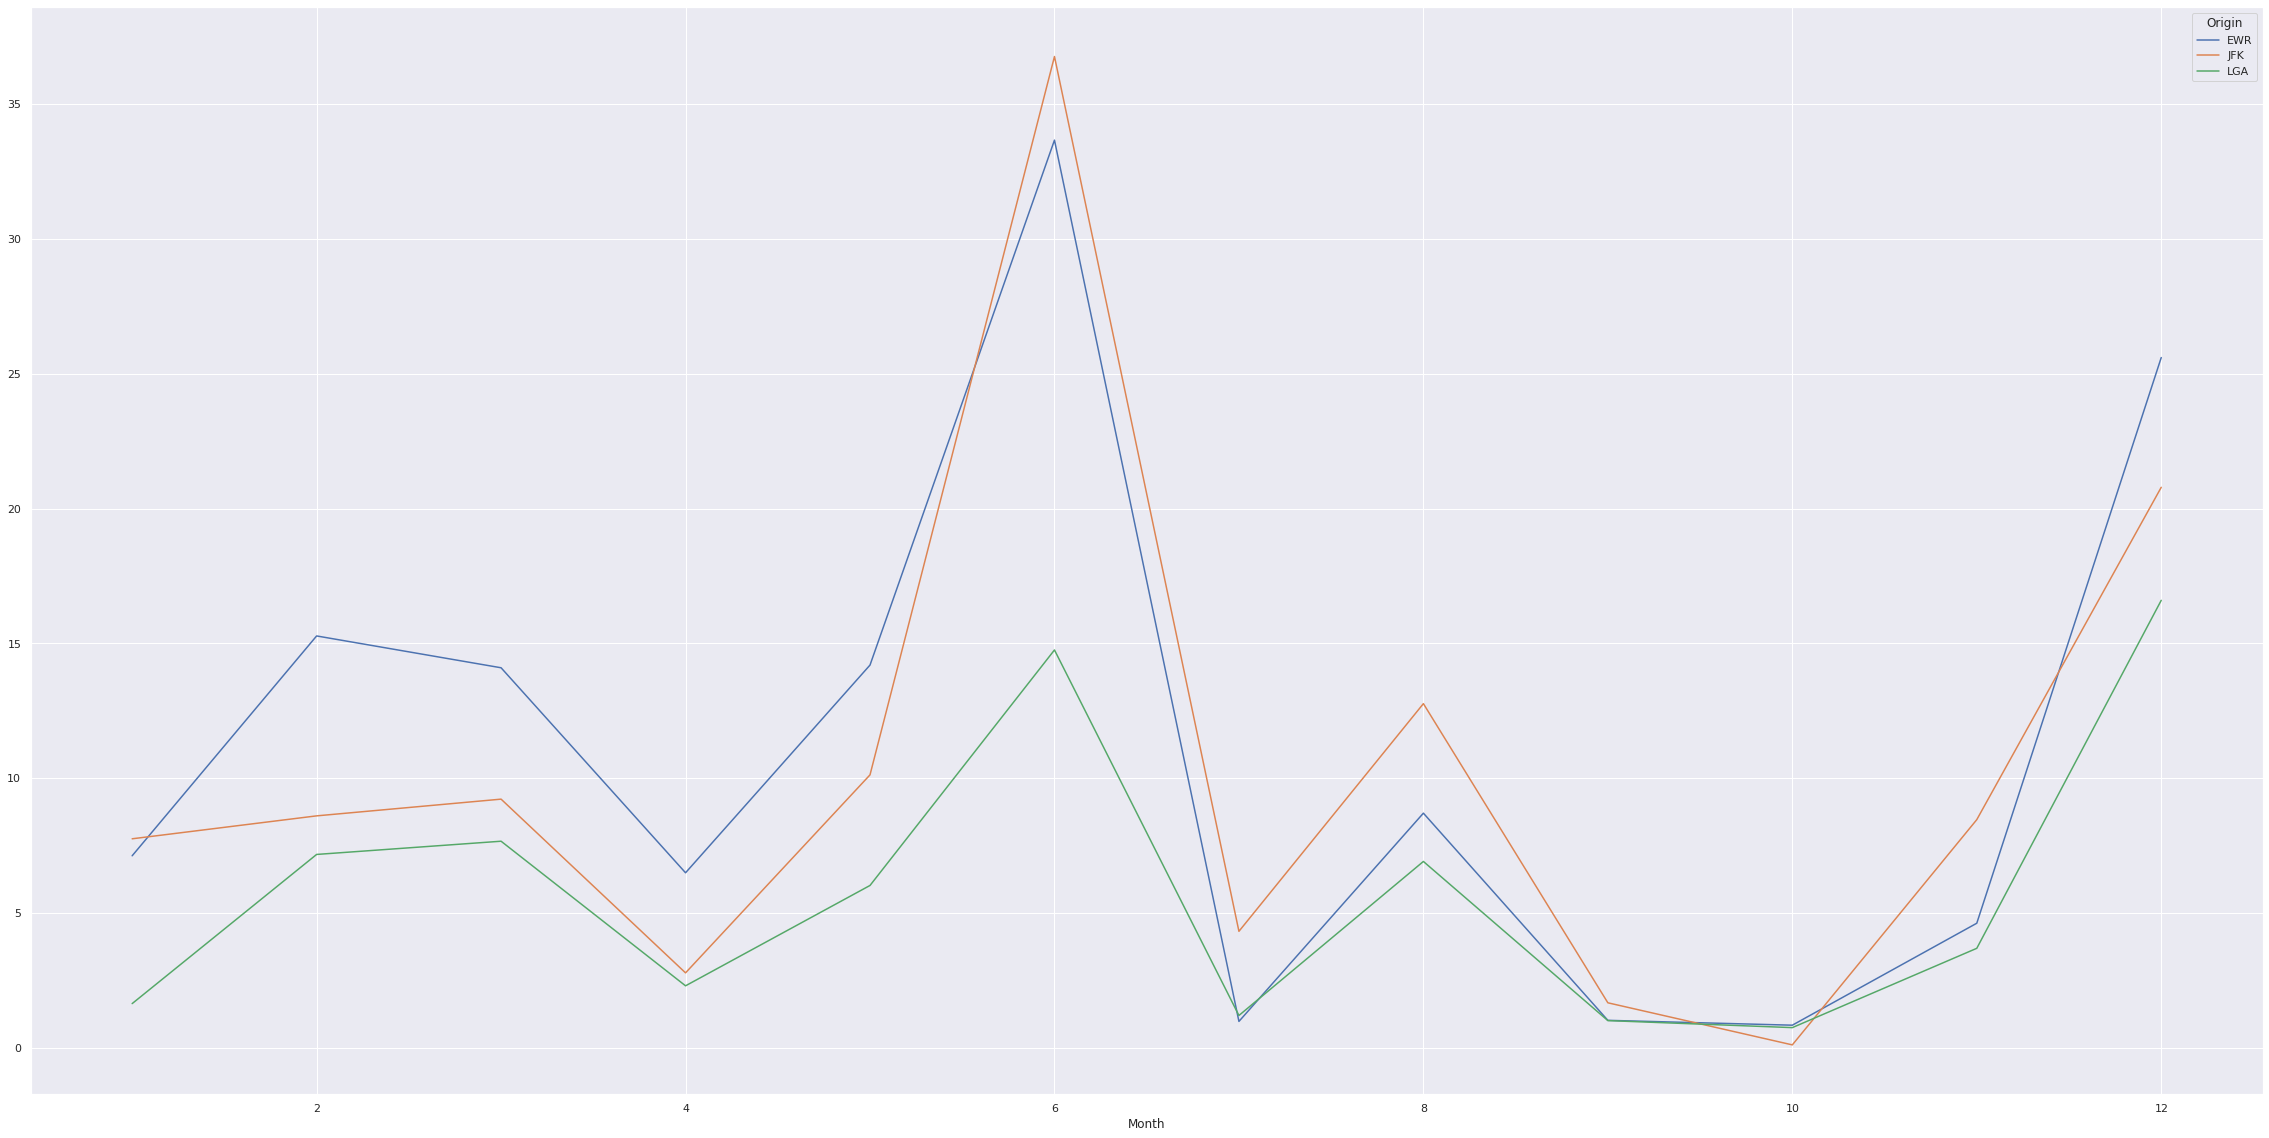

In [100]:
Monthly_Precipitation['Precipitation'].plot(figsize=(40, 20))

Seeing the mean monthly Precipitation there might be a correlation with the mean Departure Delays and we could use this in our model. It has a similar peak in June-July as well as in December like the mean montly Departure Delay along with the dip in the months of February - April too.

In [101]:
Daily_Precipitation = Precipitation.groupby(by=['Month','Day','Origin']).median().unstack()
Daily_Precipitation

Precipitation          
Origin              EWR  JFK  LGA
Month Day                        
1     1             0.0  0.0  0.0
      2             0.0  0.0  0.0
      3             0.0  0.0  0.0
      4             0.0  0.0  0.0
      5             0.0  0.0  0.0
...                 ...  ...  ...
12    26            0.0  0.0  0.0
      27            0.0  0.0  0.0
      28            0.0  0.0  0.0
      29            0.0  0.0  0.0
      30            0.0  0.0  0.0

[364 rows x 3 columns]

<AxesSubplot:xlabel='Month,Day'>

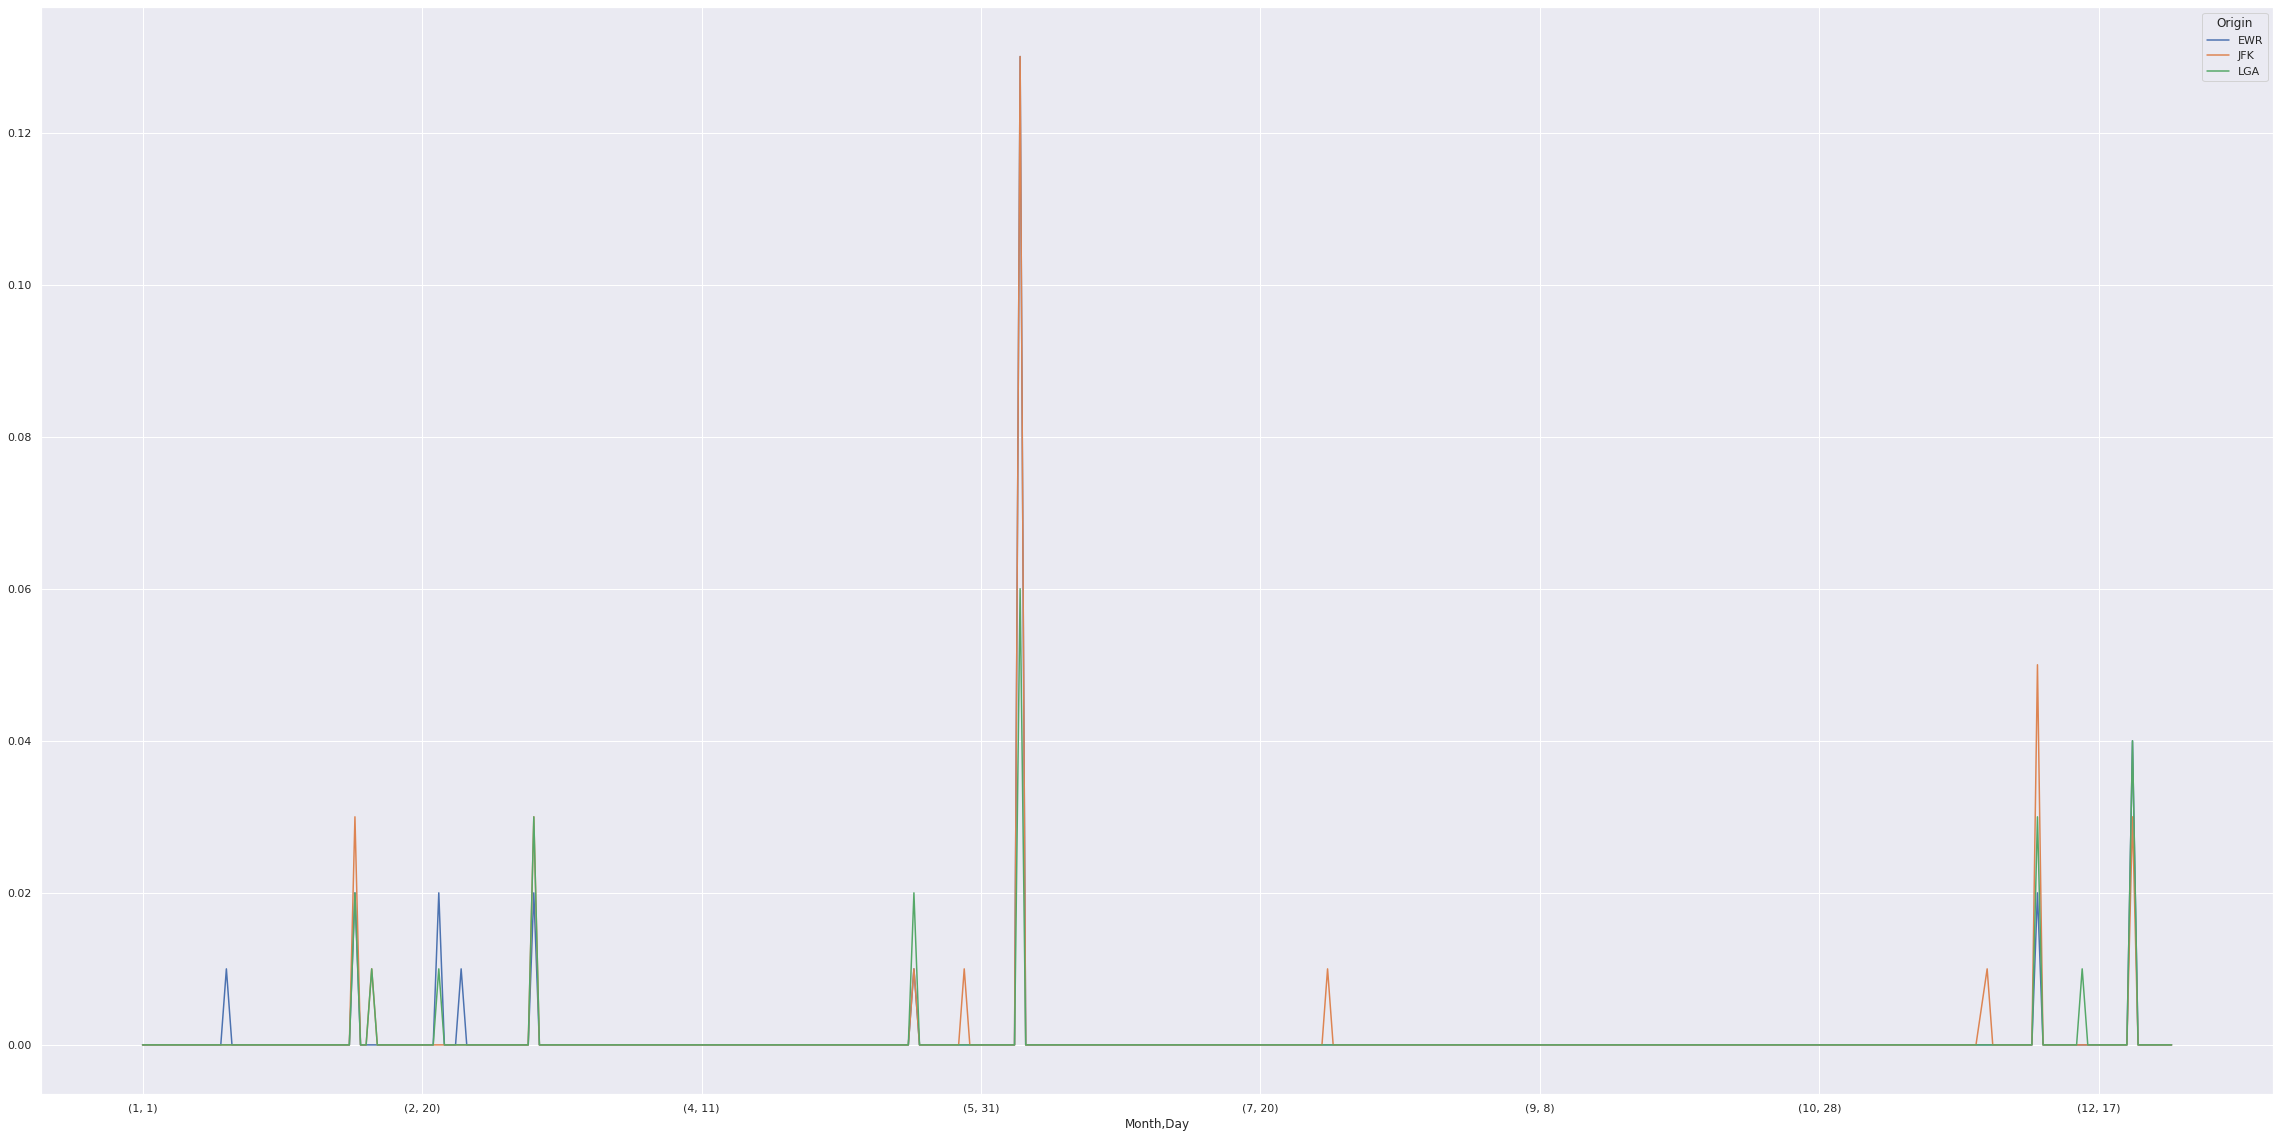

In [102]:
Daily_Precipitation['Precipitation'].plot(figsize=(40, 20))

In [103]:
Precipitation = DF['Precipitation']
Dep_Del = DF['Departure_Delay']
Precip_Delay = pd.concat([Precipitation, Dep_Del], axis = 1).reindex(Precipitation.index)
Precip_Delay = Precip_Delay[Precip_Delay['Precipitation'] != 0.0]
Precip_Delay

Precipitation  Departure_Delay
7351             0.01             -8.0
7353             0.01             -4.0
7354             0.01             -4.0
7355             0.01             -9.0
7372             0.01              7.0
...               ...              ...
237073           0.28             -9.0
237074           0.28             -9.0
237075           0.28             23.0
237076           0.28             17.0
237077           0.28             92.0

[7349 rows x 2 columns]

We removed the 0.0 Precipitation datapoints to better visualise the spread of the Departure Delays with respect to Precipitation

<AxesSubplot:xlabel='Precipitation', ylabel='Departure_Delay'>

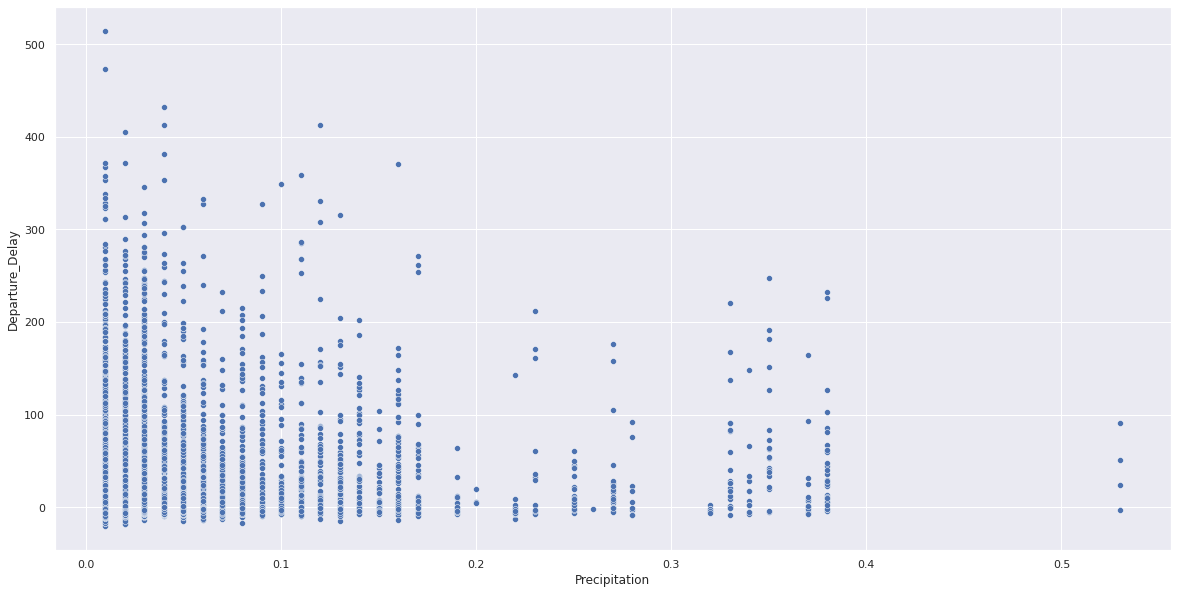

In [104]:
f = plt.figure(figsize = (20,10))
sb.scatterplot(data = Precip_Delay,x="Precipitation", y="Departure_Delay")

### Visibility

In [105]:
Visibility = Weather[['Origin','Visibility','Month','Day']]

In [106]:
Visibility = Visibility.groupby(by=['Month','Day','Origin']).median().unstack()
Visibility

Visibility            
Origin           EWR   JFK   LGA
Month Day                       
1     1         10.0  10.0  10.0
      2         10.0  10.0  10.0
      3         10.0  10.0  10.0
      4         10.0  10.0  10.0
      5         10.0  10.0  10.0
...              ...   ...   ...
12    26        10.0  10.0  10.0
      27        10.0  10.0  10.0
      28        10.0  10.0  10.0
      29        10.0  10.0   6.0
      30        10.0  10.0  10.0

[364 rows x 3 columns]

<AxesSubplot:xlabel='Month,Day'>

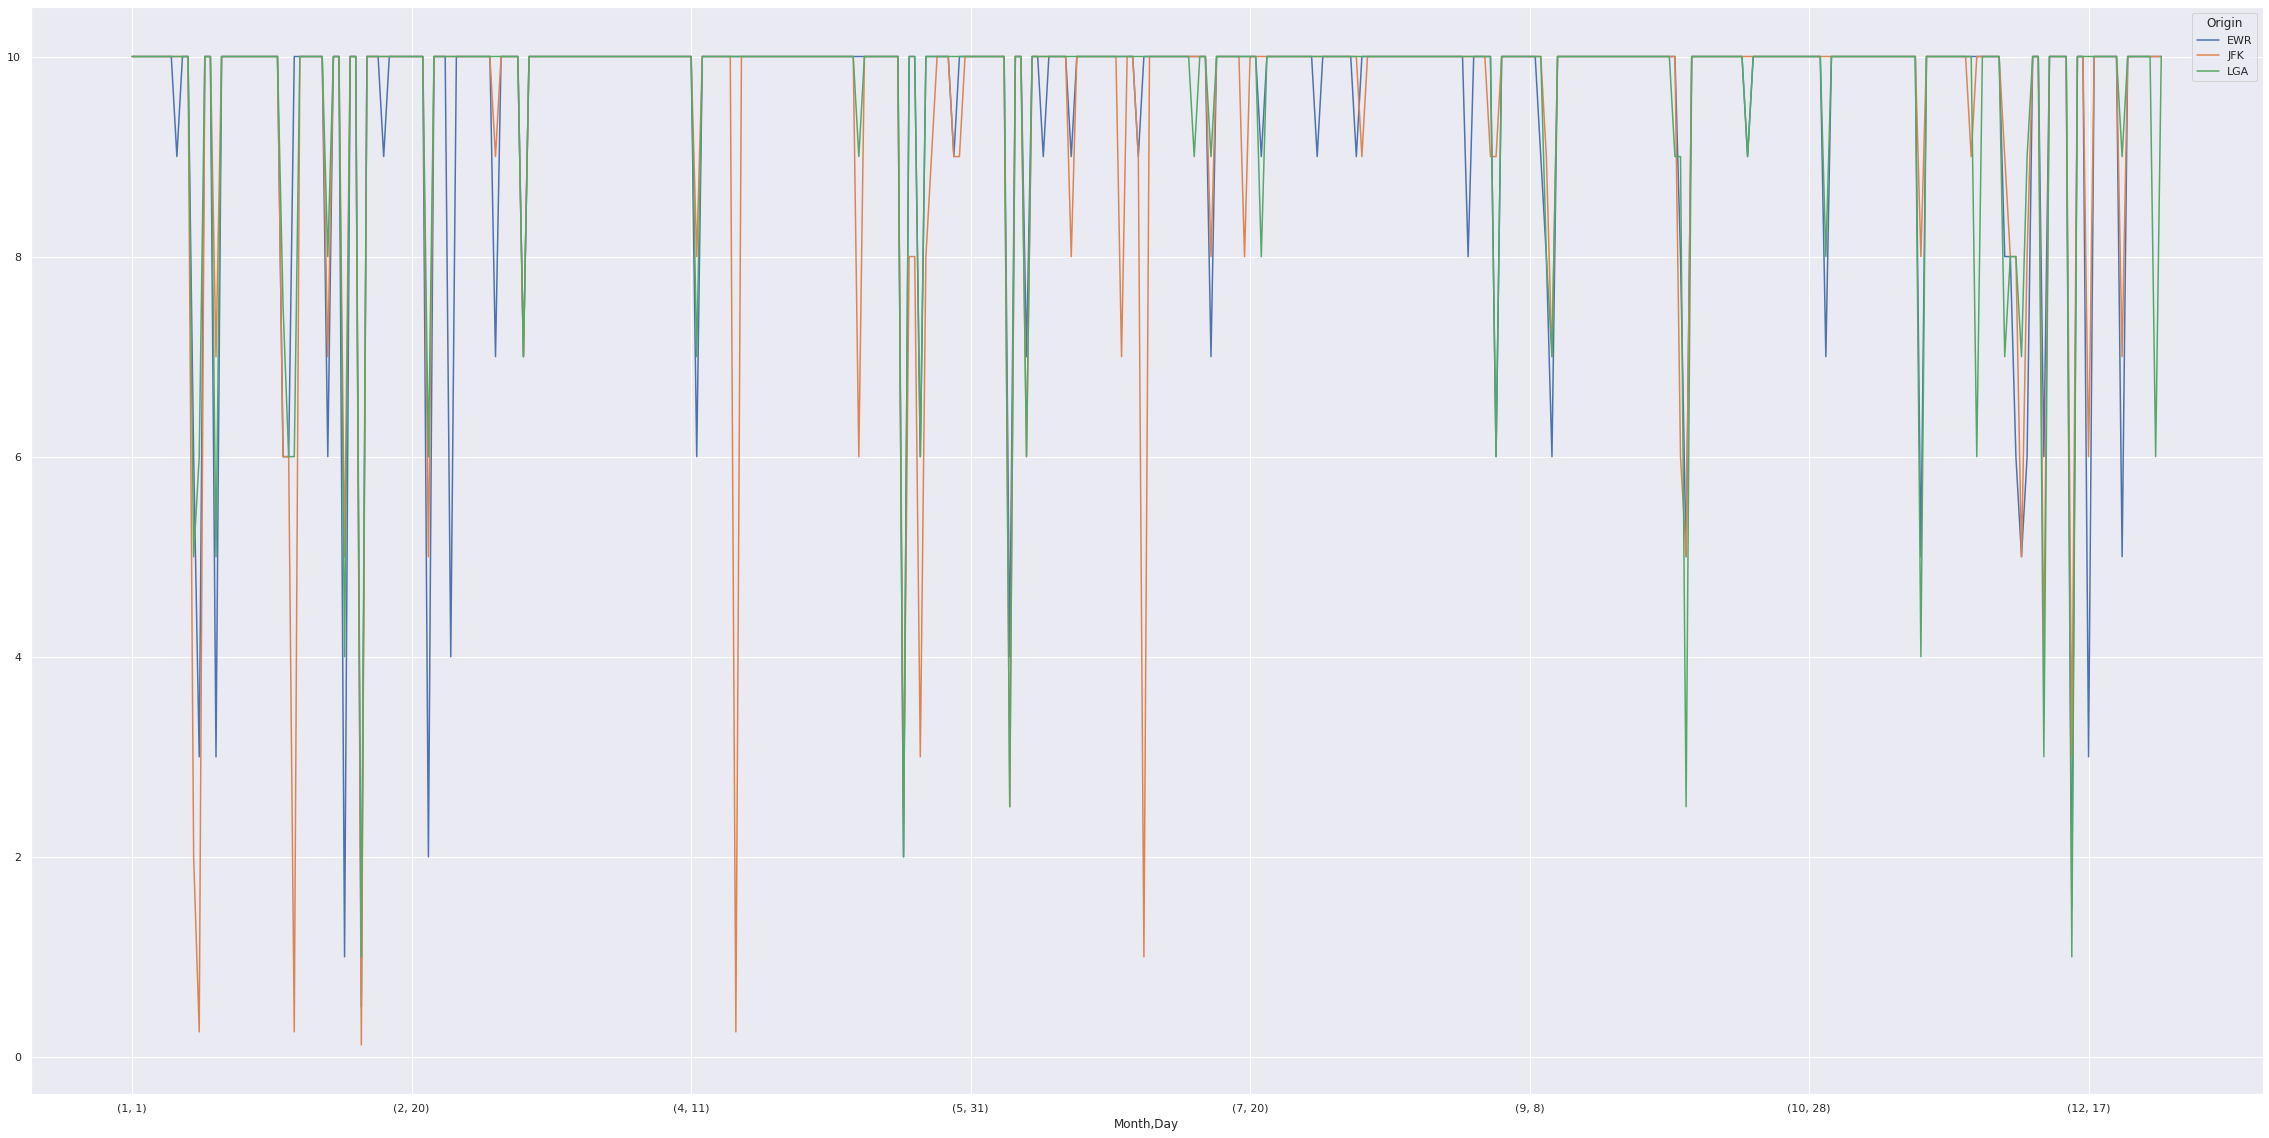

In [107]:
Visibility['Visibility'].plot(figsize=(40, 20))

In [108]:
Visibility = DF['Visibility']
Dep_Del = DF['Departure_Delay']
Visib_Delay= pd.concat([Visibility, Dep_Del], axis = 1).reindex(Visibility.index)
Visib_Delay = Visib_Delay[Visib_Delay['Visibility'] != 10.0]
Visib_Delay

Visibility  Departure_Delay
237            9.0              4.0
238            9.0             -5.0
239            9.0             -5.0
240            9.0              2.0
241            9.0              5.0
...            ...              ...
237122         9.0             73.0
237123         9.0             -3.0
237124         9.0             87.0
237125         9.0             53.0
237126         9.0             71.0

[26837 rows x 2 columns]

We removed the 10.0 Visibility datapoints to better visualise the spread of the Departure Delays with respect to Visibility

<AxesSubplot:xlabel='Visibility', ylabel='Departure_Delay'>

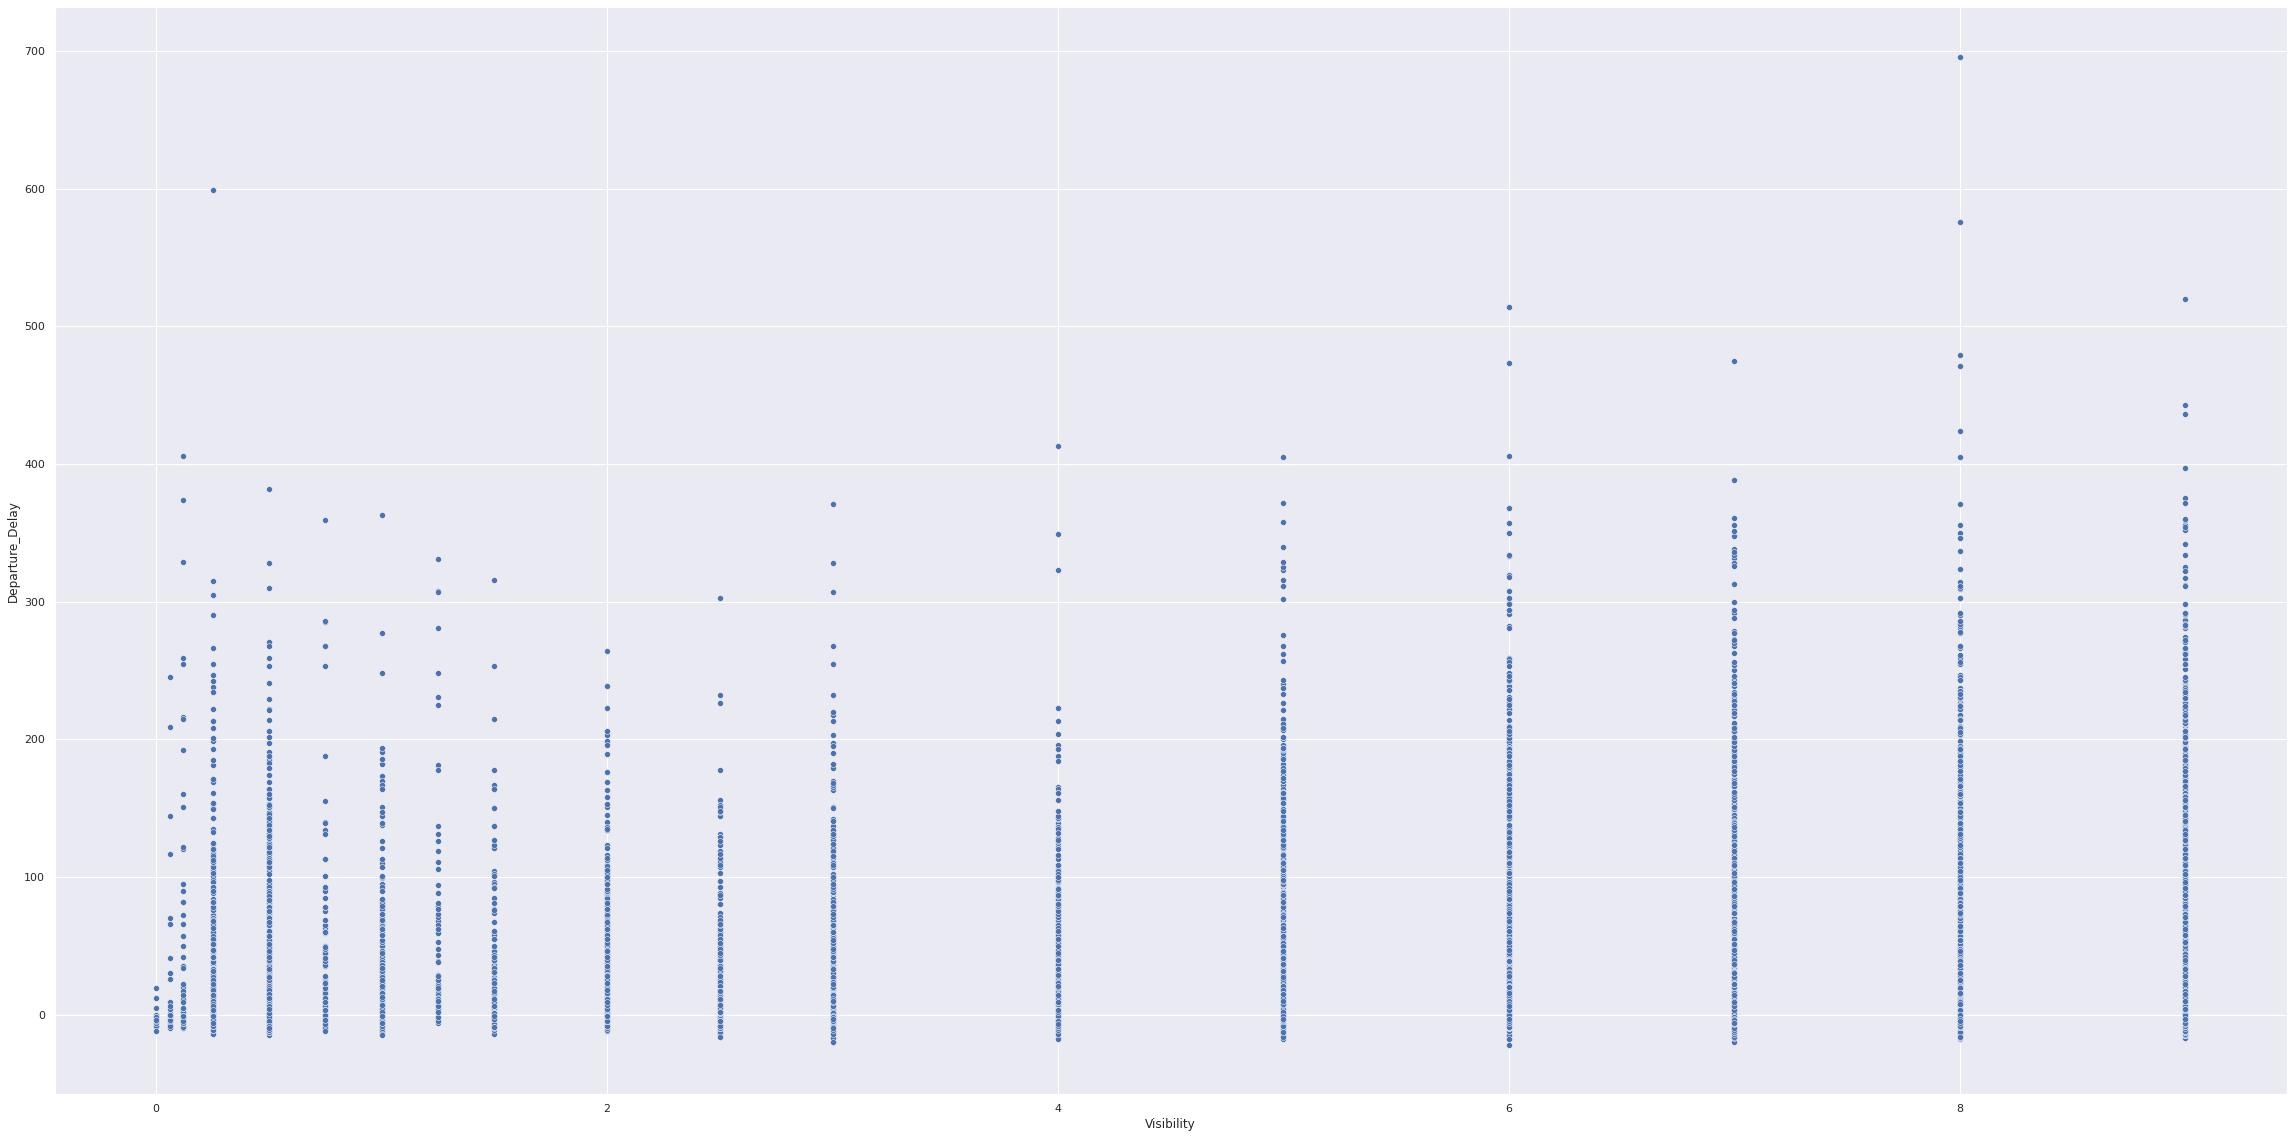

In [109]:
f = plt.figure(figsize = (40,20))
sb.scatterplot(data = Visib_Delay,x="Visibility", y="Departure_Delay")

In [111]:
DF.to_csv('cleaned_dataset_post_EDA.csv')